In [1]:
# Import pandas for manipulating numerical tables
import pandas as pd

from pandas import Series, DataFrame

# Import numpy for numerical calculations
import numpy as np

# Import matplotlib for plotting data
import matplotlib.pyplot as plt
#%matplotlib inline

# Import scipy-stats for statistical aFnalysis and outlier detection
from scipy import stats as st

# Import for plotting
import plotnine as p9

# Import missingno for visualizations
import missingno as msno

import seaborn as sns

from sklearn.linear_model import LogisticRegression

#from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn import linear_model

from sklearn.metrics import classification_report

from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm

from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the churn dataset
df = pd.read_csv('C:/users/eric7/D208/D208_churn.csv')

In [3]:
# Just checking to see if the data is there
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
# Check shape of df
print(df.shape)
# 10000 rows or instances and 52 columns or variables

(10000, 50)


In [5]:
# Check df info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

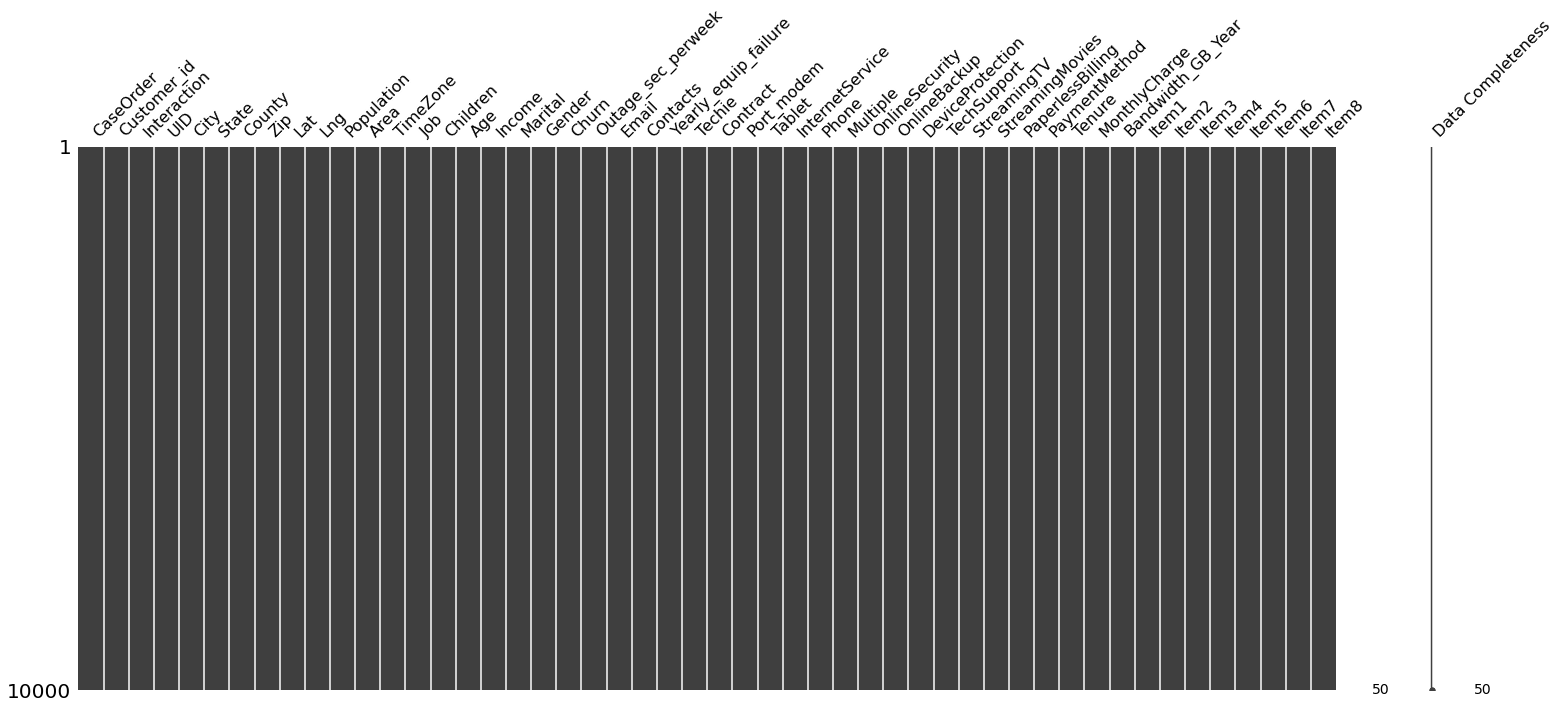

In [6]:
# Visualize df for missingness
msno.matrix(df, labels = True)
plt.show()

In [7]:
# Check for duplicates
df.duplicated().sum()

0

In [8]:
# Create df1 for initial model--
# Dropping columns CaseOrder, Customer_id, Interaction_UID, City,
# State, County, Zip, Lat, Lng, TimeZone, and Job
df1 = df[['Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 
           'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 
           'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
           'Tablet', 'InternetService', 'Phone', 'Multiple', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies', 
           'PaperlessBilling', 'PaymentMethod', 'Tenure', 
           'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 
           'Item3', 'Item4', 'Item5', 'Item6', 
           'Item7', 'Item8']]

In [9]:
# Check the info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  int64  
 1   Area                  10000 non-null  object 
 2   Children              10000 non-null  int64  
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Marital               10000 non-null  object 
 6   Gender                10000 non-null  object 
 7   Churn                 10000 non-null  object 
 8   Outage_sec_perweek    10000 non-null  float64
 9   Email                 10000 non-null  int64  
 10  Contacts              10000 non-null  int64  
 11  Yearly_equip_failure  10000 non-null  int64  
 12  Techie                10000 non-null  object 
 13  Contract              10000 non-null  object 
 14  Port_modem            10000 non-null  object 
 15  Tablet              

In [10]:
# Checking shape for initial model--38 independent and 1 dependent
df1.shape

(10000, 38)

### Check unique values for all variables being used
### And get the statistics for each

In [11]:
# Checking variables unique values for validity
print(df1['Population'].sort_values().unique())

[     0      2      4 ... 102433 103732 111850]


In [12]:
# Check before replacement
df1['Population'].describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

In [13]:
# Checking variables unique values for validity
print(df1['Area'].sort_values().unique())

['Rural' 'Suburban' 'Urban']


In [14]:
# Check describe()
df1['Area'].describe()

count        10000
unique           3
top       Suburban
freq          3346
Name: Area, dtype: object

In [15]:
# Get the counts for each
df1['Area'].value_counts()

Suburban    3346
Urban       3327
Rural       3327
Name: Area, dtype: int64

In [16]:
# Checking variables unique values for validity
print(df1['Children'].sort_values().unique())

[ 0  1  2  3  4  5  6  7  8  9 10]


In [17]:
# Get statistics of the variable
df1['Children'].describe()

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

In [18]:
# Checking variables unique values for validity
print(df1['Age'].sort_values().unique())

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]


In [19]:
# Get statistics of the variable
df1['Age'].describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [20]:
# Checking variables unique values for validity
print(df1['Income'].sort_values().unique())

[   348.67    368.5     630.24 ... 231252.   256998.4  258900.7 ]


In [21]:
# Get statistics of the variable
df1['Income'].describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [22]:
# Checking variables unique values for validity
print(df1['Marital'].sort_values().unique())

['Divorced' 'Married' 'Never Married' 'Separated' 'Widowed']


In [23]:
# Get statistics of the variable
df1['Marital'].describe()

count        10000
unique           5
top       Divorced
freq          2092
Name: Marital, dtype: object

In [24]:
# Get the counts for each
df1['Marital'].value_counts()

Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64

In [25]:
# Checking variables unique values for validity
print(df1['Gender'].sort_values().unique())

['Female' 'Male' 'Nonbinary']


In [26]:
# Get statistics of the variable
df1['Gender'].describe()

count      10000
unique         3
top       Female
freq        5025
Name: Gender, dtype: object

In [27]:
# Get the counts for each
df1['Gender'].value_counts()

Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64

In [28]:
# Checking variables unique values for validity
print(df1['Churn'].sort_values().unique())

['No' 'Yes']


In [29]:
# Get statistics of the variable
df1['Churn'].describe()

count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object

In [30]:
# Get the counts for each
df1['Churn'].value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

In [31]:
# Checking variables unique values for validity
print(df1['Outage_sec_perweek'].sort_values().unique())

[ 0.09974694  0.12005772  0.2322795  ... 20.30462    20.62504
 21.20723   ]


In [32]:
# Get statistics of the variable
df1['Outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [33]:
# Checking variables unique values for validity
print(df1['Email'].sort_values().unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [34]:
# Get statistics of the variable
df1['Email'].describe()

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Email, dtype: float64

In [35]:
# Checking variables unique values for validity
print(df1['Contacts'].sort_values().unique())

[0 1 2 3 4 5 6 7]


In [36]:
# Get statistics of the variable
df1['Contacts'].describe()

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64

In [37]:
# Checking variables unique values for validity
print(df1['Yearly_equip_failure'].sort_values().unique())

[0 1 2 3 4 6]


In [38]:
# Get statistics of the variable
df1['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

In [39]:
# Checking variables unique values for validity
print(df1['Techie'].sort_values().unique())

['No' 'Yes']


In [40]:
# Get statistics of the variable
df1['Techie'].describe()

count     10000
unique        2
top          No
freq       8321
Name: Techie, dtype: object

In [41]:
# Get the counts for each
df1['Techie'].value_counts()

No     8321
Yes    1679
Name: Techie, dtype: int64

In [42]:
# Checking variables unique values for validity
print(df1['Contract'].sort_values().unique())

['Month-to-month' 'One year' 'Two Year']


In [43]:
# Get statistics of the variable
df1['Contract'].describe()

count              10000
unique                 3
top       Month-to-month
freq                5456
Name: Contract, dtype: object

In [44]:
# Get the counts for each
df1['Contract'].value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

In [45]:
# Checking variables unique values for validity
print(df1['Port_modem'].sort_values().unique())

['No' 'Yes']


In [46]:
# Get statistics of the variable
df1['Port_modem'].describe()

count     10000
unique        2
top          No
freq       5166
Name: Port_modem, dtype: object

In [47]:
# Get the counts for each
df1['Port_modem'].value_counts()

No     5166
Yes    4834
Name: Port_modem, dtype: int64

In [48]:
# Checking variables unique values for validity
print(df1['Tablet'].sort_values().unique())

['No' 'Yes']


In [49]:
# Get statistics of the variable
df1['Tablet'].describe()

count     10000
unique        2
top          No
freq       7009
Name: Tablet, dtype: object

In [50]:
# Get the counts for each
df1['Tablet'].value_counts()

No     7009
Yes    2991
Name: Tablet, dtype: int64

In [51]:
# Checking variables unique values for validity
print(df1['InternetService'].sort_values().unique())

['DSL' 'Fiber Optic' 'None']


In [52]:
# Get statistics of the variable
df1['InternetService'].describe()

count           10000
unique              3
top       Fiber Optic
freq             4408
Name: InternetService, dtype: object

In [53]:
# Get the counts for each
df1['InternetService'].value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

In [54]:
# Checking variables unique values for validity
print(df1['Phone'].sort_values().unique())

['No' 'Yes']


In [55]:
# Get statistics of the variable
df1['Phone'].describe()

count     10000
unique        2
top         Yes
freq       9067
Name: Phone, dtype: object

In [56]:
# Get the counts for each
df1['Phone'].value_counts()

Yes    9067
No      933
Name: Phone, dtype: int64

In [57]:
# Checking variables unique values for validity
print(df1['Multiple'].sort_values().unique())

['No' 'Yes']


In [58]:
# Get statistics of the variable
df1['Multiple'].describe()

count     10000
unique        2
top          No
freq       5392
Name: Multiple, dtype: object

In [59]:
# Get the counts for each
df1['Multiple'].value_counts()

No     5392
Yes    4608
Name: Multiple, dtype: int64

In [60]:
# Checking variables unique values for validity
print(df1['OnlineSecurity'].sort_values().unique())

['No' 'Yes']


In [61]:
# Get statistics of the variable
df1['OnlineSecurity'].describe()

count     10000
unique        2
top          No
freq       6424
Name: OnlineSecurity, dtype: object

In [62]:
# Get the counts for each
df1['OnlineSecurity'].value_counts()

No     6424
Yes    3576
Name: OnlineSecurity, dtype: int64

In [63]:
# Checking variables unique values for validity
print(df1['DeviceProtection'].sort_values().unique())

['No' 'Yes']


In [64]:
# Get statistics of the variable
df1['DeviceProtection'].describe()

count     10000
unique        2
top          No
freq       5614
Name: DeviceProtection, dtype: object

In [65]:
# Get the counts for each
df1['DeviceProtection'].value_counts()

No     5614
Yes    4386
Name: DeviceProtection, dtype: int64

In [66]:
# Checking variables unique values for validity
print(df1['TechSupport'].sort_values().unique())

['No' 'Yes']


In [67]:
# Get statistics of the variable
df1['TechSupport'].describe()

count     10000
unique        2
top          No
freq       6250
Name: TechSupport, dtype: object

In [68]:
# Get the counts for each
df1['TechSupport'].value_counts()

No     6250
Yes    3750
Name: TechSupport, dtype: int64

In [69]:
# Checking variables unique values for validity
print(df1['StreamingTV'].sort_values().unique())

['No' 'Yes']


In [70]:
# Get statistics of the variable
df1['StreamingTV'].describe()

count     10000
unique        2
top          No
freq       5071
Name: StreamingTV, dtype: object

In [71]:
# Get the counts for each
df1['StreamingTV'].value_counts()

No     5071
Yes    4929
Name: StreamingTV, dtype: int64

In [72]:
# Checking variables unique values for validity
print(df1['StreamingMovies'].sort_values().unique())

['No' 'Yes']


In [73]:
# Get statistics of the variable
df1['StreamingMovies'].describe()

count     10000
unique        2
top          No
freq       5110
Name: StreamingMovies, dtype: object

In [74]:
# Get the counts for each
df1['StreamingMovies'].value_counts()

No     5110
Yes    4890
Name: StreamingMovies, dtype: int64

In [75]:
# Checking variables unique values for validity
print(df1['PaperlessBilling'].sort_values().unique())

['No' 'Yes']


In [76]:
# Get statistics of the variable
df1['PaperlessBilling'].describe()

count     10000
unique        2
top         Yes
freq       5882
Name: PaperlessBilling, dtype: object

In [77]:
# Get the counts for each
df1['PaperlessBilling'].value_counts()

Yes    5882
No     4118
Name: PaperlessBilling, dtype: int64

In [78]:
# Checking variables unique values for validity
print(df1['PaymentMethod'].sort_values().unique())

['Bank Transfer(automatic)' 'Credit Card (automatic)' 'Electronic Check'
 'Mailed Check']


In [79]:
# Get statistics of the variable
df1['PaymentMethod'].describe()

count                10000
unique                   4
top       Electronic Check
freq                  3398
Name: PaymentMethod, dtype: object

In [80]:
# Get the counts for each
df1['PaymentMethod'].value_counts()

Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: PaymentMethod, dtype: int64

In [81]:
# Checking variables unique values for validity
print(df1['Tenure'].sort_values().unique())

[ 1.00025934  1.005104    1.0185196  ... 71.99373    71.99418
 71.99928   ]


In [82]:
# Get statistics of the variable
df1['Tenure'].describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [83]:
# Checking variables unique values for validity
print(df1['MonthlyCharge'].sort_values().unique())

[ 79.97886   79.978861  82.496547  82.49655   92.45514   92.455141
  92.48802   92.488023  92.5018    94.972827  94.97283   95.005709
  95.00571   95.019486  95.01949  102.4746   102.474625 104.962874
 104.9629   104.9643   104.964303 104.97808  104.9781   104.9923
 104.992311 105.010962 105.011    107.48056  107.4806   107.481989
 107.482    107.495766 107.4958   107.5286   107.528648 112.4551
 112.455141 112.484375 112.4844   114.9509   114.950905 114.965789
 114.9658   114.9728   114.972827 114.983787 114.9838   114.997564
 114.9976   115.002061 115.0021   117.439154 117.4392   117.468591
 117.4686   117.472    117.472036 117.483475 117.4835   117.4858
 117.485813 117.4872   117.487242 117.5015   117.5152   117.51525
 119.9568   119.95684  119.9897   119.989722 120.003499 120.0035
 120.0049   120.004928 124.960655 124.9607   124.9643   124.964303
 124.97808  124.9781   124.9935   124.993537 125.0073   125.007314
 127.442069 127.4421   127.4586   127.458638 127.460067 127.4601
 127.4

In [84]:
# Get statistics of the variable
df1['MonthlyCharge'].describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [85]:
# Checking variables unique values for validity
print(df1['Bandwidth_GB_Year'].sort_values().unique())

[ 155.5067148  169.3992798  223.4765826 ... 7096.494932  7138.308718
 7158.98153  ]


In [86]:
# Get statistics of the variable
df1['Bandwidth_GB_Year'].describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [87]:
# Checking variables unique values for validity
print(df1['Item1'].sort_values().unique())

[1 2 3 4 5 6 7]


In [88]:
# Get statistics of the variable
df1['Item1'].describe()

count    10000.000000
mean         3.490800
std          1.037797
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item1, dtype: float64

In [89]:
# Checking variables unique values for validity
print(df1['Item2'].sort_values().unique())

[1 2 3 4 5 6 7]


In [90]:
# Get statistics of the variable
df1['Item2'].describe()

count    10000.000000
mean         3.505100
std          1.034641
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: Item2, dtype: float64

In [91]:
# Checking variables unique values for validity
print(df1['Item3'].sort_values().unique())

[1 2 3 4 5 6 7 8]


In [92]:
# Get statistics of the variable
df1['Item3'].describe()

count    10000.000000
mean         3.487000
std          1.027977
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: Item3, dtype: float64

In [93]:
# Checking variables unique values for validity
print(df1['Item4'].sort_values().unique())

[1 2 3 4 5 6 7]


In [94]:
# Get statistics of the variable
df1['Item4'].describe()

count    10000.000000
mean         3.497500
std          1.025816
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item4, dtype: float64

In [95]:
# Checking variables unique values for validity
print(df1['Item5'].sort_values().unique())

[1 2 3 4 5 6 7]


In [96]:
# Get statistics of the variable
df1['Item5'].describe()

count    10000.000000
mean         3.492900
std          1.024819
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item5, dtype: float64

In [97]:
# Checking variables unique values for validity
print(df1['Item6'].sort_values().unique())

[1 2 3 4 5 6 7 8]


In [98]:
# Get statistics of the variable
df1['Item6'].describe()

count    10000.000000
mean         3.497300
std          1.033586
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: Item6, dtype: float64

In [99]:
# Checking variables unique values for validity
print(df1['Item7'].sort_values().unique())

[1 2 3 4 5 6 7]


In [100]:
# Get statistics of the variable
df1['Item7'].describe()

count    10000.000000
mean         3.509500
std          1.028502
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: Item7, dtype: float64

In [101]:
# Checking variables unique values for validity
print(df1['Item8'].sort_values().unique())

[1 2 3 4 5 6 7 8]


In [102]:
# Get statistics of the variable
df1['Item8'].describe()

count    10000.000000
mean         3.495600
std          1.028633
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: Item8, dtype: float64

### Check for outliers on continuous variables using Z-scores

In [103]:
# Checking for ouliers using Z-scores--stats
df1['Z_population'] = st.zscore(df1['Population'])
df1[['Population', 'Z_population']].head()

,Population,Z_population
0,38,-0.673405
1,10446,0.047772
2,3735,-0.417238
3,13863,0.284537
4,11352,0.110549


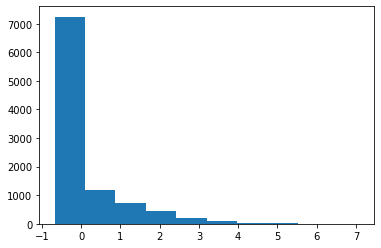

In [104]:
# Check it on the histogram...We can see we have outliers
plt.hist(df1['Z_population'])
plt.show()

In [105]:
# Check before replacement
df1['Population'].describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

In [106]:
# Check how many instances are greater than 3 == 219 instances
df1[df1['Z_population']>3]

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,...,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Z_population
57,58431,Rural,1,33,15690.25,Widowed,Female,No,11.448751,11,...,958.139706,4,5,5,5,4,4,4,5,3.372680
90,55519,Rural,0,75,58482.90,Separated,Female,Yes,8.294186,13,...,409.748666,3,3,3,3,3,4,3,3,3.170906
100,55122,Urban,0,69,58077.38,Separated,Male,Yes,10.683118,12,...,1806.135733,3,2,3,5,3,4,4,3,3.143397
157,86926,Rural,1,39,20624.31,Divorced,Male,No,6.985590,9,...,967.981914,4,5,4,4,3,3,3,5,5.347115
203,90517,Suburban,3,83,44223.58,Widowed,Female,No,7.352534,15,...,1430.761492,2,3,1,3,3,1,4,3,5.595937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,54540,Urban,0,39,29732.28,Separated,Female,Yes,5.790541,11,...,6023.656633,3,3,3,4,4,4,3,3,3.103070
9728,54507,Urban,1,61,24614.25,Divorced,Female,No,5.982889,17,...,6016.376448,5,4,5,2,5,3,4,4,3.100784
9905,54413,Suburban,1,30,21246.03,Divorced,Male,No,4.759083,15,...,6599.191565,4,3,3,3,5,3,3,3,3.094270
9987,87509,Urban,3,61,102629.60,Married,Female,No,8.373844,8,...,5135.575997,4,4,3,5,3,3,3,3,5.387511


In [107]:
#Make a new df for median imputation
df_pop = df1[['Population', 'Z_population']]

In [108]:
# Check the shape
df_pop.shape

(10000, 2)

In [109]:
# Make the outliers equal to Nan
df_pop[(df_pop.Z_population > 3)] = np.nan

In [110]:
# Replace with median values--219
df_pop['Population'].fillna(df_pop['Population'].median(), inplace=True)

In [111]:
# Check the original
df['Population'].describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

In [112]:
# Replace with no outliers
df1['Population'] = df_pop['Population']

In [113]:
# Check stats after median imputation
df1['Population'].describe()

count    10000.000000
mean      8378.492800
std      11657.129901
min          0.000000
25%        738.000000
50%       2737.000000
75%      11365.750000
max      52967.000000
Name: Population, dtype: float64

In [114]:
# Checking for ouliers using Z-scores--stats
df1['Z_children'] = st.zscore(df1['Children'])
df1[['Children', 'Z_children']].head()

,Children,Z_children
0,0,-0.972338
1,1,-0.506592
2,4,0.890646
3,1,-0.506592
4,0,-0.972338


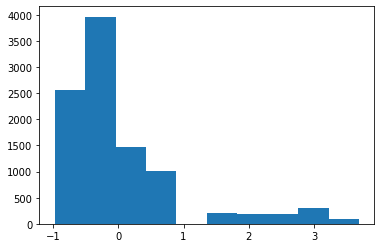

In [115]:
# Check it on the histogram...We can see we have outliers
plt.hist(df1['Z_children'])
plt.show()

In [116]:
# Check how many instances are greater than 3
df1[df1['Z_children']>3]

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,...,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Z_population,Z_children
30,11268.0,Urban,9,45,43383.54,Married,Male,No,6.613071,14,...,3,2,1,5,3,3,3,2,0.104728,3.219376
97,521.0,Suburban,10,23,64816.84,Divorced,Male,Yes,5.271229,14,...,3,2,2,4,3,2,3,2,-0.639937,3.685122
144,15171.0,Suburban,10,76,35954.77,Married,Male,Yes,13.715554,14,...,4,4,3,3,2,3,4,2,0.375169,3.685122
329,26381.0,Urban,9,19,40902.49,Married,Female,Yes,8.816498,8,...,4,3,4,2,5,3,4,3,1.151917,3.219376
334,5978.0,Suburban,9,79,11179.42,Never Married,Female,No,10.494952,11,...,3,2,2,3,4,4,4,5,-0.261819,3.219376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9623,2737.0,Urban,10,79,42222.25,Married,Female,No,9.315470,14,...,4,5,5,3,5,3,4,2,3.014794,3.685122
9676,3738.0,Rural,9,30,29388.05,Married,Male,No,9.784614,8,...,3,2,4,4,2,3,3,2,-0.417030,3.219376
9790,1995.0,Rural,10,31,23693.22,Married,Male,No,12.947090,13,...,3,4,4,3,4,4,4,2,-0.537803,3.685122
9871,1691.0,Urban,10,18,19351.19,Widowed,Female,No,7.845888,13,...,3,3,3,3,4,3,4,4,-0.558867,3.685122


In [117]:
#Make a new df for median imputation
df_child = df1[['Children', 'Z_children']]

In [118]:
# Make the outliers equal to Nan
df_child[(df_child.Z_children > 3)] = np.nan

In [119]:
# Check before replacement
df_child['Children'].describe()

count    9809.000000
mean        1.943012
std         1.897161
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         8.000000
Name: Children, dtype: float64

In [120]:
# Replace with median values--219
df_child['Children'].fillna(df_child['Children'].median(), inplace=True)

In [121]:
# Replace with no outliers
df1['Children'] = df_child['Children']

In [122]:
# Check stats after median imputation
df1['Children'].describe()

count    10000.000000
mean         1.925000
std          1.883383
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          8.000000
Name: Children, dtype: float64

In [123]:
# Checking for ouliers using Z-scores--stats
df1['Z_age'] = st.zscore(df1['Age'])
df1[['Age', 'Z_age']].head()

,Age,Z_age
0,68,0.720925
1,27,-1.259957
2,50,-0.148730
3,48,-0.245359
4,83,1.445638


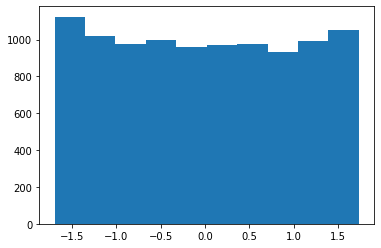

In [124]:
# Check it on the histogram--no outliers
plt.hist(df1['Z_age'])
plt.show()

In [125]:
# Checking for ouliers using Z-scores--stats
df1['Z_income'] = st.zscore(df1['Income'])
df1[['Income', 'Z_income']].head()

,Income,Z_income
0,28561.99,-0.398778
1,21704.77,-0.641954
2,9609.57,-1.070885
3,18925.23,-0.740525
4,40074.19,0.009478


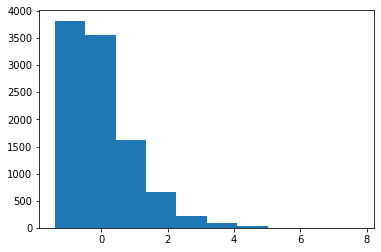

In [126]:
# Check it on the histogram
plt.hist(df1['Z_income'])
plt.show()

In [127]:
# Make a new df for median imputation
df_income = df1[['Income', 'Z_income']]

In [128]:
# Make the outliers equal to Nan
df_income[(df_income.Z_income > 3)] = np.nan

In [129]:
# Replace with mean values--145
df_income['Income'].fillna(df_income['Income'].mean(), inplace=True)

In [130]:
# Replace with no outliers
df1['Income'] = df_income['Income']

In [131]:
# Check after replacement
df1['Income'].describe()

count     10000.000000
mean      38224.438163
std       24843.456231
min         348.670000
25%       19224.717500
50%       33170.605000
75%       51669.637500
max      124025.100000
Name: Income, dtype: float64

In [132]:
# Checking for ouliers using Z-scores--stats
df1['Z_outage_sec_perweek'] = st.zscore(df1['Outage_sec_perweek'])
df1[['Outage_sec_perweek', 'Z_outage_sec_perweek']].head()

,Outage_sec_perweek,Z_outage_sec_perweek
0,7.978323,-0.679978
1,11.699080,0.570331
2,10.752800,0.252347
3,14.913540,1.650506
4,8.147417,-0.623156


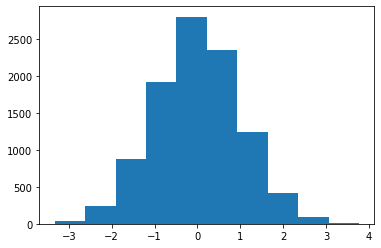

In [133]:
# Check it on the histogram
plt.hist(df1['Z_outage_sec_perweek'])
plt.show()

In [134]:
# Make a new df for median imputation
df_outage = df1[['Outage_sec_perweek', 'Z_outage_sec_perweek']]

In [135]:
# Make the outliers equal to Nan
df_outage[(df_outage.Z_outage_sec_perweek > 3)] = np.nan
df_outage[(df_outage.Z_outage_sec_perweek <- 3)] = np.nan

In [136]:
# Replace with mean values--28
df_outage['Outage_sec_perweek'].fillna(df_outage['Outage_sec_perweek'].mean(), inplace=True)

In [137]:
# Replace with no outliers
df1['Outage_sec_perweek'] = df_outage['Outage_sec_perweek']

In [138]:
# Check after replacement
df1['Outage_sec_perweek'].describe()

count    10000.000000
mean         9.999789
std          2.933316
min          1.144796
25%          8.033911
50%         10.002880
75%         11.955480
max         18.851730
Name: Outage_sec_perweek, dtype: float64

In [139]:
# Checking for ouliers using Z-scores--stats
df1['Z_email'] = st.zscore(df1['Email'])
df1[['Email', 'Z_email']].head()

,Email,Z_email
0,10,-0.666282
1,12,-0.005288
2,9,-0.996779
3,15,0.986203
4,16,1.316700


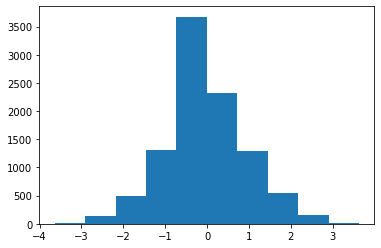

In [140]:
# Check it on the histogram
plt.hist(df1['Z_email'])
plt.show()

In [141]:
#Make a new df for median imputation
df_email = df1[['Email', 'Z_email']]

In [142]:
# Make the outliers equal to Nan
df_email[(df_email.Z_email > 3)] = np.nan
df_email[(df_email.Z_email <- 3)] = np.nan

In [143]:
# Replace with median values--219
df_email['Email'].fillna(df_email['Email'].median(), inplace=True)

In [144]:
# Replace with no outliers
df1['Email'] = df_email['Email']

In [145]:
# Check stats after mean imputation
df1['Email'].describe()

count    10000.000000
mean        12.022200
std          3.004565
min          3.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         21.000000
Name: Email, dtype: float64

In [146]:
# Checking for ouliers using Z-scores--stats
df1['Z_contacts'] = st.zscore(df1['Contacts'])
df1[['Contacts', 'Z_contacts']].head()

,Contacts,Z_contacts
0,0,-1.005852
1,0,-1.005852
2,0,-1.005852
3,2,1.017588
4,2,1.017588


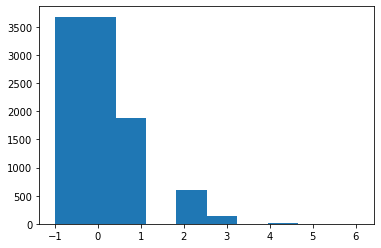

In [147]:
# Check it on the histogram
plt.hist(df1['Z_contacts'])
plt.show()

In [148]:
# Make a new df for median imputation
df_contacts = df1[['Contacts', 'Z_contacts']]

In [149]:
# Make the outliers equal to Nan
df_contacts[(df_contacts.Z_contacts > 3)] = np.nan

In [150]:
# Replace with median values--165
df_contacts['Contacts'].fillna(df_contacts['Contacts'].median(), inplace=True)

In [151]:
# Replace with no outliers
df1['Contacts'] = df_contacts['Contacts']

In [152]:
# Check after replacement
df1['Contacts'].describe()

count    10000.000000
mean         0.940800
std          0.891614
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Contacts, dtype: float64

In [153]:
# Checking for ouliers using Z-scores--stats
df1['Z_yearly_equip_fail'] = st.zscore(df1['Yearly_equip_failure'])
df1[['Yearly_equip_failure', 'Z_yearly_equip_fail']].head()

,Yearly_equip_failure,Z_yearly_equip_fail
0,1,0.946658
1,1,0.946658
2,1,0.946658
3,0,-0.625864
4,1,0.946658


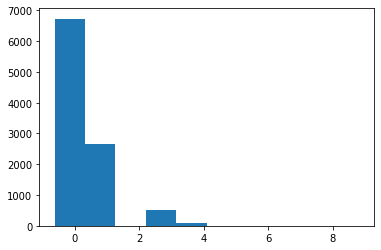

In [154]:
# Check it on the histogram
plt.hist(df1['Z_yearly_equip_fail'])
plt.show()

In [155]:
# Make a new df for median imputation
df_yearly = df1[['Yearly_equip_failure', 'Z_yearly_equip_fail']]# Make a new df for median imputation
df_yearly = df1[['Yearly_equip_failure', 'Z_yearly_equip_fail']]

In [156]:
# Make the outliers equal to Nan
df_yearly[(df_yearly.Z_yearly_equip_fail > 3)] = np.nan

In [157]:
# Replace with median values--94
df_yearly['Yearly_equip_failure'].fillna(df_yearly['Yearly_equip_failure'].median(), inplace=True)

In [158]:
# Replace with no outliers
df1['Yearly_equip_failure'] = df_yearly['Yearly_equip_failure']

In [159]:
# Check after replacement
df1['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.368800
std          0.578464
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: Yearly_equip_failure, dtype: float64

In [160]:
# Checking for ouliers using Z-scores--stats
df1['Z_tenure'] = st.zscore(df1['Tenure'])
df1[['Tenure', 'Z_tenure']].head()

,Tenure,Z_tenure
0,6.795513,-1.048746
1,1.156681,-1.262001
2,15.754144,-0.709940
3,17.087227,-0.659524
4,1.670972,-1.242551


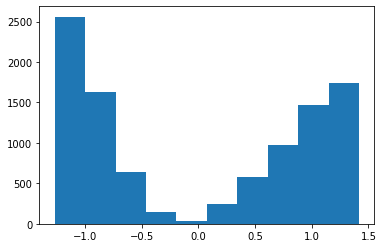

In [161]:
# Check it on the histogram
plt.hist(df1['Z_tenure'])
plt.show()

In [162]:
# Checking for ouliers using Z-scores--stats
df1['Z_monthly_charge'] = st.zscore(df1['MonthlyCharge'])
df1[['MonthlyCharge', 'Z_monthly_charge']].head()

,MonthlyCharge,Z_monthly_charge
0,172.455519,-0.003943
1,242.632554,1.630326
2,159.947583,-0.295225
3,119.956840,-1.226521
4,149.948316,-0.528086


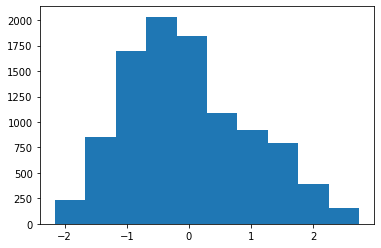

In [163]:
# Check it on the histogram
plt.hist(df1['Z_monthly_charge'])
plt.show()

In [164]:
# Checking for ouliers using Z-scores--stats
df1['Z_bandwidth_gb_year'] = st.zscore(df1['Bandwidth_GB_Year'])
df1[['Bandwidth_GB_Year', 'Z_bandwidth_gb_year']].head()

,Bandwidth_GB_Year,Z_bandwidth_gb_year
0,904.536110,-1.138487
1,800.982766,-1.185876
2,2054.706961,-0.612138
3,2164.579412,-0.561857
4,271.493436,-1.428184


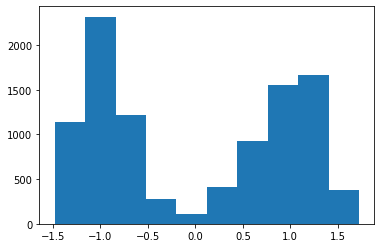

In [165]:
# Check it on the histogram
plt.hist(df1['Z_bandwidth_gb_year'])
plt.show()

In [166]:
# Checking for ouliers using Z-scores--stats
df1['Z_item1'] = st.zscore(df1['Item1'])
df1[['Item1', 'Z_item1']].head()

,Item1,Z_item1
0,5,1.454307
1,3,-0.472948
2,4,0.490679
3,4,0.490679
4,4,0.490679


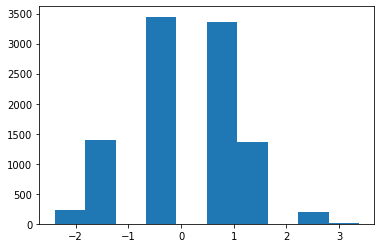

In [167]:
# Check it on the histogram
plt.hist(df1['Z_item1'])
plt.show()

In [168]:
# Check how many instances are greater than 3
df1[df1['Z_item1']>3]

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,...,Z_age,Z_income,Z_outage_sec_perweek,Z_email,Z_contacts,Z_yearly_equip_fail,Z_tenure,Z_monthly_charge,Z_bandwidth_gb_year,Z_item1
397,8303.0,Urban,1.0,73,37149.40,Married,Male,No,10.481232,17.0,...,0.962496,-0.094244,0.161090,1.647197,-1.005852,-0.625864,-0.935217,-0.701558,-0.979961,3.381562
1510,1353.0,Urban,3.0,31,34179.49,Married,Female,No,8.925221,14.0,...,-1.066700,-0.199565,-0.361786,0.655706,0.005868,-0.625864,-0.570760,0.055804,-0.573591,3.381562
2134,37122.0,Rural,4.0,31,14048.76,Married,Male,Yes,6.210987,13.0,...,-1.066700,-0.913459,-1.273866,0.325209,0.005868,0.946658,-0.941278,0.699987,-0.802072,3.381562
2264,3649.0,Urban,4.0,63,39653.80,Divorced,Female,No,6.966168,17.0,...,0.479354,-0.005430,-1.020098,1.647197,0.005868,-0.625864,-1.127250,-1.051440,-1.265574,3.381562
2558,771.0,Urban,3.0,46,49535.29,Married,Female,Yes,13.563550,18.0,...,-0.341987,0.344996,1.196861,1.977694,-1.005852,-0.625864,-1.044573,0.637279,-0.817101,3.381562
2740,200.0,Suburban,2.0,72,20465.98,Widowed,Female,Yes,10.108860,10.0,...,0.914182,-0.685885,0.035960,-0.666282,0.005868,0.946658,-0.993445,-1.051440,-1.174588,3.381562
4483,729.0,Suburban,1.0,88,14821.76,Never Married,Female,No,11.142080,13.0,...,1.687209,-0.886046,0.383159,0.325209,2.029307,-0.625864,-1.028670,-0.469133,-1.159670,3.381562
4751,0.0,Rural,0.0,83,19271.85,Widowed,Female,Yes,12.225140,15.0,...,1.445638,-0.728233,0.747106,0.986203,-1.005852,-0.625864,-1.086688,-0.644236,-1.353843,3.381562
5128,1948.0,Suburban,3.0,48,23447.42,Separated,Female,No,6.719404,13.0,...,-0.245359,-0.580155,-1.103020,0.325209,0.005868,-0.625864,1.361339,-0.818278,1.176134,3.381562
5447,1868.0,Suburban,0.0,83,54073.62,Separated,Female,No,11.160390,11.0,...,1.445638,0.505938,0.389312,-0.335785,0.005868,-0.625864,1.014070,0.520528,0.859581,3.381562


In [169]:
#Make a new df for imputation
df_i1 = df1[['Item1', 'Z_item1']]

In [170]:
# Make the outliers equal to Nan
df_i1[(df_i1.Z_item1 > 3)] = np.nan

In [171]:
# Replace with values
df_i1['Item1'].fillna(df_i1['Item1'].median(), inplace=True)

In [172]:
# Replace with no outliers
df1['Item1'] = df_i1['Item1']

In [173]:
# Check stats after median imputation
df1['Item1'].describe()

count    10000.000000
mean         3.483200
std          1.026656
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: Item1, dtype: float64

In [174]:
# Checking for ouliers using Z-scores--stats
df1['Z_item2'] = st.zscore(df1['Item2'])
df1[['Item2', 'Z_item2']].head()

,Item2,Z_item2
0,5,1.444922
1,4,0.478354
2,4,0.478354
3,4,0.478354
4,4,0.478354


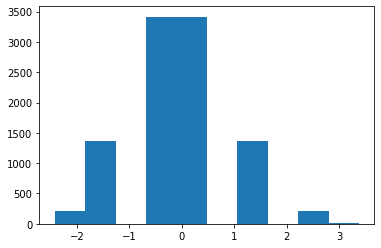

In [175]:
# Check it on the histogram
plt.hist(df1['Z_item2'])
plt.show()

In [176]:
# Check how many instances are greater than 3
df1[df1['Z_item2']>3]

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,...,Z_income,Z_outage_sec_perweek,Z_email,Z_contacts,Z_yearly_equip_fail,Z_tenure,Z_monthly_charge,Z_bandwidth_gb_year,Z_item1,Z_item2
2356,1090.0,Suburban,4.0,49,64697.57,Separated,Female,No,9.326198,15.0,...,0.882694,-0.227043,0.986203,0.005868,-0.625864,-0.990800,-1.109228,-1.149427,1.454307,3.378057
2558,771.0,Urban,3.0,46,49535.29,Married,Female,Yes,13.563550,18.0,...,0.344996,1.196861,1.977694,-1.005852,-0.625864,-1.044573,0.637279,-0.817101,3.381562,3.378057
2743,16350.0,Suburban,1.0,24,24700.60,Married,Nonbinary,No,6.162241,12.0,...,-0.535714,-1.290247,-0.005288,-1.005852,-0.625864,-0.857938,-0.469454,-0.949228,2.417934,3.378057
5965,11174.0,Suburban,1.0,22,32064.16,Divorced,Male,No,2.920273,8.0,...,-0.274581,-2.379665,-1.327276,0.005868,2.519179,1.216552,2.445835,1.382585,2.417934,3.378057
6615,2353.0,Suburban,1.0,43,37634.23,Married,Female,No,10.117650,16.0,...,-0.077050,0.038914,1.316700,-1.005852,-0.625864,0.328386,-0.120361,0.166298,2.417934,3.378057
7055,2285.0,Suburban,0.0,88,44678.29,Married,Female,No,7.228880,10.0,...,0.172753,-0.931818,-0.666282,-1.005852,0.946658,0.753322,1.044672,0.652464,2.417934,3.378057
7167,5553.0,Urban,8.0,26,58434.60,Widowed,Female,No,6.928805,10.0,...,0.660591,-1.032654,-0.666282,0.005868,-0.625864,1.113440,-0.992754,1.123403,2.417934,3.378057
7296,979.0,Urban,2.0,41,43271.39,Married,Female,No,6.444829,11.0,...,0.122860,-1.195287,-0.335785,0.005868,-0.625864,0.945931,1.164145,1.163214,3.381562,3.378057
7564,19237.0,Rural,0.0,55,66342.21,Married,Male,No,10.543470,10.0,...,0.941017,0.182005,-0.666282,-1.005852,-0.625864,1.212966,-0.760575,1.274236,2.417934,3.378057
8011,365.0,Urban,0.0,80,44608.56,Divorced,Male,Yes,17.034410,15.0,...,0.170280,2.363195,0.986203,0.005868,-0.625864,1.189548,0.641355,1.146325,2.417934,3.378057


In [177]:
# Make a new df for imputation
df_i2 = df1[['Item2', 'Z_item2']]

In [178]:
# Make the outliers equal to Nan
df_i2[(df_i2.Z_item2 > 3)] = np.nan

In [179]:
# Replace with values
df_i2['Item2'].fillna(df_i2['Item2'].median(), inplace=True)

In [180]:
# Replace with no outliers
df1['Item2'] = df_i2['Item2']

In [181]:
# Check stats after median imputation
df1['Item2'].describe()

count    10000.000000
mean         3.501200
std          1.027085
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: Item2, dtype: float64

In [182]:
# Checking for ouliers using Z-scores--stats
df1['Z_item3'] = st.zscore(df1['Item3'])
df1[['Item3', 'Z_item3']].head()

,Item3,Z_item3
0,5,1.471896
1,3,-0.473770
2,2,-1.446603
3,4,0.499063
4,4,0.499063


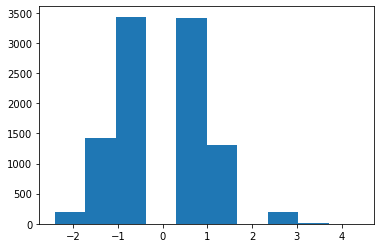

In [183]:
# Check it on the histogram
plt.hist(df1['Z_item3'])
plt.show()

In [184]:
# Check how many instances are greater than 3
df1[df1['Z_item3']>3]

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,...,Z_outage_sec_perweek,Z_email,Z_contacts,Z_yearly_equip_fail,Z_tenure,Z_monthly_charge,Z_bandwidth_gb_year,Z_item1,Z_item2,Z_item3
944,1655.0,Rural,2.0,54,17773.11,Separated,Female,Yes,9.846700,12.0,...,-0.052135,-0.005288,-1.005852,-0.625864,-0.926283,0.872834,-0.714542,1.454307,1.444922,3.417563
1813,201.0,Suburban,0.0,25,21795.90,Married,Male,No,7.456656,10.0,...,-0.855277,-0.666282,0.005868,0.946658,-0.825224,1.107025,-0.737822,2.417934,1.444922,3.417563
2743,16350.0,Suburban,1.0,24,24700.60,Married,Nonbinary,No,6.162241,12.0,...,-1.290247,-0.005288,-1.005852,-0.625864,-0.857938,-0.469454,-0.949228,2.417934,3.378057,3.417563
3578,39090.0,Rural,2.0,43,15584.37,Married,Male,Yes,10.729760,15.0,...,0.244605,0.986203,2.029307,-0.625864,-0.986420,1.106023,-0.966390,1.454307,2.411489,3.417563
4137,1264.0,Suburban,3.0,24,28683.49,Widowed,Male,No,10.350520,12.0,...,0.117166,-0.005288,-1.005852,-0.625864,-0.925375,-0.644236,-1.025460,2.417934,1.444922,3.417563
5134,923.0,Suburban,2.0,84,24149.71,Never Married,Female,No,8.245283,13.0,...,-0.590269,0.325209,0.005868,-0.625864,1.338296,-0.003175,1.350350,0.490679,1.444922,3.417563
5527,467.0,Urban,0.0,87,34209.19,Never Married,Male,No,6.413823,14.0,...,-1.205706,0.655706,0.005868,-0.625864,1.177001,-0.644236,0.922226,2.417934,1.444922,3.417563
7296,979.0,Urban,2.0,41,43271.39,Married,Female,No,6.444829,11.0,...,-1.195287,-0.335785,0.005868,-0.625864,0.945931,1.164145,1.163214,3.381562,3.378057,4.390396
8244,5115.0,Rural,3.0,45,12616.30,Never Married,Female,No,10.203160,13.0,...,0.067648,0.325209,-1.005852,-0.625864,1.375522,2.387204,1.477921,2.417934,3.378057,3.417563
8764,11195.0,Rural,1.0,44,12558.05,Never Married,Male,No,9.257433,17.0,...,-0.250150,1.647197,-1.005852,0.946658,0.608744,1.106345,0.636590,2.417934,2.411489,3.417563


In [185]:
# Make a new df for imputation
df_i3 = df1[['Item3', 'Z_item3']]

In [186]:
# Make the outliers equal to Nan
df_i3[(df_i3.Z_item3 > 3)] = np.nan

In [187]:
# Replace with values
df_i3['Item3'].fillna(df_i3['Item3'].median(), inplace=True)

In [188]:
# Replace with no outliers
df1['Item3'] = df_i3['Item3']

In [189]:
# Check stats after median imputation
df1['Item3'].describe()

count    10000.000000
mean         3.481700
std          1.019887
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: Item3, dtype: float64

In [190]:
# Checking for ouliers using Z-scores--stats
df1['Z_item4'] = st.zscore(df1['Item4'])
df1[['Item4', 'Z_item4']].head()

,Item4,Z_item4
0,3,-0.485004
1,3,-0.485004
2,4,0.489878
3,2,-1.459886
4,3,-0.485004


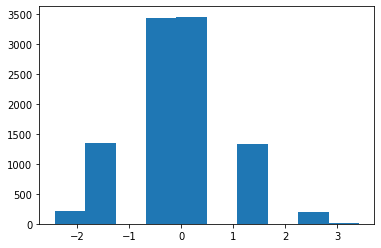

In [191]:
# Check it on the histogram
plt.hist(df1['Z_item4'])
plt.show()

In [192]:
# Check how many instances are greater than 3
df1[df1['Z_item4']>3]

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,...,Z_email,Z_contacts,Z_yearly_equip_fail,Z_tenure,Z_monthly_charge,Z_bandwidth_gb_year,Z_item1,Z_item2,Z_item3,Z_item4
10,555.0,Urban,7.0,23,22580.70,Separated,Female,No,9.341632,9.0,...,-0.996779,-1.005852,2.519179,-0.577077,0.054337,-0.303669,0.490679,0.478354,0.499063,3.414525
533,722.0,Urban,0.0,44,24202.12,Divorced,Nonbinary,No,10.360036,14.0,...,0.655706,-1.005852,-0.625864,-0.969968,0.579159,-1.032509,-1.436576,-0.488213,-0.473770,3.414525
559,26448.0,Urban,0.0,88,33165.90,Never Married,Male,No,10.918580,14.0,...,0.655706,1.017588,0.946658,-1.078330,1.044350,-1.162922,1.454307,1.444922,-0.473770,3.414525
2284,8854.0,Rural,0.0,60,20029.65,Divorced,Female,No,10.385330,12.0,...,-0.005288,0.005868,-0.625864,-0.619784,-0.003782,-0.732381,0.490679,-0.488213,-0.473770,3.414525
3225,2656.0,Urban,1.0,71,12457.30,Widowed,Female,No,10.563620,12.0,...,-0.005288,0.005868,-0.625864,-1.082531,-0.295141,-1.275502,-1.436576,0.478354,-1.446603,3.414525
3658,4654.0,Suburban,1.0,63,17570.65,Widowed,Female,Yes,11.753050,10.0,...,-0.666282,-1.005852,-0.625864,-1.216736,-0.061294,-1.397744,1.454307,1.444922,1.471896,3.414525
5757,2086.0,Urban,0.0,24,21531.39,Separated,Male,No,8.289386,15.0,...,0.986203,0.005868,-0.625864,1.040796,-1.343098,1.081017,-1.436576,-1.454781,-2.419436,3.414525
5866,4852.0,Rural,0.0,54,38613.42,Divorced,Male,No,12.628450,7.0,...,-1.657773,0.005868,0.946658,0.787607,0.171272,0.667639,-1.436576,-0.488213,-0.473770,3.414525
9069,18.0,Suburban,0.0,33,42921.65,Married,Male,No,10.463630,13.0,...,0.325209,-1.005852,-0.625864,1.190640,1.863326,1.248874,-0.472948,-0.488213,-0.473770,3.414525


In [193]:
# Make a new df for imputation
df_i4 = df1[['Item4', 'Z_item4']]

In [194]:
# Make the outliers equal to Nan
df_i4[(df_i4.Z_item4 > 3)] = np.nan

In [195]:
# Replace with values
df_i4['Item4'].fillna(df_i4['Item4'].median(), inplace=True)

In [196]:
# Replace with no outliers
df1['Item4'] = df_i4['Item4']

In [197]:
# Check stats after median imputation
df1['Item4'].describe()

count    10000.000000
mean         3.493900
std          1.020523
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: Item4, dtype: float64

In [198]:
# Checking for ouliers using Z-scores--stats
df1['Z_item5'] = st.zscore(df1['Item5'])
df1[['Item5', 'Z_item5']].head()

,Item5,Z_item5
0,4,0.494844
1,4,0.494844
2,4,0.494844
3,5,1.470674
4,4,0.494844


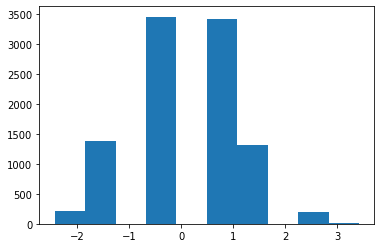

In [199]:
# Check it on the histogram
plt.hist(df1['Z_item5'])
plt.show()

In [200]:
# Check how many instances are greater than 3
df1[df1['Z_item5']>3]

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,...,Z_contacts,Z_yearly_equip_fail,Z_tenure,Z_monthly_charge,Z_bandwidth_gb_year,Z_item1,Z_item2,Z_item3,Z_item4,Z_item5
137,1135.0,Urban,1.0,89,31600.92,Widowed,Male,No,4.978546,12.0,...,1.017588,-0.625864,-1.031505,0.578649,-0.909720,0.490679,2.411489,2.444730,-2.434768,3.422335
170,902.0,Suburban,0.0,53,32653.51,Married,Male,Yes,4.372035,7.0,...,0.005868,-0.625864,-0.719417,-0.177908,-0.570938,-0.472948,-0.488213,-0.473770,-1.459886,3.422335
295,12478.0,Urban,2.0,48,42469.81,Never Married,Nonbinary,No,11.870421,14.0,...,0.005868,-0.625864,-0.998109,-0.293974,-1.113701,0.490679,0.478354,0.499063,-2.434768,3.422335
778,1363.0,Urban,2.0,87,18455.86,Never Married,Female,No,10.857988,14.0,...,0.005868,-0.625864,-1.060258,-0.992755,-1.207838,-0.472948,-1.454781,-0.473770,-1.459886,3.422335
2197,138.0,Urban,3.0,19,44080.00,Married,Female,No,16.892850,7.0,...,0.005868,-0.625864,-1.124253,-1.051440,-1.210673,-0.472948,0.478354,-0.473770,-2.434768,3.422335
2445,29903.0,Rural,1.0,29,50968.30,Never Married,Female,No,10.391030,7.0,...,-1.005852,-0.625864,-1.243264,0.170531,-1.340902,-0.472948,-0.488213,-0.473770,-1.459886,3.422335
2622,1034.0,Suburban,3.0,40,21334.55,Widowed,Male,No,8.568261,16.0,...,0.005868,-0.625864,-0.985269,-0.235827,-0.999383,0.490679,0.478354,1.471896,-0.485004,3.422335
6258,266.0,Suburban,6.0,38,21714.62,Never Married,Female,No,16.237380,8.0,...,3.041027,-0.625864,1.242362,-1.575664,1.265699,1.454307,1.444922,0.499063,-1.459886,3.422335
6684,206.0,Urban,1.0,36,44501.99,Widowed,Male,No,9.056021,8.0,...,1.017588,0.946658,0.935807,0.520794,0.920148,0.490679,-0.488213,-0.473770,-1.459886,3.422335
8375,360.0,Urban,8.0,46,17847.64,Divorced,Male,No,12.497170,13.0,...,0.005868,2.519179,1.323898,-0.644236,1.242092,2.417934,1.444922,0.499063,-1.459886,3.422335


In [201]:
# Make a new df for imputation
df_i5 = df1[['Item5', 'Z_item5']]

In [202]:
# Make the outliers equal to Nan
df_i5[(df_i5.Z_item5 > 3)] = np.nan

In [203]:
# Replace with values
df_i5['Item5'].fillna(df_i5['Item5'].median(), inplace=True)

In [204]:
# Replace with no outliers
df1['Item5'] = df_i5['Item5']

In [205]:
# Check stats after median imputation
df1['Item5'].describe()

count    10000.000000
mean         3.488100
std          1.017724
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: Item5, dtype: float64

In [206]:
# Checking for ouliers using Z-scores--stats
df1['Z_item6'] = st.zscore(df1['Item6'])
df1[['Item6', 'Z_item6']].head()

,Item6,Z_item6
0,4,0.486389
1,3,-0.481165
2,3,-0.481165
3,4,0.486389
4,4,0.486389


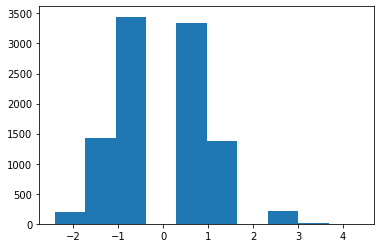

In [207]:
# Check it on the histogram
plt.hist(df1['Z_item6'])
plt.show()

In [208]:
# Check how many instances are greater than 3
df1[df1['Z_item6']>3]

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,...,Z_yearly_equip_fail,Z_tenure,Z_monthly_charge,Z_bandwidth_gb_year,Z_item1,Z_item2,Z_item3,Z_item4,Z_item5,Z_item6
70,20269.0,Urban,4.0,60,42784.82,Married,Female,Yes,6.129509,12.0,...,-0.625864,-0.401065,0.932231,-0.327456,1.454307,1.444922,2.444730,1.464761,-0.480987,3.389051
1415,3431.0,Suburban,3.0,49,46183.90,Married,Female,No,6.399634,14.0,...,2.519179,-1.166244,-0.295140,-1.297319,1.454307,0.478354,-0.473770,1.464761,-1.456817,4.356605
2273,2759.0,Urban,8.0,81,50836.65,Separated,Male,Yes,8.740627,17.0,...,4.091701,-0.704831,1.571695,-0.628738,2.417934,1.444922,2.444730,0.489878,0.494844,3.389051
2508,12407.0,Rural,1.0,77,62989.06,Married,Female,No,2.094319,9.0,...,-0.625864,-0.267376,-0.237019,-0.244053,0.490679,1.444922,-0.473770,1.464761,-0.480987,3.389051
4913,2231.0,Rural,3.0,69,87277.75,Widowed,Female,Yes,13.353510,10.0,...,-0.625864,-1.143050,0.055457,-1.038858,2.417934,2.411489,2.444730,2.439643,-0.480987,3.389051
5833,14429.0,Urban,5.0,43,32669.61,Widowed,Male,No,4.866722,13.0,...,-0.625864,1.289861,-1.343098,1.369894,2.417934,0.478354,0.499063,0.489878,-0.480987,3.389051
6211,85.0,Suburban,0.0,31,28218.54,Divorced,Female,No,7.784659,12.0,...,0.946658,1.113893,0.407587,1.305999,2.417934,0.478354,0.499063,1.464761,-1.456817,3.389051
6797,5633.0,Rural,4.0,80,19171.71,Widowed,Male,No,5.713769,15.0,...,-0.625864,0.951057,-1.284467,0.998788,1.454307,1.444922,0.499063,0.489878,-1.456817,3.389051
7017,13168.0,Suburban,1.0,80,49761.98,Never Married,Male,No,7.917411,11.0,...,-0.625864,0.968106,-1.109587,0.745739,1.454307,0.478354,0.499063,2.439643,-2.432648,3.389051
7428,52802.0,Rural,0.0,59,50956.85,Widowed,Female,No,6.436661,14.0,...,0.946658,1.113038,0.462581,0.947119,1.454307,0.478354,0.499063,-0.485004,-1.456817,3.389051


In [209]:
# Make a new df for imputation
df_i6 = df1[['Item6', 'Z_item6']]

In [210]:
# Make the outliers equal to Nan
df_i6[(df_i6.Z_item6 > 3)] = np.nan

In [211]:
# Replace with values
df_i6['Item6'].fillna(df_i6['Item6'].median(), inplace=True)

In [212]:
# Replace with no outliers
df1['Item6'] = df_i6['Item6']

In [213]:
# Check stats after median imputation
df1['Item6'].describe()

count    10000.000000
mean         3.492000
std          1.025593
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: Item6, dtype: float64

In [214]:
# Checking for ouliers using Z-scores--stats
df1['Z_item7'] = st.zscore(df1['Item7'])
df1[['Item7', 'Z_item7']].head()

,Item7,Z_item7
0,3,-0.495406
1,4,0.476931
2,3,-0.495406
3,3,-0.495406
4,4,0.476931


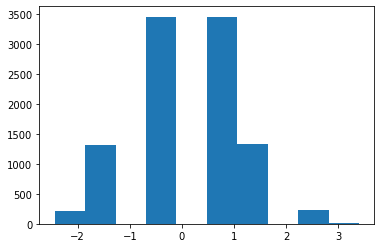

In [215]:
# Check it on the histogram
plt.hist(df1['Z_item7'])
plt.show()

In [216]:
# Check how many instances are greater than 3
df1[df1['Z_item7']>3]

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,...,Z_tenure,Z_monthly_charge,Z_bandwidth_gb_year,Z_item1,Z_item2,Z_item3,Z_item4,Z_item5,Z_item6,Z_item7
67,13547.0,Urban,1.0,78,22365.28,Widowed,Male,Yes,10.803937,19.0,...,-0.897668,0.814713,-0.946974,0.490679,0.478354,-0.473770,2.439643,-1.456817,1.453943,3.393942
1615,1052.0,Suburban,1.0,25,63134.48,Married,Male,No,12.735175,15.0,...,-1.028270,-0.819397,-1.116596,2.417934,2.411489,1.471896,-0.485004,-0.480987,0.486389,3.393942
1675,637.0,Urban,2.0,72,31203.12,Never Married,Female,Yes,13.229049,7.0,...,-0.988150,2.387203,-0.920224,2.417934,2.411489,2.444730,0.489878,-1.456817,1.453943,3.393942
2835,1132.0,Rural,4.0,65,9612.82,Divorced,Female,No,9.329583,7.0,...,-0.830148,-1.109587,-1.010090,-0.472948,0.478354,-0.473770,2.439643,-1.456817,1.453943,3.393942
2952,2737.0,Suburban,3.0,87,15469.00,Married,Male,No,9.593637,5.0,...,-1.055688,0.520473,-1.139721,0.490679,-0.488213,-0.473770,-0.485004,-0.480987,-0.481165,3.393942
3331,253.0,Rural,2.0,43,28284.38,Married,Male,No,17.513120,17.0,...,-0.428909,-0.003594,-0.274552,1.454307,1.444922,1.471896,1.464761,-2.432648,1.453943,3.393942
5170,209.0,Rural,5.0,51,52233.68,Divorced,Female,No,7.356317,11.0,...,1.103620,-1.226522,1.216591,2.417934,2.411489,0.499063,1.464761,1.470674,2.421497,3.393942
6032,197.0,Suburban,8.0,68,27289.75,Never Married,Female,No,5.796239,12.0,...,1.301179,-0.178334,1.478766,1.454307,0.478354,2.444730,0.489878,-1.456817,1.453943,3.393942
6921,101.0,Rural,0.0,74,58425.91,Divorced,Male,No,10.921950,10.0,...,1.022135,0.229217,0.900635,1.454307,0.478354,1.471896,1.464761,-1.456817,0.486389,3.393942
7408,330.0,Suburban,0.0,49,12958.74,Widowed,Female,No,2.783453,12.0,...,0.768416,-0.003782,0.660503,1.454307,1.444922,0.499063,0.489878,-0.480987,1.453943,3.393942


In [217]:
# Make a new df for imputation
df_i7 = df1[['Item7', 'Z_item7']]

In [218]:
# Make the outliers equal to Nan
df_i7[(df_i7.Z_item7 > 3)] = np.nan

In [219]:
# Check before replacement
df_i7['Item7'].describe()

count    9989.000000
mean        3.505656
std         1.022520
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: Item7, dtype: float64

In [220]:
# Replace with values
df_i7['Item7'].fillna(df_i7['Item7'].median(), inplace=True)

In [221]:
# Replace with no outliers
df1['Item7'] = df_i7['Item7']

In [222]:
# Check stats after median imputation
df1['Item7'].describe()

count    10000.000000
mean         3.506200
std          1.022089
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: Item7, dtype: float64

In [223]:
# Checking for ouliers using Z-scores--stats
df1['Z_item8'] = st.zscore(df1['Item8'])
df1[['Item8', 'Z_item8']].head()

,Item8,Z_item8
0,4,0.490384
1,4,0.490384
2,3,-0.481828
3,3,-0.481828
4,5,1.462596


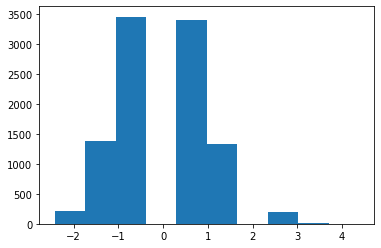

In [224]:
# Check it on the histogram
plt.hist(df1['Z_item8'])
plt.show()

In [225]:
# Check how many instances are greater than 3
df1[df1['Z_item8']>3]

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,...,Z_monthly_charge,Z_bandwidth_gb_year,Z_item1,Z_item2,Z_item3,Z_item4,Z_item5,Z_item6,Z_item7,Z_item8
578,21763.0,Suburban,8.0,35,21801.03,Never Married,Male,No,12.478106,9.0,...,-1.866975,-1.006208,1.454307,1.444922,1.471896,0.489878,-1.456817,0.486389,1.449268,3.407021
919,447.0,Suburban,0.0,76,8716.12,Divorced,Male,Yes,10.525453,10.0,...,-0.294839,-1.201948,2.417934,2.411489,1.471896,0.489878,0.494844,1.453943,-0.495406,3.407021
1802,533.0,Suburban,1.0,68,28837.52,Separated,Female,No,12.171821,13.0,...,-1.517033,-1.231801,2.417934,1.444922,1.471896,-0.485004,-0.480987,1.453943,0.476931,3.407021
2043,25827.0,Urban,0.0,34,37794.12,Widowed,Female,Yes,7.365321,12.0,...,-0.294805,-1.147509,0.490679,1.444922,-0.473770,1.464761,-1.456817,0.486389,0.476931,3.407021
2072,6257.0,Suburban,1.0,36,30575.77,Married,Male,Yes,11.585510,10.0,...,-0.062575,-1.110643,1.454307,0.478354,0.499063,0.489878,-1.456817,0.486389,1.449268,3.407021
2185,5060.0,Urban,4.0,75,36649.03,Divorced,Male,No,11.829500,14.0,...,0.287283,-0.712543,2.417934,1.444922,1.471896,0.489878,-2.432648,2.421497,2.421605,4.379233
2366,11294.0,Urban,0.0,29,38009.71,Separated,Female,Yes,6.933869,15.0,...,0.054612,-1.117342,1.454307,2.411489,0.499063,0.489878,-0.480987,2.421497,1.449268,3.407021
2964,22254.0,Suburban,1.0,27,49071.14,Widowed,Female,No,10.577500,14.0,...,-0.062575,-1.206034,1.454307,0.478354,0.499063,0.489878,-0.480987,1.453943,0.476931,3.407021
3107,218.0,Suburban,2.0,31,80392.41,Married,Female,No,9.736413,9.0,...,-0.528331,-0.909995,2.417934,0.478354,2.444730,0.489878,-1.456817,1.453943,0.476931,3.407021
4486,13981.0,Suburban,0.0,28,93909.59,Married,Female,No,9.472208,8.0,...,0.694407,-0.894193,1.454307,0.478354,0.499063,0.489878,-0.480987,0.486389,2.421605,3.407021


In [226]:
# Make a new df for imputation
df_i8 = df1[['Item8', 'Z_item8']]

In [227]:
# Make the outliers equal to Nan
df_i8[(df_i8.Z_item8 > 3)] = np.nan

In [228]:
# Replace with values
df_i8['Item8'].fillna(df_i8['Item8'].median(), inplace=True)

In [229]:
# Replace with no outliers
df1['Item8'] = df_i8['Item8']

In [230]:
# Check stats after median imputation
df1['Item8'].describe()

count    10000.000000
mean         3.489500
std          1.019408
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: Item8, dtype: float64

In [231]:
# Check df info
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  float64
 1   Area                  10000 non-null  object 
 2   Children              10000 non-null  float64
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Marital               10000 non-null  object 
 6   Gender                10000 non-null  object 
 7   Churn                 10000 non-null  object 
 8   Outage_sec_perweek    10000 non-null  float64
 9   Email                 10000 non-null  float64
 10  Contacts              10000 non-null  float64
 11  Yearly_equip_failure  10000 non-null  float64
 12  Techie                10000 non-null  object 
 13  Contract              10000 non-null  object 
 14  Port_modem            10000 non-null  object 
 15  Tablet              

In [232]:
df1.shape

(10000, 57)

In [233]:
df2 = df1[['Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 
           'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 
           'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
           'Tablet', 'InternetService', 'Phone', 'Multiple', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies', 
           'PaperlessBilling', 'PaymentMethod', 'Tenure', 
           'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 
           'Item3', 'Item4', 'Item5', 'Item6', 
           'Item7', 'Item8']]

In [234]:
df2.shape

(10000, 38)

### Univariate and Bivariate visualizations

<AxesSubplot:xlabel='Churn', ylabel='count'>

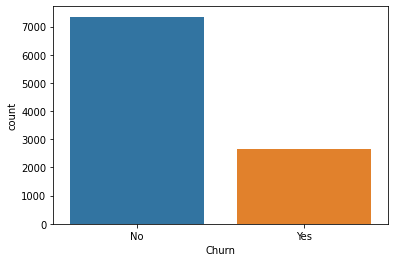

In [235]:
# Univariate plot count
sns.countplot(df2.Churn)

<AxesSubplot:xlabel='Population', ylabel='Count'>

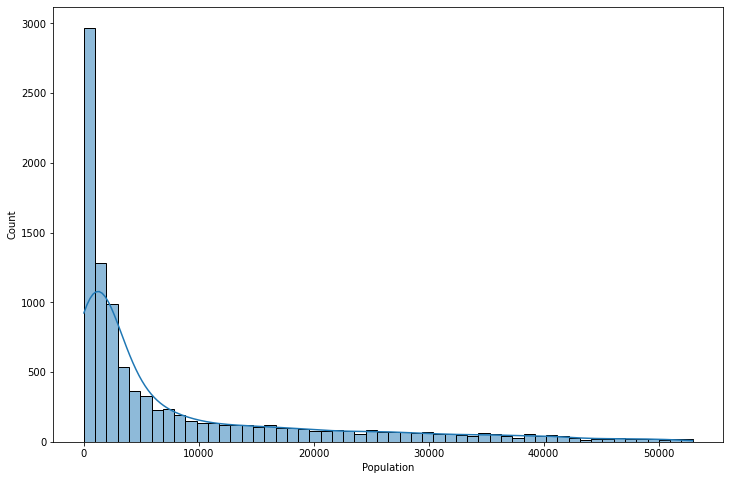

In [236]:
# Univariate plot
plt.figure(figsize=(12,8))
sns.histplot(df2.Population,kde=True)

<AxesSubplot:xlabel='Population', ylabel='Density'>

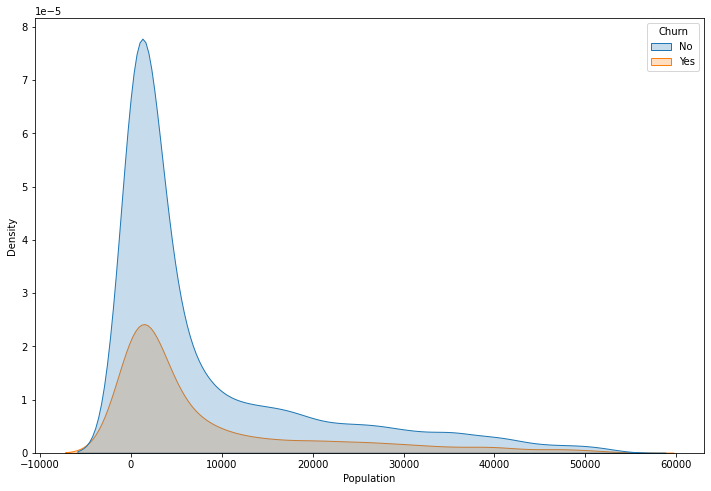

In [237]:
# Bivariate plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df2, x='Population', hue='Churn', fill=True)

<AxesSubplot:xlabel='Area', ylabel='count'>

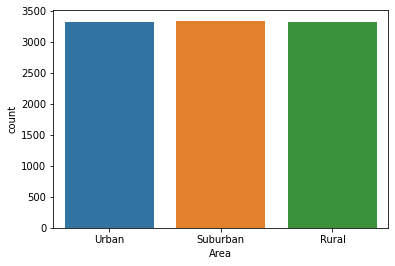

In [238]:
# Univariate plot count
sns.countplot(df2.Area)

<AxesSubplot:xlabel='Area', ylabel='count'>

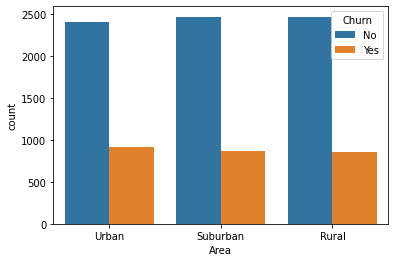

In [239]:
# Bivariate plot
sns.countplot(data=df, x='Area', hue='Churn')

<AxesSubplot:xlabel='Children', ylabel='Count'>

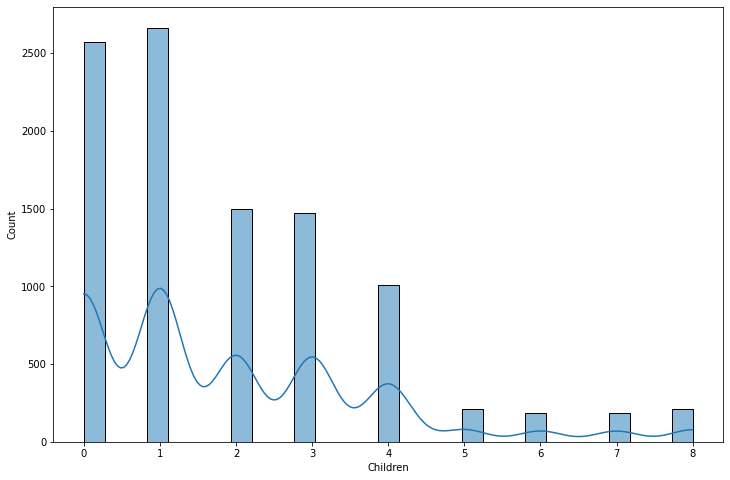

In [240]:
# Univariate plot
plt.figure(figsize=(12,8))
sns.histplot(df2.Children,kde=True)

<AxesSubplot:xlabel='Children', ylabel='Density'>

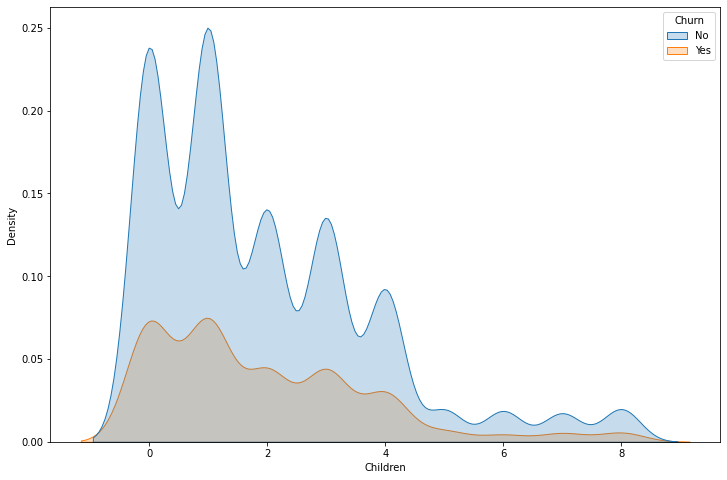

In [241]:
# Bivariate plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df2, x='Children', hue='Churn', fill=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

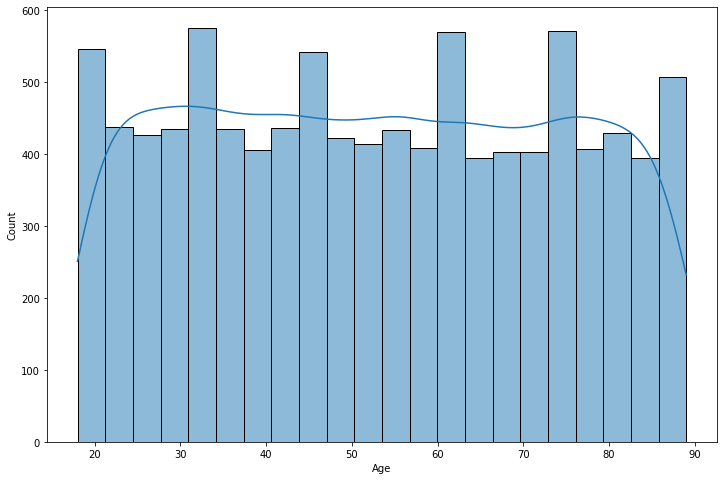

In [242]:
# Univariate plot
plt.figure(figsize=(12,8))
sns.histplot(df2.Age,kde=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

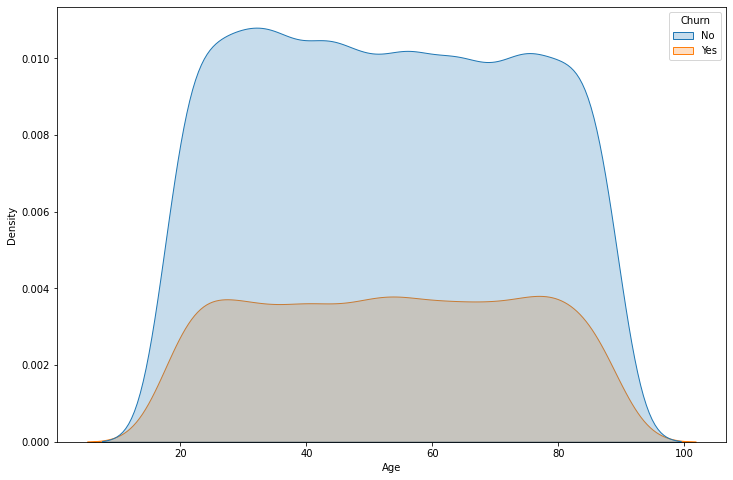

In [243]:
# Bivariate plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df2, x='Age', hue='Churn', fill=True)

<AxesSubplot:xlabel='Income', ylabel='Count'>

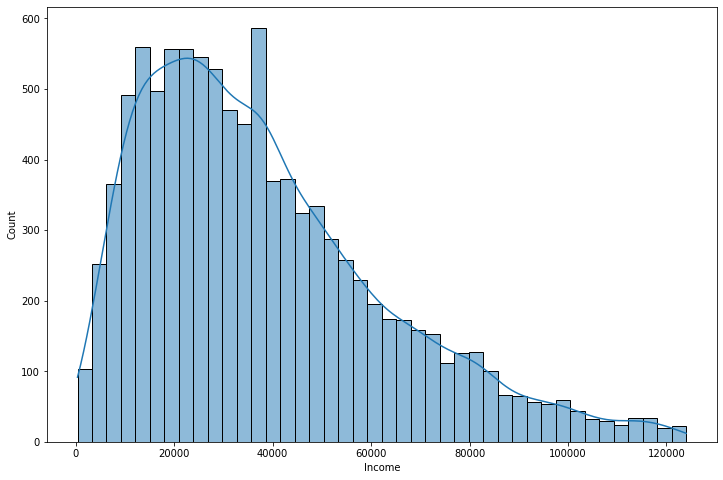

In [244]:
# Univariate plot
plt.figure(figsize=(12,8))
sns.histplot(df2.Income,kde=True)

<AxesSubplot:xlabel='Income', ylabel='Density'>

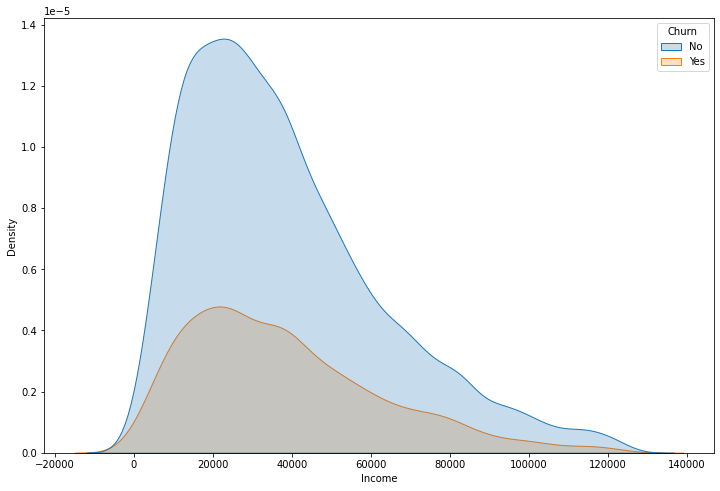

In [245]:
# Bivariate plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df2, x='Income', hue='Churn', fill=True)

<AxesSubplot:xlabel='Marital', ylabel='count'>

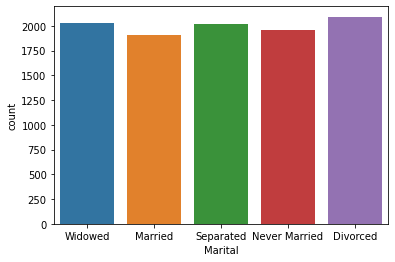

In [246]:
# Univariate plot count
sns.countplot(df2.Marital)

<AxesSubplot:xlabel='Marital', ylabel='count'>

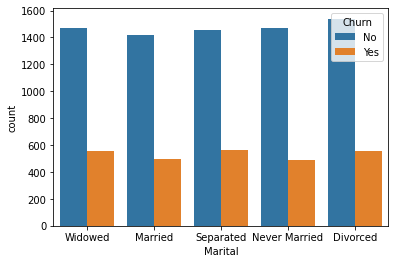

In [247]:
# Bivariate plot
sns.countplot(data=df, x='Marital', hue='Churn')

<AxesSubplot:xlabel='Gender', ylabel='count'>

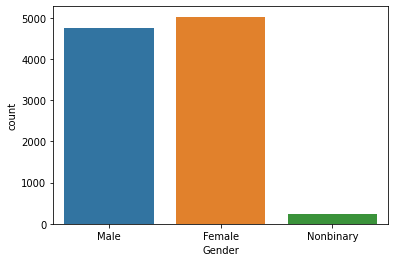

In [248]:
# Univariate plot count
sns.countplot(df2.Gender)

<AxesSubplot:xlabel='Gender', ylabel='count'>

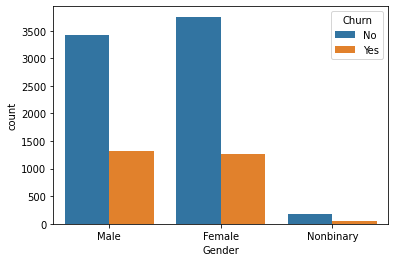

In [249]:
# Bivariate plot
sns.countplot(data=df, x='Gender', hue='Churn')

<AxesSubplot:xlabel='Outage_sec_perweek', ylabel='Count'>

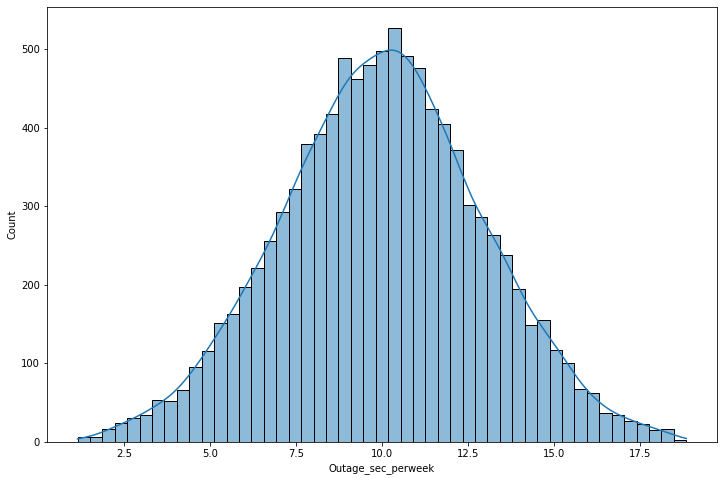

In [250]:
# Univariate plot
plt.figure(figsize=(12,8))
sns.histplot(df2.Outage_sec_perweek,kde=True)

<AxesSubplot:xlabel='Outage_sec_perweek', ylabel='Density'>

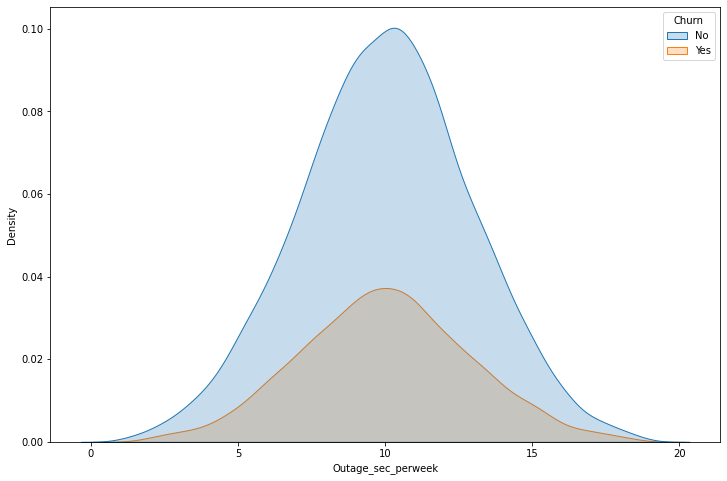

In [251]:
# Bivariate plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df2, x='Outage_sec_perweek', hue='Churn', fill=True)

<AxesSubplot:xlabel='Email', ylabel='Count'>

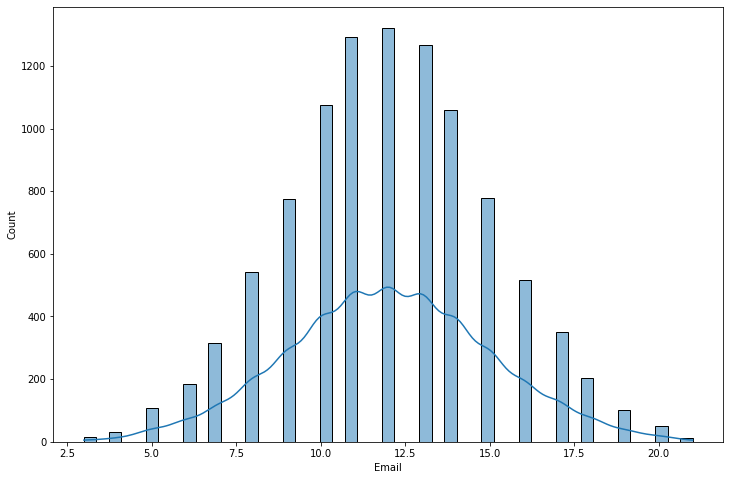

In [252]:
# Univariate plot
plt.figure(figsize=(12,8))
sns.histplot(df2.Email,kde=True)

<AxesSubplot:xlabel='Email', ylabel='Density'>

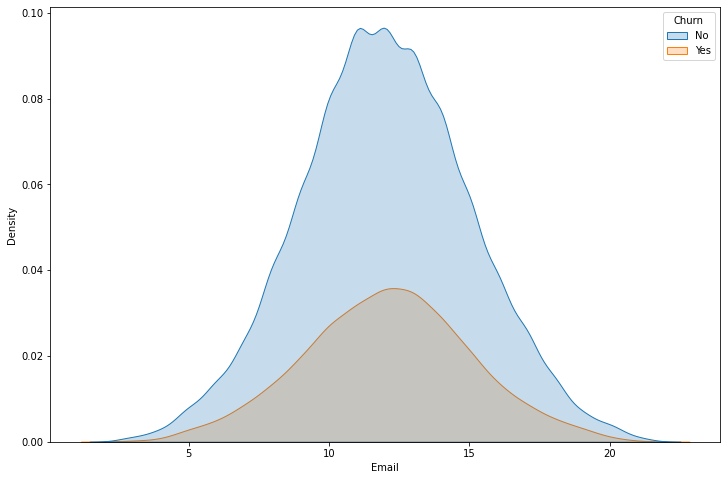

In [253]:
# Bivariate plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df2, x='Email', hue='Churn', fill=True)

<AxesSubplot:xlabel='Contacts', ylabel='Count'>

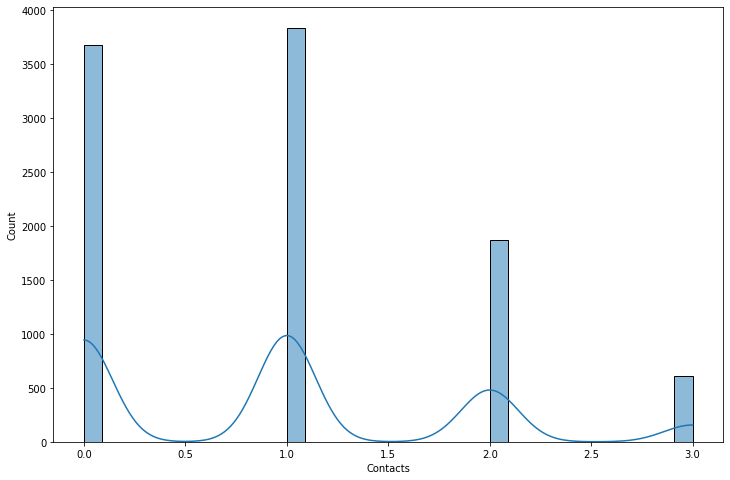

In [254]:
# Univariate plot
plt.figure(figsize=(12,8))
sns.histplot(df2.Contacts,kde=True)

<AxesSubplot:xlabel='Contacts', ylabel='Density'>

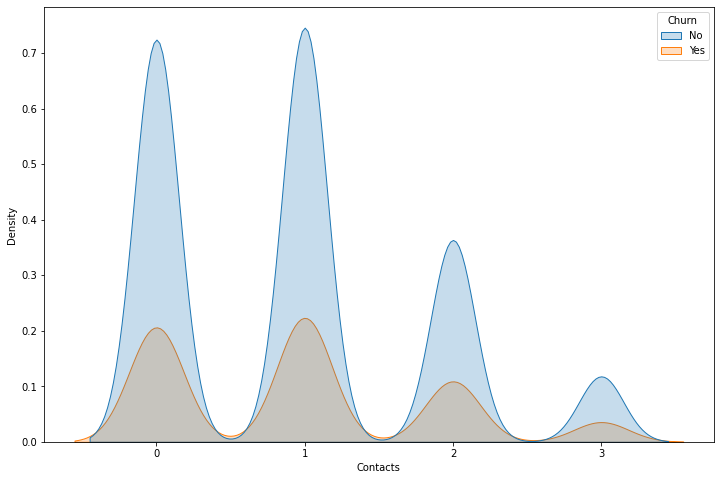

In [255]:
# Bivariate plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df2, x='Contacts', hue='Churn', fill=True)

<AxesSubplot:xlabel='Yearly_equip_failure', ylabel='Count'>

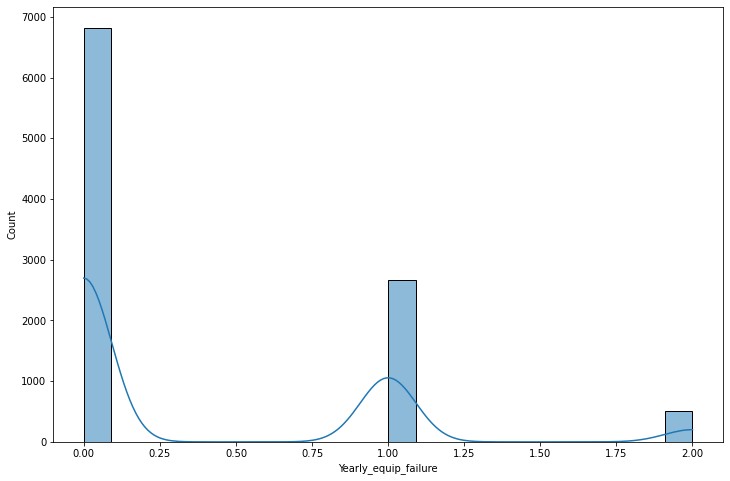

In [256]:
# Univariate plot
plt.figure(figsize=(12,8))
sns.histplot(df2.Yearly_equip_failure,kde=True)

<AxesSubplot:xlabel='Yearly_equip_failure', ylabel='Density'>

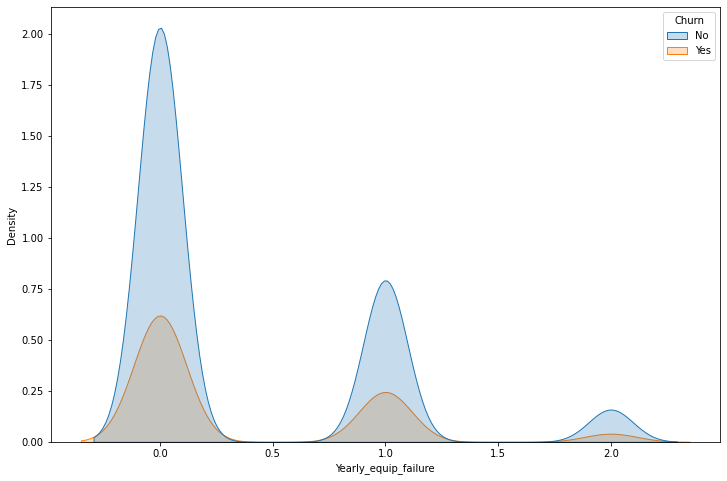

In [257]:
# Bivariate plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df2, x='Yearly_equip_failure', hue='Churn', fill=True)

<AxesSubplot:xlabel='Techie', ylabel='count'>

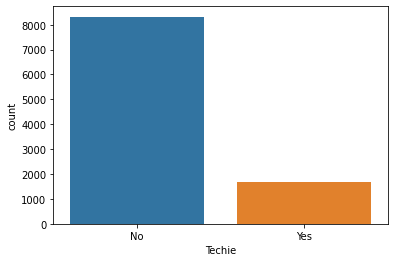

In [258]:
# Univariate plot count
sns.countplot(df2.Techie)

<AxesSubplot:xlabel='Techie', ylabel='count'>

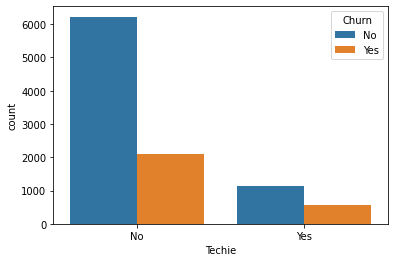

In [259]:
# Bivariate plot
sns.countplot(data=df, x='Techie', hue='Churn')

<AxesSubplot:xlabel='Contract', ylabel='count'>

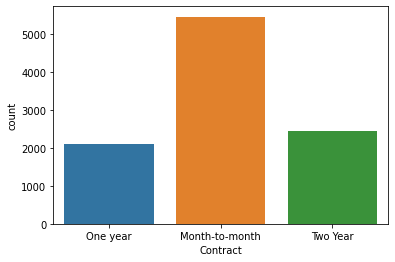

In [260]:
# Univariate plot count
sns.countplot(df2.Contract)

<AxesSubplot:xlabel='Contract', ylabel='count'>

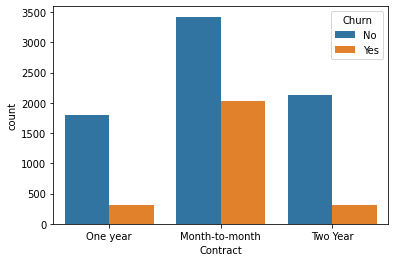

In [261]:
# Bivariate plot
sns.countplot(data=df, x='Contract', hue='Churn')

<AxesSubplot:xlabel='Port_modem', ylabel='count'>

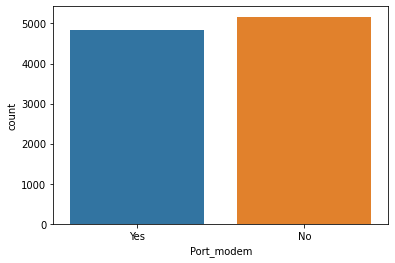

In [262]:
# Univariate plot count
sns.countplot(df2.Port_modem)

<AxesSubplot:xlabel='Port_modem', ylabel='count'>

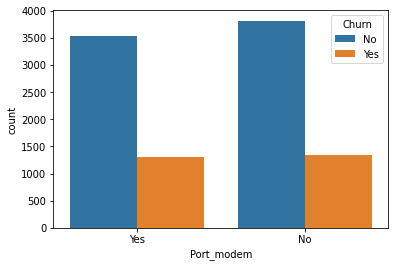

In [263]:
# Bivariate plot
sns.countplot(data=df, x='Port_modem', hue='Churn')

<AxesSubplot:xlabel='Tablet', ylabel='count'>

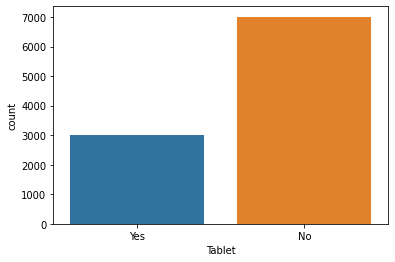

In [264]:
# Univariate plot count
sns.countplot(df2.Tablet)

<AxesSubplot:xlabel='Tablet', ylabel='count'>

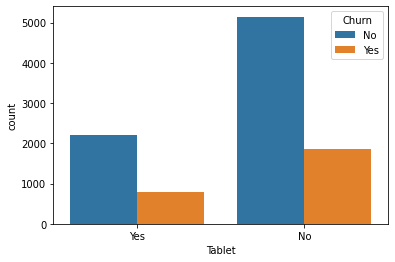

In [265]:
# Bivariate plot
sns.countplot(data=df, x='Tablet', hue='Churn')

<AxesSubplot:xlabel='InternetService', ylabel='count'>

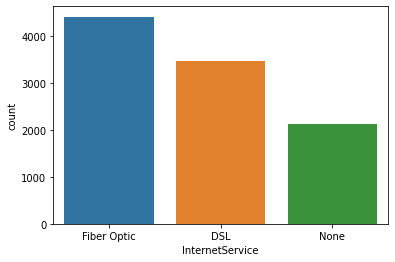

In [266]:
# Univariate plot count
sns.countplot(df2.InternetService)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

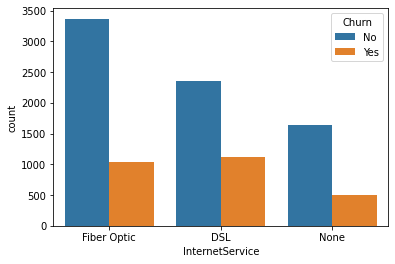

In [267]:
# Bivariate plot
sns.countplot(data=df, x='InternetService', hue='Churn')

<AxesSubplot:xlabel='Phone', ylabel='count'>

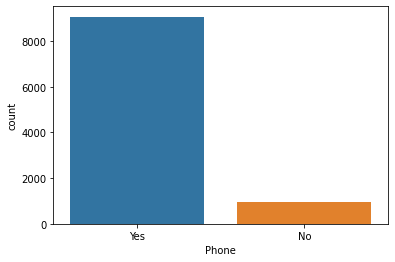

In [268]:
# Univariate plot count
sns.countplot(df2.Phone)

<AxesSubplot:xlabel='Phone', ylabel='count'>

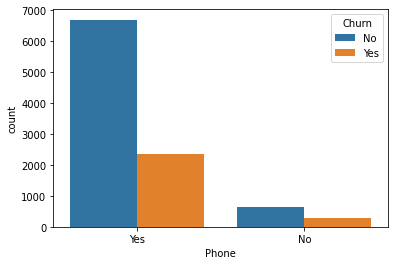

In [269]:
# Bivariate plot
sns.countplot(data=df, x='Phone', hue='Churn')

<AxesSubplot:xlabel='Multiple', ylabel='count'>

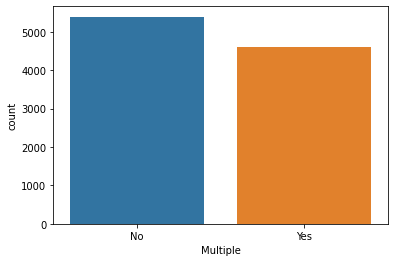

In [270]:
# Univariate plot count
sns.countplot(df2.Multiple)

<AxesSubplot:xlabel='Multiple', ylabel='count'>

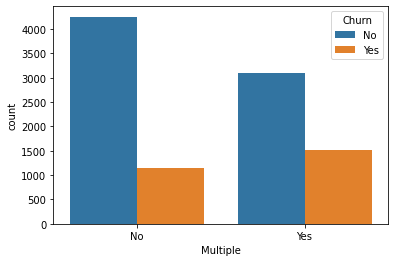

In [271]:
# Bivariate plot
sns.countplot(data=df, x='Multiple', hue='Churn')

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

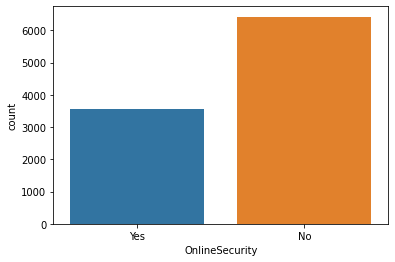

In [272]:
# Univariate plot count
sns.countplot(df2.OnlineSecurity)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

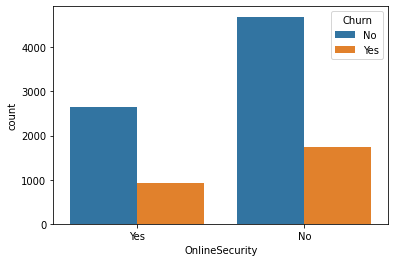

In [273]:
# Bivariate plot
sns.countplot(data=df, x='OnlineSecurity', hue='Churn')

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

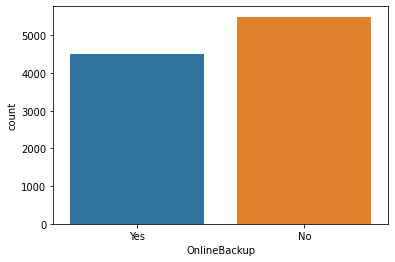

In [274]:
# Univariate plot count
sns.countplot(df2.OnlineBackup)

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

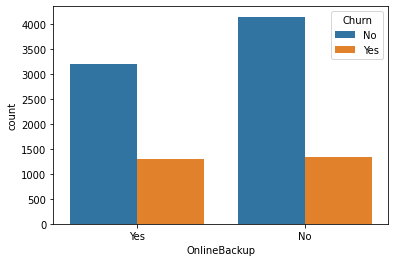

In [275]:
# Bivariate plot
sns.countplot(data=df, x='OnlineBackup', hue='Churn')

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

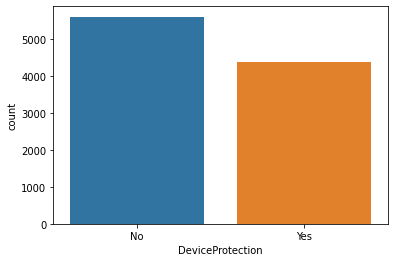

In [276]:
# Univariate plot count
sns.countplot(df2.DeviceProtection)

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

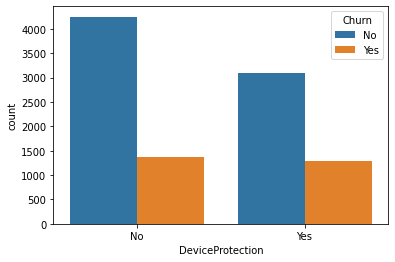

In [277]:
# Bivariate plot
sns.countplot(data=df, x='DeviceProtection', hue='Churn')

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

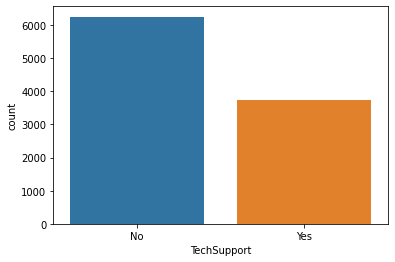

In [278]:
# Univariate plot count
sns.countplot(df2.TechSupport)

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

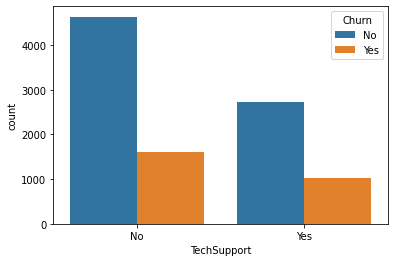

In [279]:
# Bivariate plot
sns.countplot(data=df, x='TechSupport', hue='Churn')

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

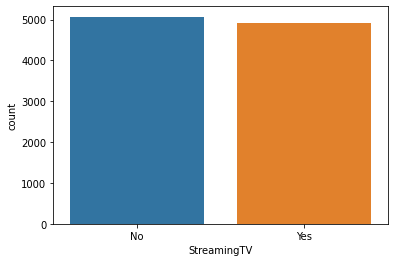

In [280]:
# Univariate plot count
sns.countplot(df2.StreamingTV)

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

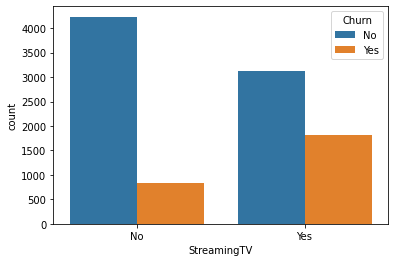

In [281]:
# Bivariate plot
sns.countplot(data=df, x='StreamingTV', hue='Churn')

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

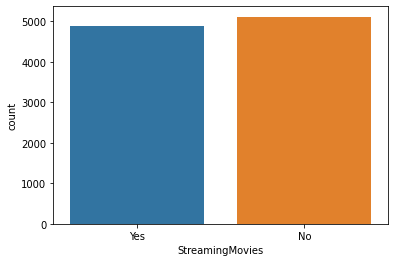

In [282]:
# Univariate plot count
sns.countplot(df2.StreamingMovies)

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

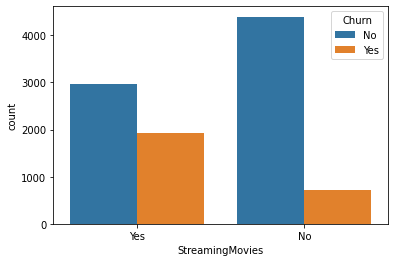

In [283]:
# Bivariate plot
sns.countplot(data=df, x='StreamingMovies', hue='Churn')

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

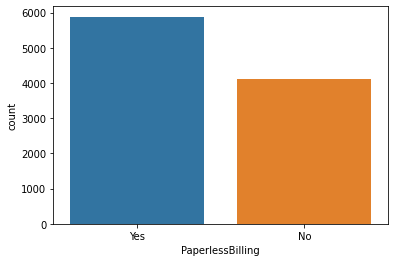

In [284]:
# Univariate plot count
sns.countplot(df2.PaperlessBilling)

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

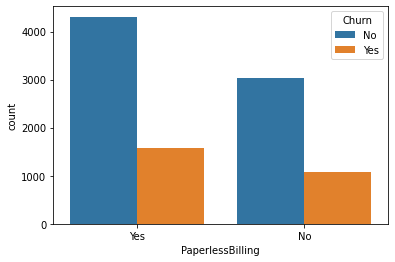

In [285]:
# Bivariate plot
sns.countplot(data=df, x='PaperlessBilling', hue='Churn')

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

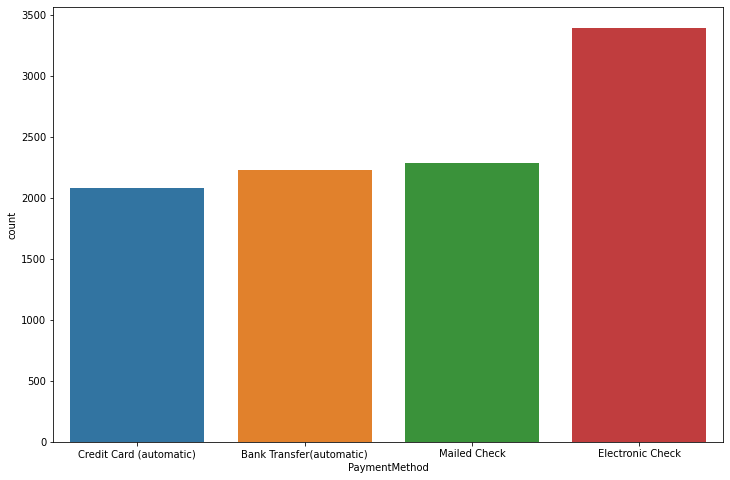

In [286]:
# Univariate plot count
plt.figure(figsize=(12,8))
sns.countplot(df2.PaymentMethod)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

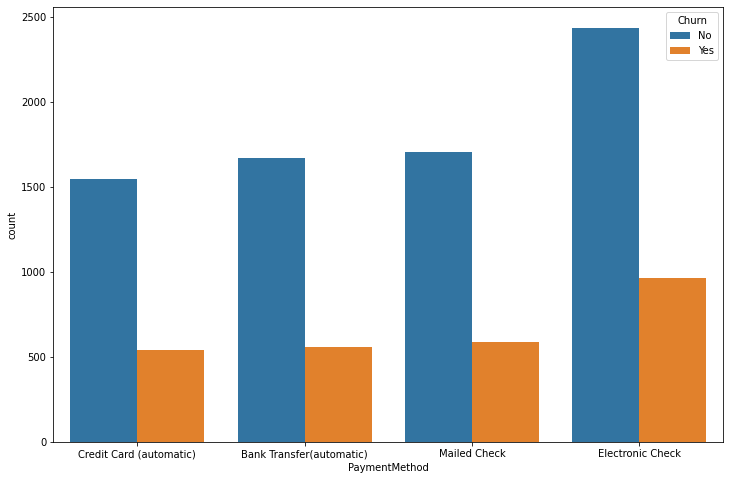

In [287]:
# Bivariate plot
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')

<AxesSubplot:xlabel='Tenure', ylabel='Count'>

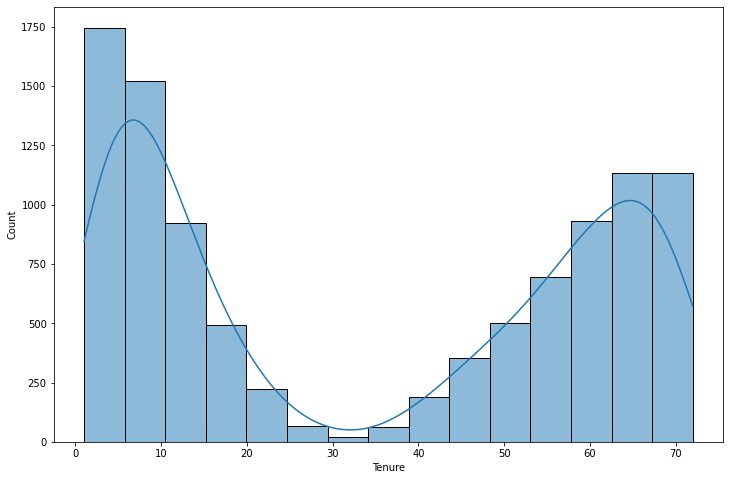

In [288]:
# Univariate plot
plt.figure(figsize=(12,8))
sns.histplot(df2.Tenure,kde=True)

<AxesSubplot:xlabel='Tenure', ylabel='Density'>

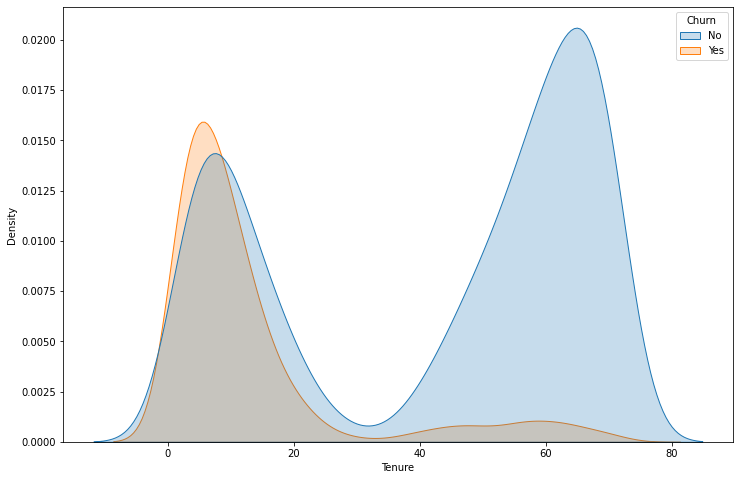

In [289]:
# Bivariate plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df2, x='Tenure', hue='Churn', fill=True)

<AxesSubplot:xlabel='MonthlyCharge', ylabel='Count'>

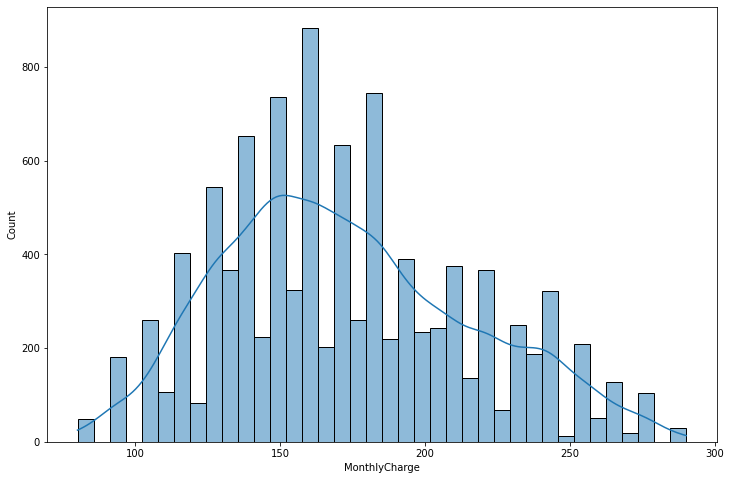

In [290]:
# Univariate plot
plt.figure(figsize=(12,8))
sns.histplot(df2.MonthlyCharge,kde=True)

<AxesSubplot:xlabel='MonthlyCharge', ylabel='Density'>

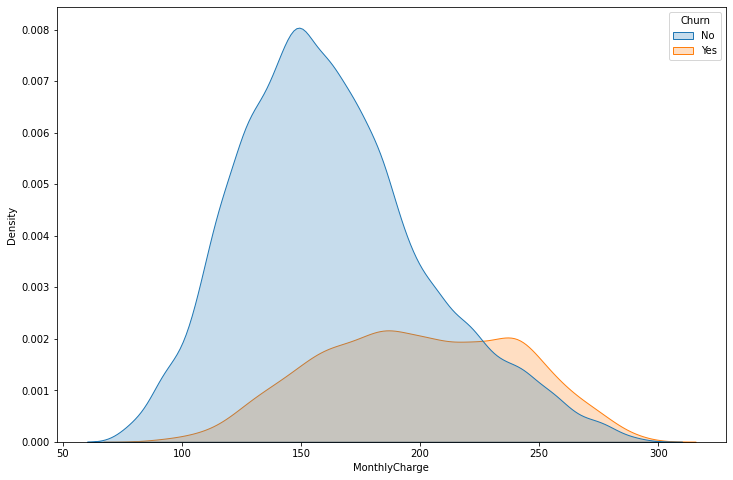

In [291]:
# Bivariate plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df2, x='MonthlyCharge', hue='Churn', fill=True)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Count'>

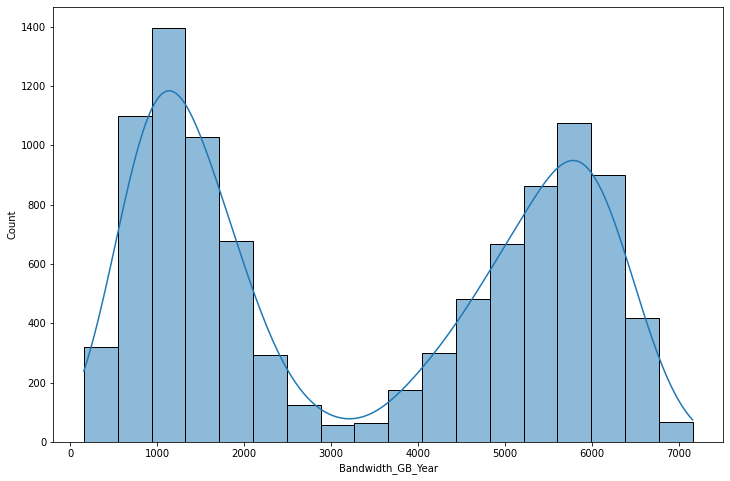

In [292]:
# Univariate plot
plt.figure(figsize=(12,8))
sns.histplot(df2.Bandwidth_GB_Year,kde=True)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Density'>

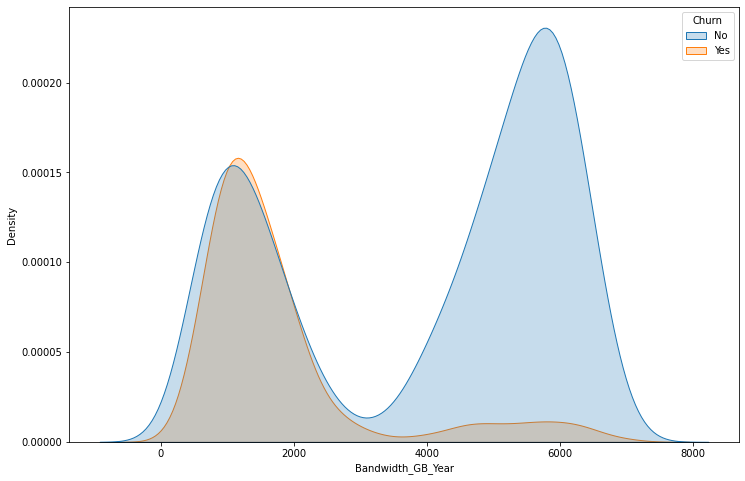

In [293]:
# Bivariate plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df2, x='Bandwidth_GB_Year', hue='Churn', fill=True)

<AxesSubplot:xlabel='Item1', ylabel='Count'>

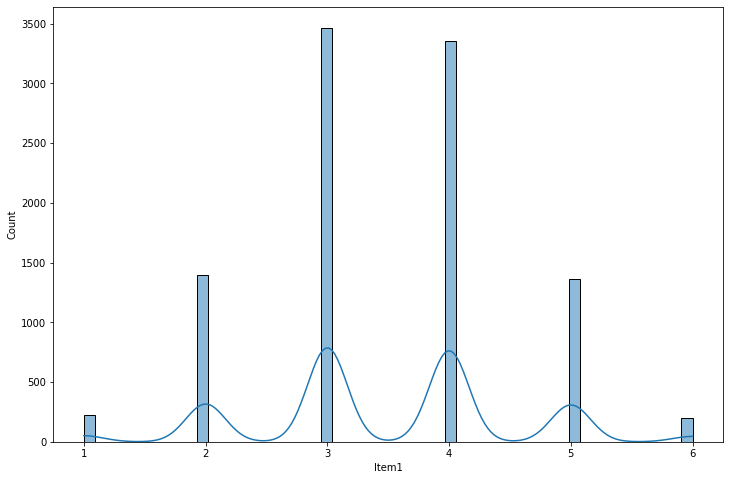

In [294]:
# Univariate plot
plt.figure(figsize=(12,8))
sns.histplot(df2.Item1,kde=True)

<AxesSubplot:xlabel='Item1', ylabel='Density'>

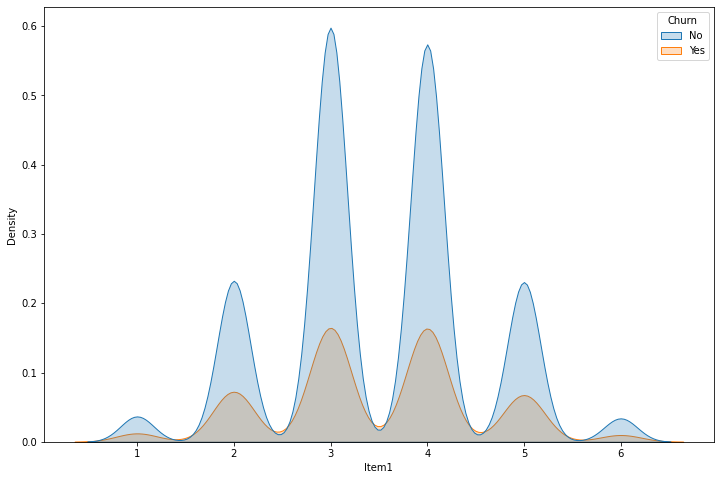

In [295]:
# Bivariate plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df2, x='Item1', hue='Churn', fill=True)

<AxesSubplot:xlabel='Item2', ylabel='Count'>

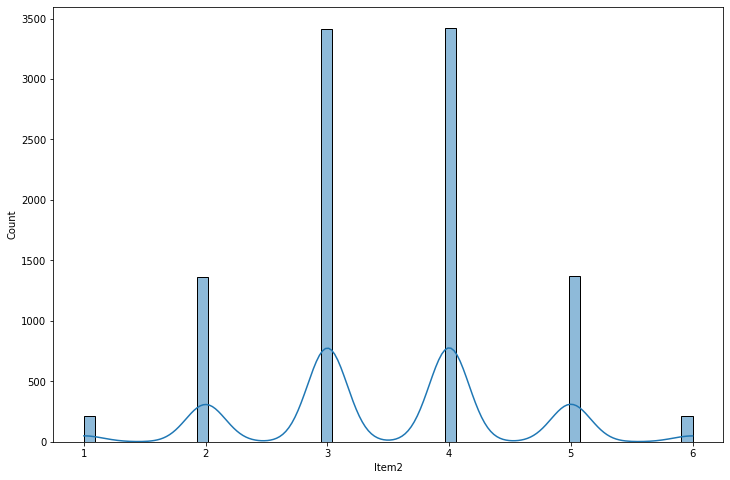

In [296]:
# Univariate plot
plt.figure(figsize=(12,8))
sns.histplot(df2.Item2,kde=True)

<AxesSubplot:xlabel='Item2', ylabel='Density'>

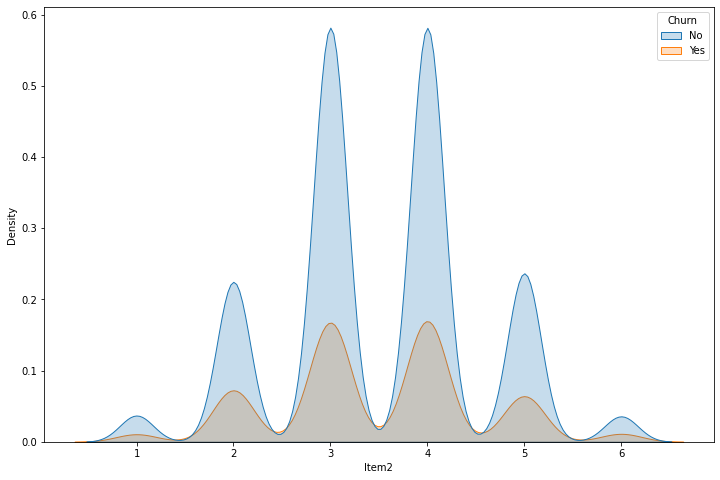

In [297]:
# Bivariate plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df2, x='Item2', hue='Churn', fill=True)

<AxesSubplot:xlabel='Item3', ylabel='Count'>

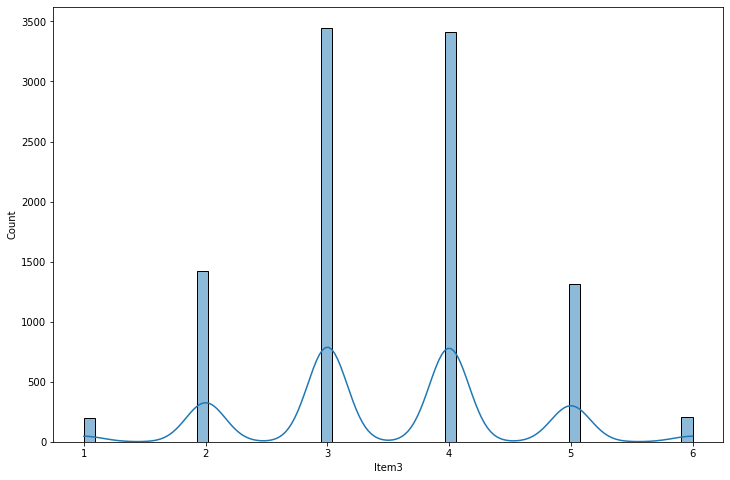

In [298]:
# Univariate plot
plt.figure(figsize=(12,8))
sns.histplot(df2.Item3,kde=True)

<AxesSubplot:xlabel='Item3', ylabel='Density'>

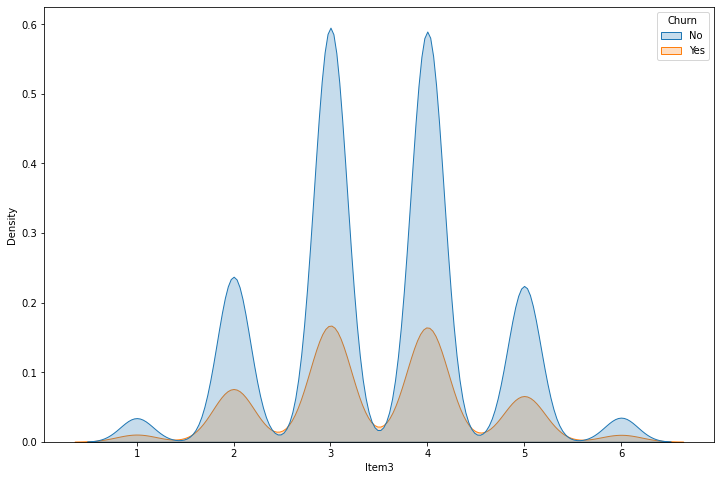

In [299]:
# Bivariate plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df2, x='Item3', hue='Churn', fill=True)

<AxesSubplot:xlabel='Item4', ylabel='Count'>

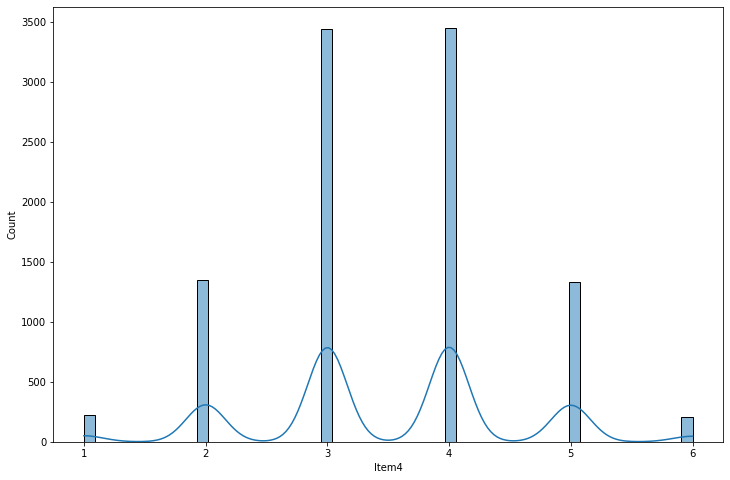

In [300]:
# Univariate plot
plt.figure(figsize=(12,8))
sns.histplot(df2.Item4,kde=True)

<AxesSubplot:xlabel='Item4', ylabel='Density'>

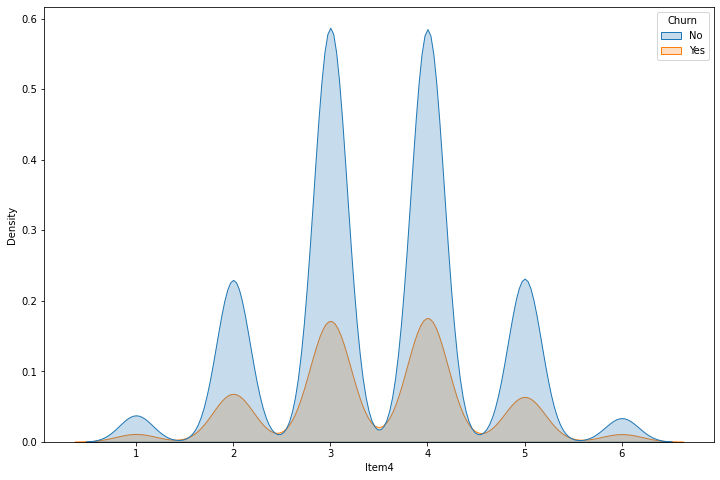

In [301]:
# Bivariate plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df2, x='Item4', hue='Churn', fill=True)

<AxesSubplot:xlabel='Item5', ylabel='Count'>

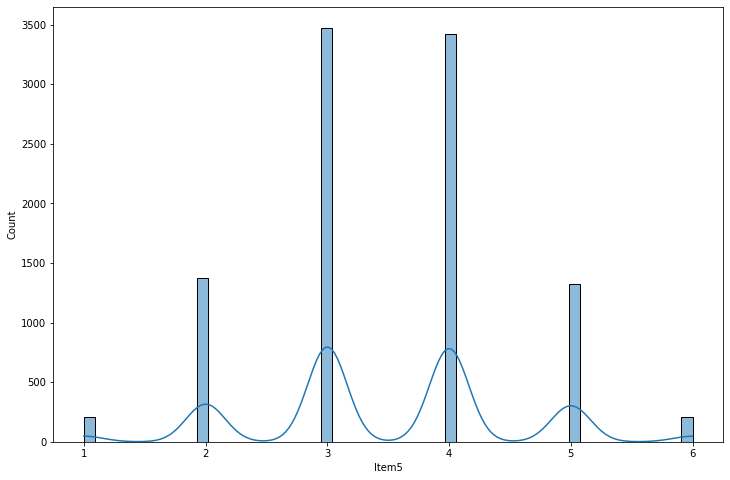

In [302]:
# Univariate plot
plt.figure(figsize=(12,8))
sns.histplot(df2.Item5,kde=True)

<AxesSubplot:xlabel='Item5', ylabel='Density'>

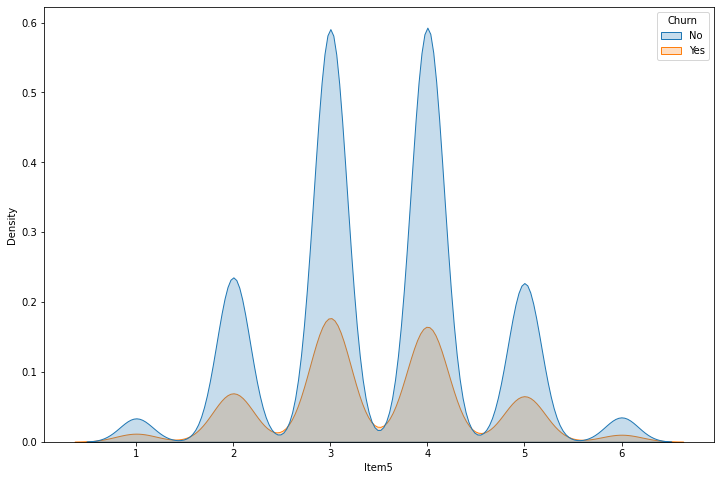

In [303]:
# Bivariate plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df2, x='Item5', hue='Churn', fill=True)

<AxesSubplot:xlabel='Item6', ylabel='Count'>

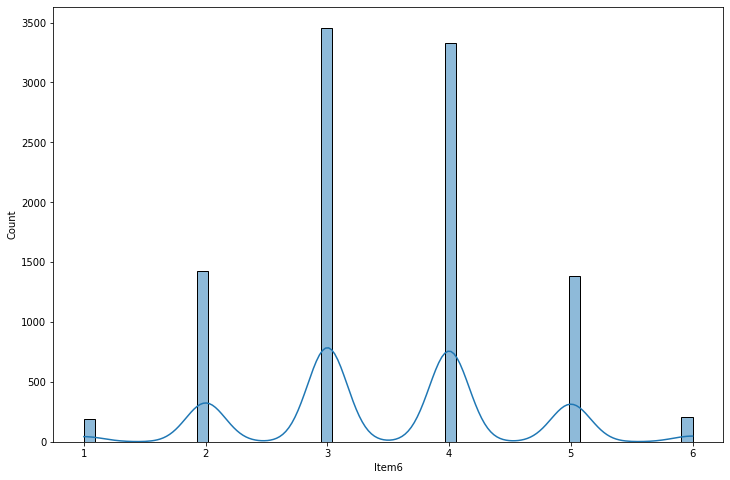

In [304]:
# Univariate plot
plt.figure(figsize=(12,8))
sns.histplot(df2.Item6,kde=True)

<AxesSubplot:xlabel='Item6', ylabel='Density'>

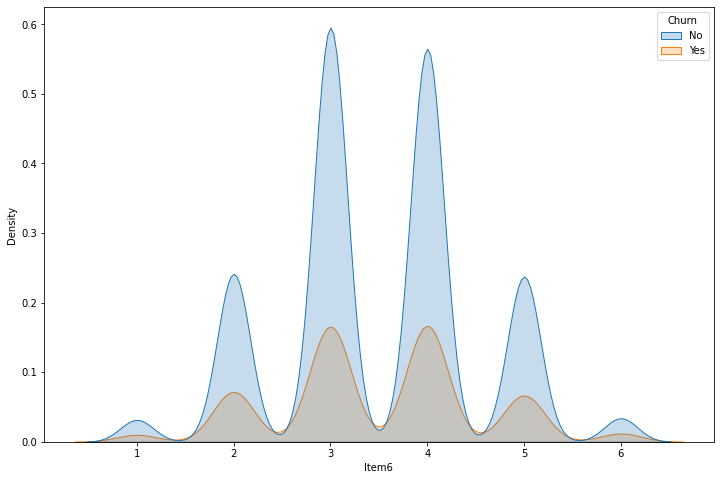

In [305]:
# Bivariate plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df2, x='Item6', hue='Churn', fill=True)

<AxesSubplot:xlabel='Item7', ylabel='Count'>

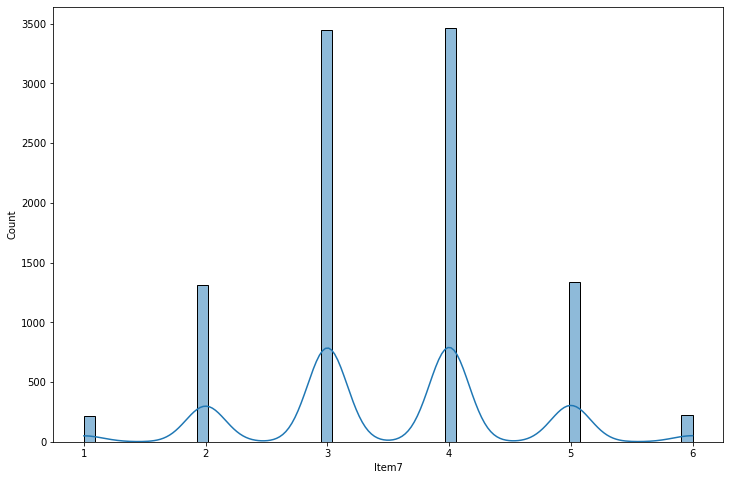

In [306]:
# Univariate plot
plt.figure(figsize=(12,8))
sns.histplot(df2.Item7,kde=True)

<AxesSubplot:xlabel='Item7', ylabel='Density'>

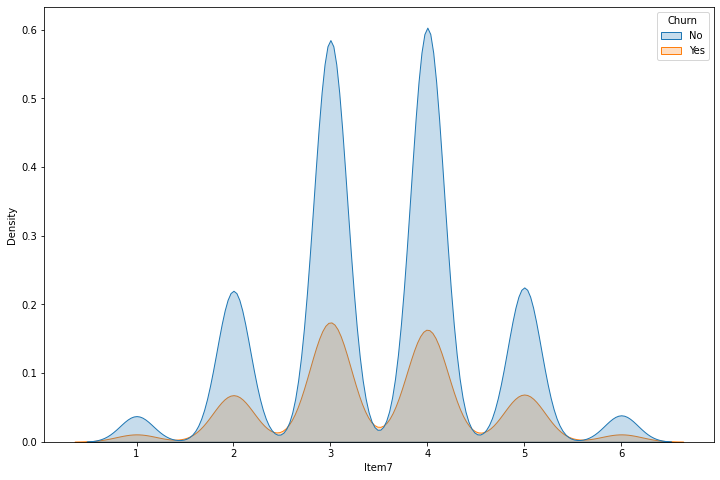

In [307]:
# Bivariate plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df2, x='Item7', hue='Churn', fill=True)

<AxesSubplot:xlabel='Item8', ylabel='Count'>

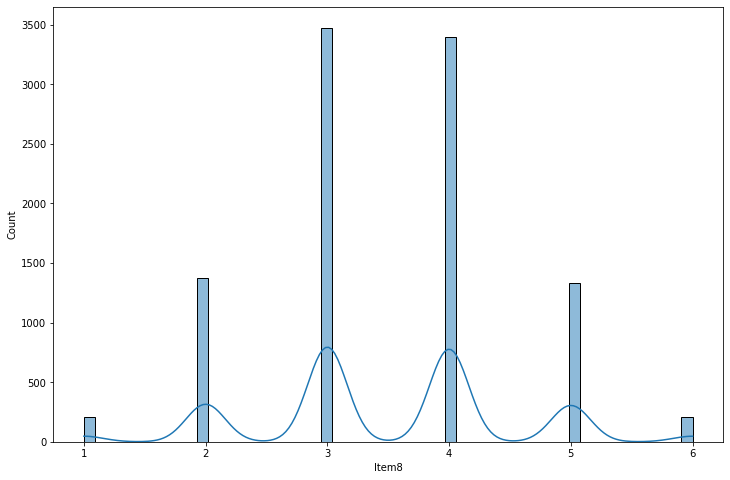

In [308]:
# Univariate plot
plt.figure(figsize=(12,8))
sns.histplot(df2.Item8,kde=True)

<AxesSubplot:xlabel='Item8', ylabel='Density'>

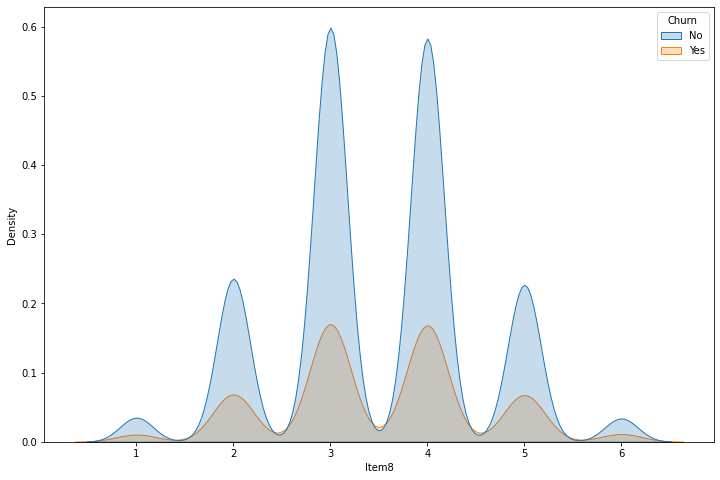

In [309]:
# Bivariate plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df2, x='Item8', hue='Churn', fill=True)

In [310]:
df2.shape

(10000, 38)

In [311]:
# Ordinal encoding all variables with Yes,No
df2['Churn'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['Techie'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['Port_modem'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['Tablet'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['Phone'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['Multiple'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['OnlineSecurity'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['OnlineBackup'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['DeviceProtection'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['TechSupport'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['StreamingTV'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['StreamingMovies'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['PaperlessBilling'].replace(['No', 'Yes'], [0,1], inplace=True)

In [312]:
# get_dummies encoding with K-1
x1 = ['Area', 'Marital', 'Gender', 'Contract', 
      'InternetService', 'PaymentMethod']
df2 = pd.get_dummies(df2, prefix=x1, prefix_sep='_', dummy_na=False,
                    columns=x1, drop_first=True)

In [313]:
# Check shape of df2...47 variables after encoding with get_dummies
print(df2.shape)

(10000, 47)


In [314]:
# Showing K-1 worked--and all variables are numerical
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Population                             10000 non-null  float64
 1   Children                               10000 non-null  float64
 2   Age                                    10000 non-null  int64  
 3   Income                                 10000 non-null  float64
 4   Churn                                  10000 non-null  int64  
 5   Outage_sec_perweek                     10000 non-null  float64
 6   Email                                  10000 non-null  float64
 7   Contacts                               10000 non-null  float64
 8   Yearly_equip_failure                   10000 non-null  float64
 9   Techie                                 10000 non-null  int64  
 10  Port_modem                             10000 non-null  int64  
 11  Tab

In [315]:
# Make new clean_df
clean_df = df2[['Churn', 'Population', 'Children', 'Age', 'Income', 
                   'Outage_sec_perweek', 'Email', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 
                   'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 
                   'Item6', 'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [316]:
# check shape of clean_df
clean_df.shape

(10000, 47)

In [317]:
# Extracting csv file of clean dataset
clean_df.to_csv(r'C:\\Users\\eric7\\OneDrive\\Desktop\\WGU\\D208_Predictive_Modeling\\Eric_Colwell_clean_dataset_task2.csv')

In [318]:
# Looking for high correlation to Tenure
matrix = clean_df.corr()
print(matrix)

                                          Churn  Population  Children  \
Churn                                  1.000000   -0.000200  0.001654   
Population                            -0.000200    1.000000  0.004705   
Children                               0.001654    0.004705  1.000000   
Age                                    0.005630    0.012163 -0.022063   
Income                                -0.001954   -0.011508  0.006587   
Outage_sec_perweek                     0.000145    0.008814  0.015968   
Email                                  0.012608    0.013048  0.001991   
Contacts                               0.009119    0.015006 -0.029564   
Yearly_equip_failure                  -0.009527   -0.001869  0.013457   
Techie                                 0.066722   -0.010896 -0.008676   
Port_modem                             0.008157    0.014744  0.010046   
Tablet                                -0.002779   -0.009092 -0.002514   
Phone                                 -0.026297    

<AxesSubplot:>

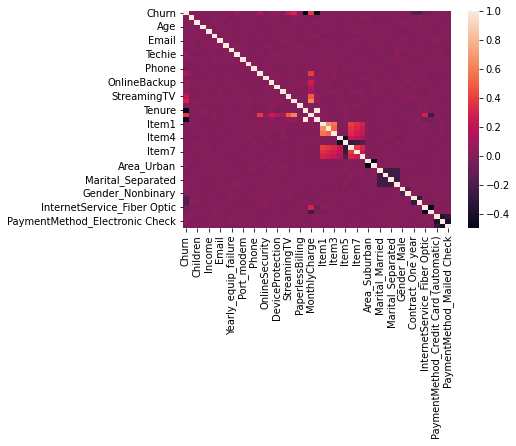

In [319]:
sns.heatmap(clean_df.corr())

In [320]:
# Initial model
# Make df for Feature reduction without Churn
X = clean_df[['Population', 'Children', 'Age', 'Income', 
                   'Outage_sec_perweek', 'Email', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 
                   'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 
                   'Item6', 'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [321]:
# Set the target variable to Churn
y = clean_df['Churn']

In [322]:
# Check the shape of the independent variables
X.shape

(10000, 46)

In [323]:
regr = LogisticRegression()

In [324]:
# Fit the model
regr.fit(X, y)

LogisticRegression()

In [325]:
# Run the initial model
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
#model = # Make the model
model = sm.Logit(y, X)
result = model.fit()
predictions = result.predict(X)
print_model = result.summary2()
print_model

Y-Intercept: 
 [-0.01213455]
X-Coefficients: 
 [[-2.78721431e-06 -1.77707109e-02 -1.29616806e-03 -3.49190363e-06
  -1.21029550e-01 -1.40609629e-01 -8.44019993e-03 -5.30376771e-03
   3.13038715e-03 -4.17050878e-03 -4.14268927e-03 -1.26566466e-02
   1.33084639e-03 -6.35276061e-03 -2.82645800e-03 -2.77578405e-03
  -5.12578503e-03  1.37665099e-02  1.74107433e-02 -6.40195692e-03
  -1.23561677e-01  2.70586933e-02  6.31521057e-04 -4.60085040e-02
  -4.46565962e-02 -4.45583965e-02 -4.34123988e-02 -4.27110819e-02
  -4.34853203e-02 -4.43241015e-02 -4.25849720e-02 -4.95561929e-03
  -3.02133273e-03 -2.73399033e-03 -3.84683560e-03 -1.25145606e-03
  -1.42178139e-03 -2.08701897e-03 -8.53305893e-04 -1.75662878e-02
  -2.11520257e-02 -2.39747181e-02 -3.58980857e-03 -3.10963765e-03
  -6.44791190e-04 -3.38719162e-03]]
Optimization terminated successfully.
         Current function value: 0.217119
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
======================================================================================
Model:                      Logit                   Pseudo R-squared:        0.625    
Dependent Variable:         Churn                   AIC:                     4436.3859
Date:                       2022-09-11 12:26        BIC:                     4775.2719
No. Observations:           10000                   Log-Likelihood:          -2171.2  
Df Model:                   46                      LL-Null:                 -5782.2  
Df Residuals:               9953                    LLR p-value:             0.0000   
Converged:                  1.0000                  Scale:                   1.0000   
No. Iterations:             9.0000                                                    
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------
const                                 -5.0205   0.6864  -7.3144 0.0000 -6.3658 -3.6752
Population                             0.0000   0.0000   0.3875 0.6984 -0.0000  0.0000
Children                               0.0228   0.0371   0.6160 0.5379 -0.0499  0.0956
Age                                    0.0004   0.0040   0.1010 0.9195 -0.0074  0.0082
Income                                -0.0000   0.0000  -0.2194 0.8264 -0.0000  0.0000
Outage_sec_perweek                    -0.0053   0.0133  -0.3973 0.6912 -0.0314  0.0208
Email                                 -0.0090   0.0129  -0.7014 0.4831 -0.0343  0.0162
Contacts                               0.0756   0.0434   1.7391 0.0820 -0.0096  0.1607
Yearly_equip_failure                  -0.0209   0.0667  -0.3126 0.7546 -0.1517  0.1099
Techie                                 1.0997   0.1028  10.6950 0.0000  0.8982  1.3013
Port_modem                             0.1400   0.0774   1.8089 0.0705 -0.0117  0.2917
Tablet                                -0.0537   0.0846  -0.6350 0.5255 -0.2195  0.1121
Phone                                 -0.2947   0.1329  -2.2179 0.0266 -0.5551 -0.0343
Multiple                               0.3345   0.1755   1.9061 0.0566 -0.0094  0.6784
OnlineSecurity                        -0.2479   0.1084  -2.2861 0.0222 -0.4605 -0.0354
OnlineBackup                          -0.1027   0.1330  -0.7726 0.4397 -0.3634  0.1579
DeviceProtection                      -0.0750   0.1086  -0.6908 0.4897 -0.2880  0.1379
TechSupport                           -0.2374   0.1062  -2.2350 0.0254 -0.4455 -0.0292
StreamingTV                            1.1862   0.2455   4.8311 0.0000  0.7050  1.6674
StreamingMovies                        1.3065   0.2700   4.8390 0.0000  0.7773  1.8356
PaperlessBilling                       0.1682   0.0787   2.1379 0.0325  0.0140  0.3225
Tenure                                -0.1111   0.0856  -1.2967 0.1947 -0.2789  0.0568
MonthlyCharge                          0.0416   0.0057   7.2352 0.0000  0.0303  0.0529
Bandwidth_GB_Year                     -0.0001   0.0010  -0.0652 0.9480 -0.0021  0.0020
Item1                                 -0.0328   0.0542  -0.6050 0.5452 -0.1391  0.0735
Item2                                 -0.0110   0.0519  -0.2116 0.8324 -0.1128  0.0908
Item3                                  0.0324   0.0470   0.6876 0.4917 -0.0599  0.1246
Item4                                 -0.0148   0.0422  -0.3515 0.7252 -0.0975  0.0678
Item5                                 -0.0119   0.0445  -0.2667 0.7897 -0.0991  0.0754
Item6                                 -0.0154   0.0453  -0.3399 0.7339 -0.1043  0.0734
Item7                                  0.0057   0.0432   0.1312 0.8956 -0.0790  0.0903
Item8                                 -0.0089   0.0406  -0.2192 0.8265 -0.0886  0.0707
Area_Suburban                         -0.0446   0.0956  -0.4666 0.6408 -

In [326]:
X.shape

(10000, 47)

In [327]:
# Looking for high correlation to Churn
matrix = clean_df.corr()
print(matrix)

                                          Churn  Population  Children  \
Churn                                  1.000000   -0.000200  0.001654   
Population                            -0.000200    1.000000  0.004705   
Children                               0.001654    0.004705  1.000000   
Age                                    0.005630    0.012163 -0.022063   
Income                                -0.001954   -0.011508  0.006587   
Outage_sec_perweek                     0.000145    0.008814  0.015968   
Email                                  0.012608    0.013048  0.001991   
Contacts                               0.009119    0.015006 -0.029564   
Yearly_equip_failure                  -0.009527   -0.001869  0.013457   
Techie                                 0.066722   -0.010896 -0.008676   
Port_modem                             0.008157    0.014744  0.010046   
Tablet                                -0.002779   -0.009092 -0.002514   
Phone                                 -0.026297    

In [328]:
X.shape

(10000, 47)

In [329]:
# Checking for correlations above 0.75
matrix = clean_df.corr()
matrix = matrix.unstack()
matrix = matrix[abs(matrix) >= 0.75]
print(matrix)

Churn                                  Churn                                    1.000000
Population                             Population                               1.000000
Children                               Children                                 1.000000
Age                                    Age                                      1.000000
Income                                 Income                                   1.000000
Outage_sec_perweek                     Outage_sec_perweek                       1.000000
Email                                  Email                                    1.000000
Contacts                               Contacts                                 1.000000
Yearly_equip_failure                   Yearly_equip_failure                     1.000000
Techie                                 Techie                                   1.000000
Port_modem                             Port_modem                               1.000000
Tablet               

In [330]:
X.shape

(10000, 47)

In [331]:
# Removing Tenure due to high correlation
X = clean_df[['Population', 'Children', 'Age', 'Income', 
                   'Outage_sec_perweek', 'Email', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'MonthlyCharge', 'Bandwidth_GB_Year', 
                   'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 
                   'Item6', 'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [332]:
X.shape

(10000, 45)

In [333]:
# Checking for correlations above 0.75
matrix = X.corr()
matrix = matrix.unstack()
matrix = matrix[abs(matrix) >= 0.75]
print(matrix)

Population                             Population                               1.0
Children                               Children                                 1.0
Age                                    Age                                      1.0
Income                                 Income                                   1.0
Outage_sec_perweek                     Outage_sec_perweek                       1.0
Email                                  Email                                    1.0
Contacts                               Contacts                                 1.0
Yearly_equip_failure                   Yearly_equip_failure                     1.0
Techie                                 Techie                                   1.0
Port_modem                             Port_modem                               1.0
Tablet                                 Tablet                                   1.0
Phone                                  Phone                                

In [334]:
# Re-fit the model
regr.fit(X, y)

LogisticRegression()

In [335]:
# Re-run the model
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit()
predictions = result.predict(X)
print_model = result.summary2()
print_model

Y-Intercept: 
 [-0.01022321]
X-Coefficients: 
 [[-3.48892559e-06 -1.38506129e-02 -1.06467145e-02 -3.19608490e-06
  -9.63247062e-02 -1.11384298e-01 -6.88859845e-03 -4.51427534e-03
   3.02032312e-03 -3.37019579e-03 -3.50660996e-03 -1.07614601e-02
   9.86034530e-04 -5.49992776e-03 -2.61517339e-03 -2.37182157e-03
  -4.54815450e-03  1.22484832e-02  1.53563418e-02 -5.36069670e-03
   2.94708409e-02 -8.15814608e-04 -3.82259582e-02 -3.70391828e-02
  -3.69718136e-02 -3.64034239e-02 -3.60867567e-02 -3.60328355e-02
  -3.68952216e-02 -3.53385815e-02 -4.25287336e-03 -2.47092004e-03
  -2.28146167e-03 -3.37368993e-03 -9.82978633e-04 -1.12664066e-03
  -1.39263856e-03 -7.60041349e-04 -1.58751253e-02 -1.91046250e-02
  -2.22500917e-02 -2.85373539e-03 -2.66910316e-03 -2.19295542e-04
  -2.92855772e-03]]
Optimization terminated successfully.
         Current function value: 0.217203
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
======================================================================================
Model:                      Logit                   Pseudo R-squared:        0.624    
Dependent Variable:         Churn                   AIC:                     4436.0509
Date:                       2022-09-11 12:26        BIC:                     4767.7265
No. Observations:           10000                   Log-Likelihood:          -2172.0  
Df Model:                   45                      LL-Null:                 -5782.2  
Df Residuals:               9954                    LLR p-value:             0.0000   
Converged:                  1.0000                  Scale:                   1.0000   
No. Iterations:             9.0000                                                    
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------
const                                 -4.6008   0.6044  -7.6123 0.0000 -5.7853 -3.4162
Population                             0.0000   0.0000   0.3571 0.7210 -0.0000  0.0000
Children                               0.0626   0.0209   2.9929 0.0028  0.0216  0.1036
Age                                   -0.0041   0.0019  -2.1550 0.0312 -0.0078 -0.0004
Income                                -0.0000   0.0000  -0.2090 0.8344 -0.0000  0.0000
Outage_sec_perweek                    -0.0054   0.0133  -0.4027 0.6871 -0.0315  0.0207
Email                                 -0.0091   0.0129  -0.7060 0.4802 -0.0344  0.0162
Contacts                               0.0763   0.0434   1.7577 0.0788 -0.0088  0.1615
Yearly_equip_failure                  -0.0209   0.0667  -0.3134 0.7540 -0.1517  0.1099
Techie                                 1.0946   0.1027  10.6565 0.0000  0.8933  1.2959
Port_modem                             0.1411   0.0774   1.8232 0.0683 -0.0106  0.2927
Tablet                                -0.0526   0.0846  -0.6219 0.5340 -0.2183  0.1131
Phone                                 -0.2921   0.1328  -2.1993 0.0279 -0.5525 -0.0318
Multiple                               0.2933   0.1725   1.7000 0.0891 -0.0449  0.6314
OnlineSecurity                        -0.1549   0.0813  -1.9044 0.0569 -0.3143  0.0045
OnlineBackup                          -0.0695   0.1304  -0.5331 0.5940 -0.3252  0.1861
DeviceProtection                      -0.0136   0.0977  -0.1394 0.8892 -0.2052  0.1779
TechSupport                           -0.2837   0.1000  -2.8362 0.0046 -0.4798 -0.0876
StreamingTV                            1.3219   0.2223   5.9478 0.0000  0.8863  1.7576
StreamingMovies                        1.3737   0.2650   5.1838 0.0000  0.8543  1.8931
PaperlessBilling                       0.1671   0.0787   2.1240 0.0337  0.0129  0.3213
MonthlyCharge                          0.0457   0.0048   9.5157 0.0000  0.0363  0.0551
Bandwidth_GB_Year                     -0.0014   0.0000 -38.8479 0.0000 -0.0015 -0.0014
Item1                                 -0.0321   0.0542  -0.5928 0.5533 -0.1384  0.0741
Item2                                 -0.0127   0.0519  -0.2445 0.8068 -0.1144  0.0890
Item3                                  0.0313   0.0470   0.6643 0.5065 -0.0610  0.1235
Item4                                 -0.0141   0.0422  -0.3342 0.7382 -0.0968  0.0686
Item5                                 -0.0103   0.0445  -0.2306 0.8176 -0.0974  0.0769
Item6                                 -0.0151   0.0453  -0.3325 0.7395 -0.1039  0.0738
Item7                                  0.0055   0.0432   0.1275 0.8985 -0.0791  0.0901
Item8                                 -0.0083   0.0406  -0.2037 0.8386 -0.0879  0.0714
Area_Suburban                         -0.0402   0.0955  -0.4209 0.6738 -0.2275  0.1470
Area_Urban                             0.0608   0.0944   0.6439 0.5196 -

In [336]:
# Removing Tenure due to high correlation
X = clean_df[['Population', 'Children', 'Age', 'Income', 
                   'Outage_sec_perweek', 'Email', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'MonthlyCharge', 'Bandwidth_GB_Year', 
                   'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 
                   'Item6', 'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [337]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                                  Feature         VIF
0                              Population    1.519472
1                                Children    2.044154
2                                     Age    7.420379
3                                  Income    3.350359
4                      Outage_sec_perweek   12.021588
5                                   Email   15.930744
6                                Contacts    2.113971
7                    Yearly_equip_failure    1.408257
8                                  Techie    1.205729
9                              Port_modem    1.932827
10                                 Tablet    1.432238
11                                  Phone   10.292147
12                               Multiple    6.081247
13                         OnlineSecurity    1.594991
14                           OnlineBackup    3.818774
15                       DeviceProtection    2.419655
16                            TechSupport    2.138066
17                          

In [338]:
# Removing MonthlyCharge due to high VIF > 10
X = clean_df[['Population', 'Children', 'Age', 'Income', 
                   'Outage_sec_perweek', 'Email', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 
                   'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 
                   'Item6', 'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [339]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                                  Feature        VIF
0                              Population   1.517111
1                                Children   2.038629
2                                     Age   7.284664
3                                  Income   3.322210
4                      Outage_sec_perweek  11.635048
5                                   Email  15.239504
6                                Contacts   2.110556
7                    Yearly_equip_failure   1.407116
8                                  Techie   1.203568
9                              Port_modem   1.930974
10                                 Tablet   1.431472
11                                  Phone  10.072840
12                               Multiple   1.848595
13                         OnlineSecurity   1.557567
14                           OnlineBackup   1.820939
15                       DeviceProtection   1.783072
16                            TechSupport   1.602923
17                            StreamingTV   1.

In [340]:
# Removing Item1 due to high VIF > 10
X = clean_df[['Population', 'Children', 'Age', 'Income', 
                   'Outage_sec_perweek', 'Email', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 
                   'Item2', 'Item3', 'Item4', 'Item5', 
                   'Item6', 'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [341]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                                  Feature        VIF
0                              Population   1.517012
1                                Children   2.038556
2                                     Age   7.283073
3                                  Income   3.321552
4                      Outage_sec_perweek  11.630609
5                                   Email  15.239206
6                                Contacts   2.110518
7                    Yearly_equip_failure   1.406161
8                                  Techie   1.203565
9                              Port_modem   1.930940
10                                 Tablet   1.431066
11                                  Phone  10.070214
12                               Multiple   1.847427
13                         OnlineSecurity   1.557566
14                           OnlineBackup   1.820770
15                       DeviceProtection   1.783036
16                            TechSupport   1.602542
17                            StreamingTV   1.

In [342]:
# Removing Item2 due to high VIF > 10
X = clean_df[['Population', 'Children', 'Age', 'Income', 
                   'Outage_sec_perweek', 'Email', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 
                   'Item3', 'Item4', 'Item5', 
                   'Item6', 'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [343]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                                  Feature        VIF
0                              Population   1.516869
1                                Children   2.037466
2                                     Age   7.281570
3                                  Income   3.320857
4                      Outage_sec_perweek  11.628758
5                                   Email  15.238866
6                                Contacts   2.109968
7                    Yearly_equip_failure   1.406119
8                                  Techie   1.203487
9                              Port_modem   1.930781
10                                 Tablet   1.430405
11                                  Phone  10.054078
12                               Multiple   1.846929
13                         OnlineSecurity   1.557529
14                           OnlineBackup   1.820318
15                       DeviceProtection   1.782633
16                            TechSupport   1.602459
17                            StreamingTV   1.

In [344]:
# Removing Item6 due to high VIF > 10
X = clean_df[['Population', 'Children', 'Age', 'Income', 
                   'Outage_sec_perweek', 'Email', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Item3', 'Item4', 'Item5', 
                   'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [345]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                                  Feature        VIF
0                              Population   1.516344
1                                Children   2.037142
2                                     Age   7.270805
3                                  Income   3.319915
4                      Outage_sec_perweek  11.604204
5                                   Email  15.172338
6                                Contacts   2.109013
7                    Yearly_equip_failure   1.405903
8                                  Techie   1.203396
9                              Port_modem   1.930599
10                                 Tablet   1.430401
11                                  Phone  10.038833
12                               Multiple   1.846926
13                         OnlineSecurity   1.557357
14                           OnlineBackup   1.820164
15                       DeviceProtection   1.781976
16                            TechSupport   1.602436
17                            StreamingTV   1.

In [346]:
# Removing Email due to high VIF > 10
X = clean_df[['Population', 'Children', 'Age', 'Income', 
                   'Outage_sec_perweek', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Item3', 'Item4', 'Item5', 
                   'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [347]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                                  Feature        VIF
0                              Population   1.514432
1                                Children   2.034573
2                                     Age   7.224920
3                                  Income   3.313333
4                      Outage_sec_perweek  11.469087
5                                Contacts   2.106296
6                    Yearly_equip_failure   1.405768
7                                  Techie   1.203396
8                              Port_modem   1.927925
9                                  Tablet   1.430276
10                                  Phone   9.963180
11                               Multiple   1.845542
12                         OnlineSecurity   1.557339
13                           OnlineBackup   1.819865
14                       DeviceProtection   1.780761
15                            TechSupport   1.599354
16                            StreamingTV   1.969075
17                        StreamingMovies   1.

In [348]:
# Removing Item7 due to high VIF > 10
X = clean_df[['Population', 'Children', 'Age', 'Income', 
                   'Outage_sec_perweek', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Item3', 'Item4', 'Item5', 
                   'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [349]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                                  Feature        VIF
0                              Population   1.514382
1                                Children   2.033682
2                                     Age   7.201440
3                                  Income   3.302751
4                      Outage_sec_perweek  11.426739
5                                Contacts   2.103509
6                    Yearly_equip_failure   1.405757
7                                  Techie   1.203105
8                              Port_modem   1.927208
9                                  Tablet   1.430058
10                                  Phone   9.900772
11                               Multiple   1.843429
12                         OnlineSecurity   1.557294
13                           OnlineBackup   1.818437
14                       DeviceProtection   1.780760
15                            TechSupport   1.598024
16                            StreamingTV   1.969017
17                        StreamingMovies   1.

In [350]:
# Removing Item8 due to high VIF > 10
X = clean_df[['Population', 'Children', 'Age', 'Income', 
                   'Outage_sec_perweek', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Item3', 'Item4', 'Item5', 
                   'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [351]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                                  Feature        VIF
0                              Population   1.512856
1                                Children   2.032886
2                                     Age   7.155357
3                                  Income   3.296745
4                      Outage_sec_perweek  11.293996
5                                Contacts   2.102918
6                    Yearly_equip_failure   1.405648
7                                  Techie   1.202998
8                              Port_modem   1.926143
9                                  Tablet   1.429146
10                                  Phone   9.825949
11                               Multiple   1.843020
12                         OnlineSecurity   1.556232
13                           OnlineBackup   1.817640
14                       DeviceProtection   1.778799
15                            TechSupport   1.597277
16                            StreamingTV   1.966325
17                        StreamingMovies   1.

In [352]:
# Removing Item5 due to high VIF > 10
X = clean_df[['Population', 'Children', 'Age', 'Income', 
                   'Outage_sec_perweek', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Item3', 'Item4', 
                   'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [353]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                                  Feature        VIF
0                              Population   1.511094
1                                Children   2.026485
2                                     Age   6.996622
3                                  Income   3.265649
4                      Outage_sec_perweek  10.853700
5                                Contacts   2.093393
6                    Yearly_equip_failure   1.403710
7                                  Techie   1.201924
8                              Port_modem   1.920519
9                                  Tablet   1.429013
10                                  Phone   9.432734
11                               Multiple   1.839326
12                         OnlineSecurity   1.554766
13                           OnlineBackup   1.811450
14                       DeviceProtection   1.774778
15                            TechSupport   1.595151
16                            StreamingTV   1.962344
17                        StreamingMovies   1.

In [354]:
# Removing Outage_sec_perweek due to high VIF > 10
X = clean_df[['Population', 'Children', 'Age', 'Income', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Item3', 'Item4', 
                   'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [355]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                                  Feature        VIF
0                              Population   1.508321
1                                Children   2.017962
2                                     Age   6.911134
3                                  Income   3.251439
4                                Contacts   2.084781
5                    Yearly_equip_failure   1.401612
6                                  Techie   1.201528
7                              Port_modem   1.916074
8                                  Tablet   1.427975
9                                   Phone   9.240260
10                               Multiple   1.833798
11                         OnlineSecurity   1.553700
12                           OnlineBackup   1.809228
13                       DeviceProtection   1.768252
14                            TechSupport   1.594489
15                            StreamingTV   1.956560
16                        StreamingMovies   1.946210
17                       PaperlessBilling   2.

In [356]:
# Removing Item3 due to high VIF > 10
X = clean_df[['Population', 'Children', 'Age', 'Income', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Item4', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [357]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                                  Feature        VIF
0                              Population   1.506283
1                                Children   2.011849
2                                     Age   6.779355
3                                  Income   3.224617
4                                Contacts   2.080688
5                    Yearly_equip_failure   1.400415
6                                  Techie   1.199799
7                              Port_modem   1.912404
8                                  Tablet   1.426451
9                                   Phone   8.924153
10                               Multiple   1.826647
11                         OnlineSecurity   1.551343
12                           OnlineBackup   1.806935
13                       DeviceProtection   1.765577
14                            TechSupport   1.588781
15                            StreamingTV   1.954153
16                        StreamingMovies   1.943019
17                       PaperlessBilling   2.

In [358]:
# Removing Item4 due to high VIF > 10
X = clean_df[['Population', 'Children', 'Age', 'Income', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [359]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                                  Feature       VIF
0                              Population  1.504547
1                                Children  2.005593
2                                     Age  6.517638
3                                  Income  3.197900
4                                Contacts  2.070341
5                    Yearly_equip_failure  1.398084
6                                  Techie  1.198610
7                              Port_modem  1.902423
8                                  Tablet  1.424861
9                                   Phone  8.487552
10                               Multiple  1.820585
11                         OnlineSecurity  1.547273
12                           OnlineBackup  1.803521
13                       DeviceProtection  1.760899
14                            TechSupport  1.580623
15                            StreamingTV  1.942983
16                        StreamingMovies  1.936402
17                       PaperlessBilling  2.370346
18          

In [360]:
# Re-fit the model
regr.fit(X, y)

LogisticRegression()

In [361]:
# Re-run the model
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
#model = # Make the model
model = sm.Logit(y, X)
result = model.fit()
predictions = result.predict(X)
print_model = result.summary2()
print_model

Y-Intercept: 
 [0.00011292]
X-Coefficients: 
 [[ 1.09857247e-06  2.70656058e-04  6.00884852e-03  2.72082988e-06
   1.30629147e-04  3.01061687e-05  8.70666528e-05  7.26488872e-05
   2.94332490e-05  7.89938980e-05  2.53822227e-04  3.20904569e-05
   1.50556442e-04  1.28665183e-04  6.99240125e-05  4.31592636e-04
   5.13199654e-04  7.67452816e-05 -5.38071054e-04  2.47005201e-05
   5.46065363e-05  1.32146164e-05  1.99750511e-06  4.18967477e-05
   3.49365206e-05  1.02019447e-04 -1.51507114e-06 -1.48032822e-04
  -1.91096975e-04 -7.06139045e-05 -4.26402371e-05  2.01014554e-05
   7.88085836e-05  1.71278067e-05]]
Optimization terminated successfully.
         Current function value: 0.221949
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
======================================================================================
Model:                      Logit                   Pseudo R-squared:        0.616    
Dependent Variable:         Churn                   AIC:                     4508.9789
Date:                       2022-09-11 12:26        BIC:                     4761.3408
No. Observations:           10000                   Log-Likelihood:          -2219.5  
Df Model:                   34                      LL-Null:                 -5782.2  
Df Residuals:               9965                    LLR p-value:             0.0000   
Converged:                  1.0000                  Scale:                   1.0000   
No. Iterations:             9.0000                                                    
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------
const                                 -1.3816   0.2605  -5.3030 0.0000 -1.8923 -0.8710
Population                             0.0000   0.0000   0.5239 0.6003 -0.0000  0.0000
Children                               0.0589   0.0207   2.8466 0.0044  0.0183  0.0994
Age                                   -0.0034   0.0019  -1.7897 0.0735 -0.0071  0.0003
Income                                 0.0000   0.0000   0.0445 0.9645 -0.0000  0.0000
Contacts                               0.0677   0.0429   1.5795 0.1142 -0.0163  0.1518
Yearly_equip_failure                  -0.0348   0.0660  -0.5268 0.5983 -0.1641  0.0946
Techie                                 1.1018   0.1020  10.7975 0.0000  0.9018  1.3018
Port_modem                             0.1182   0.0766   1.5432 0.1228 -0.0319  0.2683
Tablet                                -0.0472   0.0838  -0.5632 0.5733 -0.2115  0.1171
Phone                                 -0.3163   0.1311  -2.4127 0.0158 -0.5732 -0.0594
Multiple                               1.7604   0.0845  20.8308 0.0000  1.5948  1.9261
OnlineSecurity                        -0.0443   0.0799  -0.5545 0.5792 -0.2009  0.1123
OnlineBackup                           0.9332   0.0792  11.7764 0.0000  0.7779  1.0885
DeviceProtection                       0.5527   0.0777   7.1134 0.0000  0.4004  0.7049
TechSupport                            0.2937   0.0789   3.7220 0.0002  0.1390  0.4483
StreamingTV                            3.2898   0.1019  32.2699 0.0000  3.0900  3.4896
StreamingMovies                        3.7782   0.1077  35.0656 0.0000  3.5670  3.9894
PaperlessBilling                       0.1603   0.0779   2.0576 0.0396  0.0076  0.3130
Bandwidth_GB_Year                     -0.0013   0.0000 -40.3102 0.0000 -0.0014 -0.0013
Area_Suburban                         -0.0495   0.0946  -0.5229 0.6010 -0.2350  0.1360
Area_Urban                             0.0561   0.0936   0.5992 0.5490 -0.1273  0.2394
Marital_Married                        0.1169   0.1208   0.9683 0.3329 -0.1198  0.3536
Marital_Never Married                  0.0337   0.1208   0.2790 0.7802 -0.2030  0.2704
Marital_Separated                      0.1453   0.1188   1.2229 0.2214 -0.0876  0.3782
Marital_Widowed                        0.2512   0.1195   2.1026 0.0355  0.0170  0.4853
Gender_Male                            0.3420   0.0780   4.3850 0.0000  0.1892  0.4949
Gender_Nonbinary                      -0.1726   0.2603  -0.6633 0.5071 -0.6828  0.3375
Contract_One year                     -3.3237   0.1240 -26.8012 0.0000 -3.5667 -3.0806
Contract_Two Year                     -3.4219   0.1218 -28.0952 0.0000 -3.6607 -3.1832
InternetService_Fiber Optic           -1.9437   0.0961 -20.2172 0.0000 -2.1321 -1.7553
InternetService_None                  -2.0285   0.1154 -17.5762 0.0000 -2.2547 -1.8023
PaymentMethod_Credit Card (automatic)  0.1770   0.1168   1.5148 0.1298 -

## Removing variables with p-values greater than 0.05 iteratively

In [362]:
# Removing Income p-value = 0.9645
X = clean_df[['Population', 'Children', 'Age', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [363]:
# Re-fit the model
regr.fit(X, y)

LogisticRegression()

In [364]:
# Re-run the model
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
#model = # Make the model
model = sm.Logit(y, X)
result = model.fit()
predictions = result.predict(X)
print_model = result.summary2()
print_model

Y-Intercept: 
 [-0.18757798]
X-Coefficients: 
 [[-3.14046117e-06  5.51852818e-03 -8.75405314e-03 -4.04870090e-01
  -1.94304186e-01  5.97500119e-01  8.42352385e-03 -1.45431485e-01
  -4.22309584e-01  1.51284613e+00 -1.79968338e-01  7.25459882e-01
   4.58585065e-01  1.36511109e-01  2.96072273e+00  3.55931931e+00
  -8.24999276e-02 -1.19259579e-03 -1.51185074e-01  1.12327856e-02
  -8.84215903e-02 -1.72160471e-01  9.03303730e-02  5.04656477e-02
   1.93619635e-01 -4.71217459e-02 -1.78589960e+00 -2.08501380e+00
  -1.25995894e+00 -8.21994322e-01 -5.70469448e-02  2.48328792e-01
  -6.54289036e-02]]
Optimization terminated successfully.
         Current function value: 0.221949
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
======================================================================================
Model:                      Logit                   Pseudo R-squared:        0.616    
Dependent Variable:         Churn                   AIC:                     4506.9809
Date:                       2022-09-11 12:26        BIC:                     4752.1325
No. Observations:           10000                   Log-Likelihood:          -2219.5  
Df Model:                   33                      LL-Null:                 -5782.2  
Df Residuals:               9966                    LLR p-value:             0.0000   
Converged:                  1.0000                  Scale:                   1.0000   
No. Iterations:             9.0000                                                    
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------
const                                 -1.3789   0.2531  -5.4483 0.0000 -1.8749 -0.8828
Population                             0.0000   0.0000   0.5230 0.6009 -0.0000  0.0000
Children                               0.0589   0.0207   2.8480 0.0044  0.0184  0.0994
Age                                   -0.0034   0.0019  -1.7908 0.0733 -0.0071  0.0003
Contacts                               0.0678   0.0429   1.5801 0.1141 -0.0163  0.1518
Yearly_equip_failure                  -0.0347   0.0660  -0.5262 0.5987 -0.1640  0.0946
Techie                                 1.1017   0.1020  10.7975 0.0000  0.9018  1.3017
Port_modem                             0.1182   0.0766   1.5429 0.1228 -0.0319  0.2683
Tablet                                -0.0473   0.0838  -0.5643 0.5725 -0.2115  0.1170
Phone                                 -0.3163   0.1311  -2.4126 0.0158 -0.5732 -0.0593
Multiple                               1.7604   0.0845  20.8307 0.0000  1.5948  1.9261
OnlineSecurity                        -0.0444   0.0799  -0.5559 0.5783 -0.2009  0.1121
OnlineBackup                           0.9332   0.0792  11.7766 0.0000  0.7779  1.0885
DeviceProtection                       0.5527   0.0777   7.1164 0.0000  0.4005  0.7050
TechSupport                            0.2936   0.0789   3.7217 0.0002  0.1390  0.4483
StreamingTV                            3.2898   0.1019  32.2707 0.0000  3.0900  3.4896
StreamingMovies                        3.7782   0.1077  35.0679 0.0000  3.5670  3.9893
PaperlessBilling                       0.1603   0.0779   2.0573 0.0397  0.0076  0.3129
Bandwidth_GB_Year                     -0.0013   0.0000 -40.3104 0.0000 -0.0014 -0.0013
Area_Suburban                         -0.0494   0.0946  -0.5220 0.6017 -0.2348  0.1361
Area_Urban                             0.0560   0.0936   0.5989 0.5492 -0.1273  0.2394
Marital_Married                        0.1170   0.1207   0.9694 0.3323 -0.1196  0.3537
Marital_Never Married                  0.0337   0.1208   0.2792 0.7801 -0.2030  0.2704
Marital_Separated                      0.1453   0.1188   1.2228 0.2214 -0.0876  0.3782
Marital_Widowed                        0.2511   0.1194   2.1021 0.0355  0.0170  0.4852
Gender_Male                            0.3419   0.0780   4.3855 0.0000  0.1891  0.4948
Gender_Nonbinary                      -0.1725   0.2603  -0.6629 0.5074 -0.6826  0.3376
Contract_One year                     -3.3236   0.1240 -26.8037 0.0000 -3.5666 -3.0805
Contract_Two Year                     -3.4220   0.1218 -28.0962 0.0000 -3.6607 -3.1833
InternetService_Fiber Optic           -1.9438   0.0961 -20.2204 0.0000 -2.1322 -1.7554
InternetService_None                  -2.0285   0.1154 -17.5766 0.0000 -2.2547 -1.8023
PaymentMethod_Credit Card (automatic)  0.1770   0.1168   1.5155 0.1297 -0.0519  0.4060
PaymentMethod_Electronic Check         0.5999   0.1048   5.7218 0.0000  

In [365]:
# Removing Marital_Never Married p-value = 0.7801
X = clean_df[['Population', 'Children', 'Age', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [366]:
# Re-fit the model
regr.fit(X, y)

LogisticRegression()

In [367]:
# Re-run the model
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
#model = # Make the model
model = sm.Logit(y, X)
result = model.fit()
predictions = result.predict(X)
print_model = result.summary2()
print_model

Y-Intercept: 
 [0.03797572]
X-Coefficients: 
 [[-2.97573578e-06 -8.51374236e-02 -1.94891503e-02  6.84460404e-03
  -5.29129560e-02  3.39127413e-01  8.35225342e-02 -2.51614546e-02
  -9.15517487e-02  9.17431478e-01 -3.94670693e-02  4.70228645e-01
   3.37284732e-01  1.29659434e-01  1.72184080e+00  2.07172725e+00
   4.57218495e-02 -8.31285081e-04 -4.24807247e-02  6.72458803e-02
  -1.96433671e-02  8.55917931e-02  5.92058343e-02  1.93532514e-01
  -2.09541866e-02 -8.74815512e-01 -1.06011764e+00 -5.98998006e-01
  -3.72085909e-01 -5.83165386e-03  1.90585149e-01 -1.09293369e-02]]
Optimization terminated successfully.
         Current function value: 0.221953
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
======================================================================================
Model:                      Logit                   Pseudo R-squared:        0.616    
Dependent Variable:         Churn                   AIC:                     4505.0589
Date:                       2022-09-11 12:26        BIC:                     4743.0001
No. Observations:           10000                   Log-Likelihood:          -2219.5  
Df Model:                   32                      LL-Null:                 -5782.2  
Df Residuals:               9967                    LLR p-value:             0.0000   
Converged:                  1.0000                  Scale:                   1.0000   
No. Iterations:             9.0000                                                    
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------
const                                 -1.3632   0.2467  -5.5249 0.0000 -1.8468 -0.8796
Population                             0.0000   0.0000   0.5257 0.5991 -0.0000  0.0000
Children                               0.0590   0.0207   2.8521 0.0043  0.0184  0.0995
Age                                   -0.0034   0.0019  -1.7903 0.0734 -0.0071  0.0003
Contacts                               0.0678   0.0429   1.5804 0.1140 -0.0163  0.1518
Yearly_equip_failure                  -0.0346   0.0660  -0.5242 0.6001 -0.1639  0.0947
Techie                                 1.1016   0.1020  10.7958 0.0000  0.9016  1.3016
Port_modem                             0.1182   0.0766   1.5433 0.1228 -0.0319  0.2683
Tablet                                -0.0475   0.0838  -0.5666 0.5710 -0.2117  0.1168
Phone                                 -0.3167   0.1311  -2.4162 0.0157 -0.5736 -0.0598
Multiple                               1.7611   0.0845  20.8461 0.0000  1.5955  1.9267
OnlineSecurity                        -0.0443   0.0799  -0.5544 0.5793 -0.2008  0.1122
OnlineBackup                           0.9334   0.0792  11.7801 0.0000  0.7781  1.0887
DeviceProtection                       0.5529   0.0777   7.1183 0.0000  0.4006  0.7051
TechSupport                            0.2938   0.0789   3.7239 0.0002  0.1392  0.4484
StreamingTV                            3.2892   0.1019  32.2740 0.0000  3.0895  3.4890
StreamingMovies                        3.7776   0.1077  35.0709 0.0000  3.5665  3.9888
PaperlessBilling                       0.1605   0.0779   2.0608 0.0393  0.0079  0.3132
Bandwidth_GB_Year                     -0.0013   0.0000 -40.3114 0.0000 -0.0014 -0.0013
Area_Suburban                         -0.0492   0.0946  -0.5199 0.6031 -0.2346  0.1363
Area_Urban                             0.0564   0.0936   0.6029 0.5466 -0.1270  0.2398
Marital_Married                        0.1010   0.1062   0.9513 0.3415 -0.1071  0.3092
Marital_Separated                      0.1293   0.1040   1.2427 0.2140 -0.0746  0.3332
Marital_Widowed                        0.2350   0.1047   2.2455 0.0247  0.0299  0.4402
Gender_Male                            0.3415   0.0780   4.3804 0.0000  0.1887  0.4942
Gender_Nonbinary                      -0.1715   0.2602  -0.6589 0.5099 -0.6814  0.3385
Contract_One year                     -3.3228   0.1240 -26.8048 0.0000 -3.5658 -3.0799
Contract_Two Year                     -3.4218   0.1218 -28.0962 0.0000 -3.6605 -3.1831
InternetService_Fiber Optic           -1.9435   0.0961 -20.2190 0.0000 -2.1319 -1.7551
InternetService_None                  -2.0290   0.1154 -17.5839 0.0000 -2.2552 -1.8029
PaymentMethod_Credit Card (automatic)  0.1775   0.1168   1.5197 0.1286 -0.0514  0.4065
PaymentMethod_Electronic Check         0.5999   0.1048   5.7220 0.0000  0.3944  0.8054
PaymentMethod_Mailed Check             0.2264   0.1154   1.9618 0.0498  

In [368]:
# Removing Area_Suburban p-value = 0.6031
X = clean_df[['Population', 'Children', 'Age', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Area_Urban', 'Marital_Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [369]:
# Re-fit the model
regr.fit(X, y)

LogisticRegression()

In [370]:
# Re-run the model
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
#model = # Make the model
model = sm.Logit(y, X)
result = model.fit()
predictions = result.predict(X)
print_model = result.summary2()
print_model

Y-Intercept: 
 [-0.19364068]
X-Coefficients: 
 [[-3.26379274e-06  1.67047786e-03 -9.15493081e-03 -4.12452976e-01
  -1.96953271e-01  5.95438317e-01  5.18838116e-03 -1.47172216e-01
  -4.27314742e-01  1.50449719e+00 -1.82407296e-01  7.20511462e-01
   4.54023714e-01  1.33447634e-01  2.94925878e+00  3.54566307e+00
  -8.65678006e-02 -1.19340637e-03  8.40199812e-03 -8.43258918e-02
   9.40439857e-02  5.46182602e-02  1.89980091e-01 -4.73858942e-02
  -1.78476464e+00 -2.08213141e+00 -1.26100505e+00 -8.21841877e-01
  -5.85201007e-02  2.45109778e-01 -6.61669120e-02]]
Optimization terminated successfully.
         Current function value: 0.221966
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
======================================================================================
Model:                      Logit                   Pseudo R-squared:        0.616    
Dependent Variable:         Churn                   AIC:                     4503.3292
Date:                       2022-09-11 12:26        BIC:                     4734.0601
No. Observations:           10000                   Log-Likelihood:          -2219.7  
Df Model:                   31                      LL-Null:                 -5782.2  
Df Residuals:               9968                    LLR p-value:             0.0000   
Converged:                  1.0000                  Scale:                   1.0000   
No. Iterations:             9.0000                                                    
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------
const                                 -1.3879   0.2422  -5.7297 0.0000 -1.8626 -0.9131
Population                             0.0000   0.0000   0.5265 0.5985 -0.0000  0.0000
Children                               0.0589   0.0207   2.8482 0.0044  0.0184  0.0994
Age                                   -0.0034   0.0019  -1.8084 0.0705 -0.0071  0.0003
Contacts                               0.0675   0.0429   1.5751 0.1152 -0.0165  0.1516
Yearly_equip_failure                  -0.0347   0.0660  -0.5260 0.5989 -0.1640  0.0946
Techie                                 1.1024   0.1021  10.8024 0.0000  0.9024  1.3025
Port_modem                             0.1184   0.0766   1.5462 0.1220 -0.0317  0.2685
Tablet                                -0.0475   0.0838  -0.5667 0.5709 -0.2117  0.1168
Phone                                 -0.3152   0.1311  -2.4050 0.0162 -0.5721 -0.0583
Multiple                               1.7608   0.0845  20.8442 0.0000  1.5952  1.9263
OnlineSecurity                        -0.0445   0.0799  -0.5567 0.5777 -0.2010  0.1121
OnlineBackup                           0.9337   0.0792  11.7841 0.0000  0.7784  1.0890
DeviceProtection                       0.5532   0.0777   7.1221 0.0000  0.4009  0.7054
TechSupport                            0.2938   0.0789   3.7239 0.0002  0.1392  0.4484
StreamingTV                            3.2887   0.1019  32.2750 0.0000  3.0890  3.4884
StreamingMovies                        3.7775   0.1077  35.0718 0.0000  3.5664  3.9886
PaperlessBilling                       0.1611   0.0779   2.0686 0.0386  0.0085  0.3137
Bandwidth_GB_Year                     -0.0013   0.0000 -40.3106 0.0000 -0.0014 -0.0013
Area_Urban                             0.0812   0.0806   1.0075 0.3137 -0.0767  0.2391
Marital_Married                        0.1013   0.1062   0.9534 0.3404 -0.1069  0.3094
Marital_Separated                      0.1301   0.1040   1.2509 0.2110 -0.0737  0.3339
Marital_Widowed                        0.2354   0.1047   2.2493 0.0245  0.0303  0.4405
Gender_Male                            0.3422   0.0779   4.3901 0.0000  0.1894  0.4949
Gender_Nonbinary                      -0.1666   0.2599  -0.6410 0.5215 -0.6760  0.3428
Contract_One year                     -3.3234   0.1240 -26.8095 0.0000 -3.5664 -3.0805
Contract_Two Year                     -3.4218   0.1218 -28.0974 0.0000 -3.6605 -3.1831
InternetService_Fiber Optic           -1.9432   0.0961 -20.2161 0.0000 -2.1316 -1.7548
InternetService_None                  -2.0290   0.1154 -17.5845 0.0000 -2.2551 -1.8028
PaymentMethod_Credit Card (automatic)  0.1764   0.1168   1.5103 0.1310 -0.0525  0.4053
PaymentMethod_Electronic Check         0.5997   0.1048   5.7206 0.0000  0.3942  0.8052
PaymentMethod_Mailed Check             0.2261   0.1154   1.9597 0.0500 -0.0000  0.4522
========================================================================

In [371]:
# Removing Yearly_equip_failure p-value = 0.5989
X = clean_df[['Population', 'Children', 'Age', 'Contacts', 
                   'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Area_Urban', 'Marital_Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [372]:
# Re-fit the model
regr.fit(X, y)

LogisticRegression()

In [373]:
# Re-run the model
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
#model = # Make the model
model = sm.Logit(y, X)
result = model.fit()
predictions = result.predict(X)
print_model = result.summary2()
print_model

Y-Intercept: 
 [-0.2049957]
X-Coefficients: 
 [[-2.70439076e-06 -2.91694319e-04 -8.56745308e-03 -4.29639259e-01
   5.91909861e-01 -1.60961430e-03 -1.51142167e-01 -4.37646943e-01
   1.49114940e+00 -1.86788433e-01  7.11304866e-01  4.44865486e-01
   1.28233183e-01  2.92929445e+00  3.52171941e+00 -9.40968082e-02
  -1.19074431e-03  3.08473697e-03 -8.61682517e-02  9.07626629e-02
   5.19399737e-02  1.81852117e-01 -4.76307230e-02 -1.78654570e+00
  -2.08099342e+00 -1.26388596e+00 -8.25418374e-01 -6.06444833e-02
   2.39679648e-01 -6.81431457e-02]]
Optimization terminated successfully.
         Current function value: 0.221980
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
======================================================================================
Model:                      Logit                   Pseudo R-squared:        0.616    
Dependent Variable:         Churn                   AIC:                     4501.6061
Date:                       2022-09-11 12:26        BIC:                     4725.1267
No. Observations:           10000                   Log-Likelihood:          -2219.8  
Df Model:                   30                      LL-Null:                 -5782.2  
Df Residuals:               9969                    LLR p-value:             0.0000   
Converged:                  1.0000                  Scale:                   1.0000   
No. Iterations:             9.0000                                                    
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------
const                                 -1.4007   0.2410  -5.8122 0.0000 -1.8730 -0.9283
Population                             0.0000   0.0000   0.5280 0.5975 -0.0000  0.0000
Children                               0.0586   0.0207   2.8361 0.0046  0.0181  0.0991
Age                                   -0.0034   0.0019  -1.8138 0.0697 -0.0071  0.0003
Contacts                               0.0676   0.0429   1.5776 0.1147 -0.0164  0.1517
Techie                                 1.1025   0.1021  10.8023 0.0000  0.9025  1.3026
Port_modem                             0.1183   0.0766   1.5452 0.1223 -0.0318  0.2684
Tablet                                -0.0463   0.0838  -0.5528 0.5804 -0.2105  0.1179
Phone                                 -0.3142   0.1311  -2.3973 0.0165 -0.5710 -0.0573
Multiple                               1.7598   0.0844  20.8413 0.0000  1.5943  1.9253
OnlineSecurity                        -0.0446   0.0798  -0.5589 0.5763 -0.2011  0.1119
OnlineBackup                           0.9341   0.0792  11.7892 0.0000  0.7788  1.0893
DeviceProtection                       0.5534   0.0777   7.1259 0.0000  0.4012  0.7057
TechSupport                            0.2929   0.0789   3.7133 0.0002  0.1383  0.4474
StreamingTV                            3.2876   0.1019  32.2765 0.0000  3.0880  3.4873
StreamingMovies                        3.7773   0.1077  35.0745 0.0000  3.5662  3.9883
PaperlessBilling                       0.1608   0.0779   2.0647 0.0390  0.0082  0.3134
Bandwidth_GB_Year                     -0.0013   0.0000 -40.3137 0.0000 -0.0014 -0.0013
Area_Urban                             0.0825   0.0805   1.0242 0.3057 -0.0754  0.2403
Marital_Married                        0.1022   0.1062   0.9627 0.3357 -0.1059  0.3103
Marital_Separated                      0.1323   0.1039   1.2729 0.2030 -0.0714  0.3359
Marital_Widowed                        0.2349   0.1047   2.2441 0.0248  0.0297  0.4400
Gender_Male                            0.3422   0.0779   4.3905 0.0000  0.1894  0.4949
Gender_Nonbinary                      -0.1702   0.2599  -0.6546 0.5127 -0.6796  0.3393
Contract_One year                     -3.3238   0.1240 -26.8141 0.0000 -3.5668 -3.0809
Contract_Two Year                     -3.4219   0.1218 -28.1022 0.0000 -3.6605 -3.1832
InternetService_Fiber Optic           -1.9437   0.0961 -20.2213 0.0000 -2.1321 -1.7553
InternetService_None                  -2.0297   0.1154 -17.5899 0.0000 -2.2558 -1.8035
PaymentMethod_Credit Card (automatic)  0.1761   0.1168   1.5079 0.1316 -0.0528  0.4050
PaymentMethod_Electronic Check         0.5996   0.1048   5.7201 0.0000  0.3942  0.8051
PaymentMethod_Mailed Check             0.2280   0.1153   1.9770 0.0480  0.0020  0.4540
======================================================================================

"""

In [374]:
# Removing Population p-value = 0.5975
X = clean_df[['Children', 'Age', 'Contacts', 
                   'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Area_Urban', 'Marital_Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [375]:
# Re-fit the model
regr.fit(X, y)

LogisticRegression()

In [376]:
# Re-run the model
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
#model = # Make the model
model = sm.Logit(y, X)
result = model.fit()
predictions = result.predict(X)
print_model = result.summary2()
print_model

Y-Intercept: 
 [-0.20648798]
X-Coefficients: 
 [[-1.48690995e-02 -9.83894524e-03 -4.18741357e-01  5.97650173e-01
  -2.52053671e-03 -1.51065637e-01 -4.40394493e-01  1.51084623e+00
  -1.88215033e-01  7.21360773e-01  4.56395679e-01  1.32915777e-01
   2.96878099e+00  3.56652715e+00 -9.23465248e-02 -1.19777235e-03
   9.01216052e-03 -8.66591210e-02  9.35643724e-02  5.13233800e-02
   1.88886433e-01 -4.80730837e-02 -1.79669534e+00 -2.09675082e+00
  -1.27543480e+00 -8.27978470e-01 -6.24943696e-02  2.44854438e-01
  -7.02987125e-02]]
Optimization terminated successfully.
         Current function value: 0.221994
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
======================================================================================
Model:                      Logit                   Pseudo R-squared:        0.616    
Dependent Variable:         Churn                   AIC:                     4499.8846
Date:                       2022-09-11 12:26        BIC:                     4716.1948
No. Observations:           10000                   Log-Likelihood:          -2219.9  
Df Model:                   29                      LL-Null:                 -5782.2  
Df Residuals:               9970                    LLR p-value:             0.0000   
Converged:                  1.0000                  Scale:                   1.0000   
No. Iterations:             9.0000                                                    
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------
const                                 -1.3878   0.2398  -5.7880 0.0000 -1.8578 -0.9179
Children                               0.0587   0.0207   2.8381 0.0045  0.0182  0.0992
Age                                   -0.0034   0.0019  -1.8090 0.0704 -0.0071  0.0003
Contacts                               0.0680   0.0429   1.5867 0.1126 -0.0160  0.1520
Techie                                 1.1016   0.1020  10.7950 0.0000  0.9016  1.3016
Port_modem                             0.1193   0.0766   1.5578 0.1193 -0.0308  0.2693
Tablet                                -0.0461   0.0838  -0.5508 0.5818 -0.2103  0.1181
Phone                                 -0.3133   0.1311  -2.3905 0.0168 -0.5703 -0.0564
Multiple                               1.7598   0.0844  20.8413 0.0000  1.5943  1.9252
OnlineSecurity                        -0.0443   0.0798  -0.5548 0.5790 -0.2008  0.1122
OnlineBackup                           0.9339   0.0792  11.7883 0.0000  0.7787  1.0892
DeviceProtection                       0.5526   0.0776   7.1172 0.0000  0.4004  0.7048
TechSupport                            0.2919   0.0789   3.7022 0.0002  0.1374  0.4465
StreamingTV                            3.2874   0.1019  32.2750 0.0000  3.0878  3.4870
StreamingMovies                        3.7772   0.1077  35.0785 0.0000  3.5661  3.9882
PaperlessBilling                       0.1602   0.0779   2.0578 0.0396  0.0076  0.3128
Bandwidth_GB_Year                     -0.0013   0.0000 -40.3171 0.0000 -0.0014 -0.0013
Area_Urban                             0.0817   0.0805   1.0145 0.3103 -0.0761  0.2395
Marital_Married                        0.1019   0.1062   0.9600 0.3371 -0.1062  0.3101
Marital_Separated                      0.1317   0.1039   1.2673 0.2050 -0.0720  0.3353
Marital_Widowed                        0.2354   0.1046   2.2496 0.0245  0.0303  0.4405
Gender_Male                            0.3414   0.0779   4.3813 0.0000  0.1887  0.4941
Gender_Nonbinary                      -0.1736   0.2600  -0.6677 0.5043 -0.6831  0.3359
Contract_One year                     -3.3223   0.1239 -26.8151 0.0000 -3.5651 -3.0795
Contract_Two Year                     -3.4204   0.1217 -28.1049 0.0000 -3.6589 -3.1819
InternetService_Fiber Optic           -1.9426   0.0961 -20.2170 0.0000 -2.1310 -1.7543
InternetService_None                  -2.0287   0.1154 -17.5861 0.0000 -2.2548 -1.8026
PaymentMethod_Credit Card (automatic)  0.1773   0.1168   1.5184 0.1289 -0.0516  0.4062
PaymentMethod_Electronic Check         0.5999   0.1048   5.7230 0.0000  0.3944  0.8053
PaymentMethod_Mailed Check             0.2282   0.1153   1.9792 0.0478  0.0022  0.4542
======================================================================================

"""

In [377]:
# Removing Tablet p-value = 0.5818
X = clean_df[['Children', 'Age', 'Contacts', 'Techie', 'Port_modem', 
                   'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Area_Urban', 'Marital_Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [378]:
# Re-fit the model
regr.fit(X, y)

LogisticRegression()

In [379]:
# Re-run the model
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
#model = # Make the model
model = sm.Logit(y, X)
result = model.fit()
predictions = result.predict(X)
print_model = result.summary2()
print_model

Y-Intercept: 
 [-0.19479742]
X-Coefficients: 
 [[ 5.53763567e-02 -1.18675153e-02 -2.42381160e-01  6.03352215e-01
   1.29515754e-02 -4.17054092e-01  1.48377788e+00 -1.66384225e-01
   7.18364091e-01  4.54402001e-01  1.44413320e-01  2.89544635e+00
   3.46696894e+00 -6.40949315e-02 -1.24572575e-03  2.00855893e-02
  -7.60401763e-02  9.07819105e-02  5.51651736e-02  2.03932771e-01
  -4.82103081e-02 -1.79361722e+00 -2.07789103e+00 -1.24322661e+00
  -8.43806995e-01 -5.82705688e-02  2.50813956e-01 -6.46791913e-02]]
Optimization terminated successfully.
         Current function value: 0.222009
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
======================================================================================
Model:                      Logit                   Pseudo R-squared:        0.616    
Dependent Variable:         Churn                   AIC:                     4498.1881
Date:                       2022-09-11 12:26        BIC:                     4707.2880
No. Observations:           10000                   Log-Likelihood:          -2220.1  
Df Model:                   28                      LL-Null:                 -5782.2  
Df Residuals:               9971                    LLR p-value:             0.0000   
Converged:                  1.0000                  Scale:                   1.0000   
No. Iterations:             9.0000                                                    
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------
const                                 -1.4026   0.2383  -5.8861 0.0000 -1.8696 -0.9355
Children                               0.0588   0.0207   2.8451 0.0044  0.0183  0.0993
Age                                   -0.0034   0.0019  -1.7964 0.0724 -0.0071  0.0003
Contacts                               0.0686   0.0429   1.6015 0.1093 -0.0154  0.1526
Techie                                 1.1003   0.1020  10.7874 0.0000  0.9004  1.3002
Port_modem                             0.1199   0.0766   1.5667 0.1172 -0.0301  0.2700
Phone                                 -0.3154   0.1310  -2.4076 0.0161 -0.5722 -0.0586
Multiple                               1.7616   0.0844  20.8744 0.0000  1.5962  1.9270
OnlineSecurity                        -0.0446   0.0798  -0.5589 0.5762 -0.2011  0.1119
OnlineBackup                           0.9345   0.0792  11.7956 0.0000  0.7792  1.0897
DeviceProtection                       0.5527   0.0776   7.1191 0.0000  0.4006  0.7049
TechSupport                            0.2927   0.0788   3.7132 0.0002  0.1382  0.4472
StreamingTV                            3.2885   0.1019  32.2847 0.0000  3.0889  3.4882
StreamingMovies                        3.7764   0.1077  35.0780 0.0000  3.5654  3.9874
PaperlessBilling                       0.1591   0.0778   2.0442 0.0409  0.0066  0.3117
Bandwidth_GB_Year                     -0.0013   0.0000 -40.3204 0.0000 -0.0014 -0.0013
Area_Urban                             0.0812   0.0805   1.0090 0.3130 -0.0765  0.2390
Marital_Married                        0.1021   0.1062   0.9618 0.3362 -0.1060  0.3102
Marital_Separated                      0.1305   0.1039   1.2561 0.2091 -0.0731  0.3341
Marital_Widowed                        0.2357   0.1046   2.2526 0.0243  0.0306  0.4408
Gender_Male                            0.3425   0.0779   4.3972 0.0000  0.1898  0.4952
Gender_Nonbinary                      -0.1747   0.2599  -0.6723 0.5014 -0.6842  0.3347
Contract_One year                     -3.3223   0.1239 -26.8212 0.0000 -3.5651 -3.0795
Contract_Two Year                     -3.4208   0.1217 -28.1083 0.0000 -3.6593 -3.1823
InternetService_Fiber Optic           -1.9428   0.0961 -20.2188 0.0000 -2.1312 -1.7545
InternetService_None                  -2.0295   0.1153 -17.5961 0.0000 -2.2556 -1.8034
PaymentMethod_Credit Card (automatic)  0.1776   0.1168   1.5210 0.1283 -0.0513  0.4065
PaymentMethod_Electronic Check         0.5995   0.1048   5.7197 0.0000  0.3941  0.8049
PaymentMethod_Mailed Check             0.2282   0.1153   1.9785 0.0479  0.0021  0.4542
======================================================================================

"""

In [380]:
# Removing OnlineSecurity p-value = 0.5762
X = clean_df[['Children', 'Age', 'Contacts', 'Techie', 'Port_modem', 
                   'Phone', 'Multiple',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Area_Urban', 'Marital_Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [381]:
# Re-fit the model
regr.fit(X, y)

LogisticRegression()

In [382]:
# Re-run the model
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
#model = # Make the model
model = sm.Logit(y, X)
result = model.fit()
predictions = result.predict(X)
print_model = result.summary2()
print_model

Y-Intercept: 
 [-0.57812598]
X-Coefficients: 
 [[ 1.26333136e-01 -2.27423500e-03  1.26721694e-01  8.23991852e-01
  -9.98216988e-02 -8.09117146e-01  1.65983905e+00  7.77611621e-01
   3.95714919e-01  1.20388086e-01  3.30599072e+00  3.89211228e+00
  -1.70506867e-01 -1.31553580e-03 -6.04818910e-02 -1.11955844e-01
   2.21988575e-02  2.00797839e-02  1.42279917e-01 -8.03090891e-02
  -2.68318924e+00 -2.94225612e+00 -1.75086683e+00 -1.43225484e+00
  -1.26834009e-01  2.33218876e-01 -1.28734566e-01]]
Optimization terminated successfully.
         Current function value: 0.222025
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
======================================================================================
Model:                      Logit                   Pseudo R-squared:        0.616    
Dependent Variable:         Churn                   AIC:                     4496.5006
Date:                       2022-09-11 12:26        BIC:                     4698.3901
No. Observations:           10000                   Log-Likelihood:          -2220.3  
Df Model:                   27                      LL-Null:                 -5782.2  
Df Residuals:               9972                    LLR p-value:             0.0000   
Converged:                  1.0000                  Scale:                   1.0000   
No. Iterations:             9.0000                                                    
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------
const                                 -1.4162   0.2370  -5.9753 0.0000 -1.8807 -0.9516
Children                               0.0588   0.0207   2.8446 0.0044  0.0183  0.0993
Age                                   -0.0034   0.0019  -1.7846 0.0743 -0.0070  0.0003
Contacts                               0.0683   0.0429   1.5942 0.1109 -0.0157  0.1523
Techie                                 1.1021   0.1020  10.8101 0.0000  0.9023  1.3019
Port_modem                             0.1198   0.0765   1.5648 0.1176 -0.0302  0.2698
Phone                                 -0.3168   0.1310  -2.4186 0.0156 -0.5736 -0.0601
Multiple                               1.7618   0.0844  20.8783 0.0000  1.5964  1.9271
OnlineBackup                           0.9343   0.0792  11.7938 0.0000  0.7790  1.0895
DeviceProtection                       0.5525   0.0776   7.1161 0.0000  0.4003  0.7046
TechSupport                            0.2923   0.0788   3.7082 0.0002  0.1378  0.4468
StreamingTV                            3.2883   0.1019  32.2850 0.0000  3.0887  3.4880
StreamingMovies                        3.7763   0.1077  35.0773 0.0000  3.5653  3.9874
PaperlessBilling                       0.1587   0.0778   2.0393 0.0414  0.0062  0.3113
Bandwidth_GB_Year                     -0.0013   0.0000 -40.3285 0.0000 -0.0014 -0.0013
Area_Urban                             0.0820   0.0805   1.0189 0.3083 -0.0757  0.2397
Marital_Married                        0.1041   0.1061   0.9808 0.3267 -0.1039  0.3120
Marital_Separated                      0.1308   0.1039   1.2590 0.2080 -0.0728  0.3344
Marital_Widowed                        0.2358   0.1046   2.2535 0.0242  0.0307  0.4409
Gender_Male                            0.3415   0.0779   4.3855 0.0000  0.1889  0.4941
Gender_Nonbinary                      -0.1748   0.2598  -0.6727 0.5012 -0.6841  0.3345
Contract_One year                     -3.3216   0.1238 -26.8211 0.0000 -3.5644 -3.0789
Contract_Two Year                     -3.4228   0.1217 -28.1316 0.0000 -3.6613 -3.1844
InternetService_Fiber Optic           -1.9432   0.0961 -20.2226 0.0000 -2.1315 -1.7548
InternetService_None                  -2.0287   0.1153 -17.5927 0.0000 -2.2547 -1.8027
PaymentMethod_Credit Card (automatic)  0.1764   0.1167   1.5110 0.1308 -0.0524  0.4052
PaymentMethod_Electronic Check         0.5982   0.1048   5.7095 0.0000  0.3929  0.8036
PaymentMethod_Mailed Check             0.2268   0.1153   1.9667 0.0492  0.0008  0.4527
======================================================================================

"""

In [383]:
# Removing Gender_Nonbinary p-value = 0.5012
X = clean_df[['Children', 'Age', 'Contacts', 'Techie', 'Port_modem', 
                   'Phone', 'Multiple',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Area_Urban', 'Marital_Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [384]:
# Re-fit the model
regr.fit(X, y)

LogisticRegression()

In [385]:
# Re-run the model
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
#model = # Make the model
model = sm.Logit(y, X)
result = model.fit()
predictions = result.predict(X)
print_model = result.summary2()
print_model

Y-Intercept: 
 [-0.31711836]
X-Coefficients: 
 [[-1.83883817e-02 -1.74282779e-02  1.36305443e-01  7.58273827e-01
   7.63757432e-03 -5.52347868e-01  1.69663904e+00  8.28602193e-01
   4.97360884e-01  1.75418900e-01  3.29339313e+00  3.90744329e+00
  -5.99951446e-02 -1.35059919e-03  1.90602345e-02 -7.93182746e-02
   7.82694841e-02  5.79500081e-02  2.40208418e-01 -2.28594847e+00
  -2.58040165e+00 -1.50611506e+00 -1.15262930e+00 -8.01275357e-02
   2.88424335e-01 -8.48043230e-02]]
Optimization terminated successfully.
         Current function value: 0.222048
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
======================================================================================
Model:                      Logit                   Pseudo R-squared:        0.616    
Dependent Variable:         Churn                   AIC:                     4494.9569
Date:                       2022-09-11 12:26        BIC:                     4689.6361
No. Observations:           10000                   Log-Likelihood:          -2220.5  
Df Model:                   26                      LL-Null:                 -5782.2  
Df Residuals:               9973                    LLR p-value:             0.0000   
Converged:                  1.0000                  Scale:                   1.0000   
No. Iterations:             9.0000                                                    
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------
const                                 -1.4239   0.2367  -6.0153 0.0000 -1.8879 -0.9600
Children                               0.0587   0.0207   2.8388 0.0045  0.0182  0.0992
Age                                   -0.0034   0.0019  -1.7867 0.0740 -0.0070  0.0003
Contacts                               0.0683   0.0428   1.5950 0.1107 -0.0156  0.1523
Techie                                 1.1033   0.1019  10.8253 0.0000  0.9035  1.3030
Port_modem                             0.1203   0.0765   1.5713 0.1161 -0.0297  0.2703
Phone                                 -0.3178   0.1310  -2.4263 0.0153 -0.5746 -0.0611
Multiple                               1.7618   0.0844  20.8806 0.0000  1.5964  1.9272
OnlineBackup                           0.9331   0.0792  11.7827 0.0000  0.7779  1.0883
DeviceProtection                       0.5527   0.0776   7.1206 0.0000  0.4006  0.7049
TechSupport                            0.2924   0.0788   3.7095 0.0002  0.1379  0.4469
StreamingTV                            3.2880   0.1018  32.2877 0.0000  3.0884  3.4876
StreamingMovies                        3.7769   0.1077  35.0813 0.0000  3.5659  3.9879
PaperlessBilling                       0.1588   0.0778   2.0406 0.0413  0.0063  0.3113
Bandwidth_GB_Year                     -0.0013   0.0000 -40.3227 0.0000 -0.0014 -0.0013
Area_Urban                             0.0831   0.0805   1.0331 0.3015 -0.0746  0.2408
Marital_Married                        0.1055   0.1061   0.9941 0.3202 -0.1024  0.3134
Marital_Separated                      0.1327   0.1038   1.2783 0.2012 -0.0708  0.3362
Marital_Widowed                        0.2358   0.1046   2.2543 0.0242  0.0308  0.4409
Gender_Male                            0.3493   0.0770   4.5359 0.0000  0.1984  0.5003
Contract_One year                     -3.3213   0.1238 -26.8269 0.0000 -3.5640 -3.0787
Contract_Two Year                     -3.4231   0.1217 -28.1351 0.0000 -3.6615 -3.1846
InternetService_Fiber Optic           -1.9438   0.0961 -20.2320 0.0000 -2.1321 -1.7555
InternetService_None                  -2.0291   0.1153 -17.5940 0.0000 -2.2551 -1.8031
PaymentMethod_Credit Card (automatic)  0.1774   0.1167   1.5194 0.1287 -0.0514  0.4062
PaymentMethod_Electronic Check         0.5985   0.1048   5.7134 0.0000  0.3932  0.8039
PaymentMethod_Mailed Check             0.2284   0.1153   1.9813 0.0476  0.0025  0.4543
======================================================================================

"""

In [386]:
# Removing Marital_Married p-value = 0.3202
X = clean_df[['Children', 'Age', 'Contacts', 'Techie', 'Port_modem', 
                   'Phone', 'Multiple',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Area_Urban', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [387]:
# Re-fit the model
regr.fit(X, y)

LogisticRegression()

In [388]:
# Re-run the model
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
#model = # Make the model
model = sm.Logit(y, X)
result = model.fit()
predictions = result.predict(X)
print_model = result.summary2()
print_model

Y-Intercept: 
 [-0.41426492]
X-Coefficients: 
 [[ 8.71677557e-02 -6.60384830e-03  6.23099547e-02  6.94938383e-01
  -5.37486671e-02 -6.22276941e-01  1.47219580e+00  6.98934846e-01
   3.82962168e-01  1.20691613e-01  2.90723009e+00  3.43719898e+00
  -1.16952054e-01 -1.23036158e-03 -2.74898060e-02  4.61788238e-02
   3.56828349e-02  1.55508501e-01 -2.20382623e+00 -2.44698820e+00
  -1.45325906e+00 -1.14821204e+00 -9.55476367e-02  2.21704983e-01
  -9.78992638e-02]]
Optimization terminated successfully.
         Current function value: 0.222097
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
======================================================================================
Model:                      Logit                   Pseudo R-squared:        0.616    
Dependent Variable:         Churn                   AIC:                     4493.9442
Date:                       2022-09-11 12:26        BIC:                     4681.4130
No. Observations:           10000                   Log-Likelihood:          -2221.0  
Df Model:                   25                      LL-Null:                 -5782.2  
Df Residuals:               9974                    LLR p-value:             0.0000   
Converged:                  1.0000                  Scale:                   1.0000   
No. Iterations:             9.0000                                                    
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------
const                                 -1.3923   0.2346  -5.9353 0.0000 -1.8521 -0.9326
Children                               0.0585   0.0207   2.8314 0.0046  0.0180  0.0990
Age                                   -0.0034   0.0019  -1.8149 0.0695 -0.0071  0.0003
Contacts                               0.0680   0.0428   1.5883 0.1122 -0.0159  0.1520
Techie                                 1.1034   0.1019  10.8290 0.0000  0.9037  1.3031
Port_modem                             0.1206   0.0765   1.5760 0.1150 -0.0294  0.2706
Phone                                 -0.3145   0.1310  -2.4009 0.0164 -0.5712 -0.0578
Multiple                               1.7599   0.0843  20.8690 0.0000  1.5946  1.9252
OnlineBackup                           0.9344   0.0792  11.8009 0.0000  0.7792  1.0896
DeviceProtection                       0.5532   0.0776   7.1272 0.0000  0.4011  0.7053
TechSupport                            0.2937   0.0788   3.7266 0.0002  0.1392  0.4481
StreamingTV                            3.2867   0.1018  32.2876 0.0000  3.0872  3.4862
StreamingMovies                        3.7752   0.1076  35.0827 0.0000  3.5643  3.9861
PaperlessBilling                       0.1580   0.0778   2.0306 0.0423  0.0055  0.3105
Bandwidth_GB_Year                     -0.0013   0.0000 -40.3299 0.0000 -0.0014 -0.0013
Area_Urban                             0.0826   0.0804   1.0269 0.3045 -0.0751  0.2403
Marital_Separated                      0.0989   0.0981   1.0091 0.3129 -0.0932  0.2911
Marital_Widowed                        0.2019   0.0988   2.0433 0.0410  0.0082  0.3956
Gender_Male                            0.3513   0.0770   4.5630 0.0000  0.2004  0.5022
Contract_One year                     -3.3207   0.1238 -26.8309 0.0000 -3.5633 -3.0781
Contract_Two Year                     -3.4213   0.1216 -28.1365 0.0000 -3.6596 -3.1830
InternetService_Fiber Optic           -1.9429   0.0961 -20.2243 0.0000 -2.1311 -1.7546
InternetService_None                  -2.0274   0.1153 -17.5839 0.0000 -2.2534 -1.8014
PaymentMethod_Credit Card (automatic)  0.1787   0.1167   1.5311 0.1257 -0.0501  0.4075
PaymentMethod_Electronic Check         0.6000   0.1047   5.7288 0.0000  0.3947  0.8053
PaymentMethod_Mailed Check             0.2281   0.1153   1.9794 0.0478  0.0022  0.4540
======================================================================================

"""

In [389]:
# Removing Marital_Separated p-value = 0.3129
X = clean_df[['Children', 'Age', 'Contacts', 'Techie', 'Port_modem', 
                   'Phone', 'Multiple',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Area_Urban', 
                   'Marital_Widowed', 'Gender_Male', 
                   'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [390]:
# Re-fit the model
regr.fit(X, y)

LogisticRegression()

In [391]:
# Re-run the model
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
#model = # Make the model
model = sm.Logit(y, X)
result = model.fit()
predictions = result.predict(X)
print_model = result.summary2()
print_model

Y-Intercept: 
 [-0.2533933]
X-Coefficients: 
 [[ 2.66404617e-02 -7.47983151e-03 -4.87220684e-01  6.08631017e-01
  -2.70897229e-02 -4.91703674e-01  1.51102101e+00  7.11736440e-01
   4.38844578e-01  1.18771214e-01  2.99154358e+00  3.59071545e+00
  -1.20050088e-01 -1.21213024e-03 -9.05785549e-03  2.88955692e-02
   1.66279590e-01 -1.86987266e+00 -2.16800218e+00 -1.32890865e+00
  -8.73502318e-01 -7.15850882e-02  2.34134258e-01 -7.75393923e-02]]
Optimization terminated successfully.
         Current function value: 0.222148
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
======================================================================================
Model:                      Logit                   Pseudo R-squared:        0.616    
Dependent Variable:         Churn                   AIC:                     4492.9612
Date:                       2022-09-11 12:26        BIC:                     4673.2197
No. Observations:           10000                   Log-Likelihood:          -2221.5  
Df Model:                   24                      LL-Null:                 -5782.2  
Df Residuals:               9975                    LLR p-value:             0.0000   
Converged:                  1.0000                  Scale:                   1.0000   
No. Iterations:             9.0000                                                    
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------
const                                 -1.3680   0.2333  -5.8630 0.0000 -1.8253 -0.9107
Children                               0.0586   0.0207   2.8368 0.0046  0.0181  0.0991
Age                                   -0.0034   0.0019  -1.8090 0.0705 -0.0071  0.0003
Contacts                               0.0679   0.0428   1.5846 0.1131 -0.0161  0.1519
Techie                                 1.1037   0.1018  10.8367 0.0000  0.9041  1.3033
Port_modem                             0.1202   0.0765   1.5708 0.1162 -0.0298  0.2702
Phone                                 -0.3161   0.1310  -2.4121 0.0159 -0.5729 -0.0592
Multiple                               1.7611   0.0843  20.8864 0.0000  1.5958  1.9263
OnlineBackup                           0.9330   0.0791  11.7885 0.0000  0.7779  1.0881
DeviceProtection                       0.5534   0.0776   7.1307 0.0000  0.4013  0.7055
TechSupport                            0.2930   0.0788   3.7190 0.0002  0.1386  0.4474
StreamingTV                            3.2886   0.1018  32.3054 0.0000  3.0891  3.4881
StreamingMovies                        3.7774   0.1076  35.1019 0.0000  3.5665  3.9883
PaperlessBilling                       0.1578   0.0778   2.0283 0.0425  0.0053  0.3102
Bandwidth_GB_Year                     -0.0013   0.0000 -40.3372 0.0000 -0.0014 -0.0013
Area_Urban                             0.0825   0.0804   1.0252 0.3053 -0.0752  0.2401
Marital_Widowed                        0.1767   0.0956   1.8482 0.0646 -0.0107  0.3640
Gender_Male                            0.3508   0.0770   4.5569 0.0000  0.1999  0.5016
Contract_One year                     -3.3211   0.1238 -26.8283 0.0000 -3.5637 -3.0785
Contract_Two Year                     -3.4217   0.1216 -28.1497 0.0000 -3.6599 -3.1834
InternetService_Fiber Optic           -1.9414   0.0960 -20.2194 0.0000 -2.1296 -1.7532
InternetService_None                  -2.0254   0.1152 -17.5792 0.0000 -2.2512 -1.7996
PaymentMethod_Credit Card (automatic)  0.1778   0.1167   1.5240 0.1275 -0.0509  0.4065
PaymentMethod_Electronic Check         0.6006   0.1047   5.7356 0.0000  0.3953  0.8058
PaymentMethod_Mailed Check             0.2295   0.1152   1.9921 0.0464  0.0037  0.4553
======================================================================================

"""

In [392]:
# Removing Area_Urban p-value = 0.3053
X = clean_df[['Children', 'Age', 'Contacts', 'Techie', 'Port_modem', 
                   'Phone', 'Multiple',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Marital_Widowed', 'Gender_Male', 
                   'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [393]:
# Re-fit the model
regr.fit(X, y)

LogisticRegression()

In [394]:
# Re-run the model
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
#model = # Make the model
model = sm.Logit(y, X)
result = model.fit()
predictions = result.predict(X)
print_model = result.summary2()
print_model

Y-Intercept: 
 [-0.50857084]
X-Coefficients: 
 [[ 3.23430420e-02 -3.60487887e-04  2.11637360e-01  7.57041547e-01
  -8.16025582e-02 -7.19388810e-01  1.51451138e+00  7.12800046e-01
   3.67974613e-01  1.16882409e-01  2.99809787e+00  3.52407813e+00
  -1.37307797e-01 -1.23278090e-03  9.92513317e-03  1.42969520e-01
  -2.44172079e+00 -2.67643438e+00 -1.57896378e+00 -1.30860776e+00
  -1.12104089e-01  2.19378550e-01 -1.12636428e-01]]
Optimization terminated successfully.
         Current function value: 0.222201
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
======================================================================================
Model:                      Logit                   Pseudo R-squared:        0.616    
Dependent Variable:         Churn                   AIC:                     4492.0116
Date:                       2022-09-11 12:26        BIC:                     4665.0598
No. Observations:           10000                   Log-Likelihood:          -2222.0  
Df Model:                   23                      LL-Null:                 -5782.2  
Df Residuals:               9976                    LLR p-value:             0.0000   
Converged:                  1.0000                  Scale:                   1.0000   
No. Iterations:             9.0000                                                    
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------
const                                 -1.3393   0.2315  -5.7848 0.0000 -1.7931 -0.8856
Children                               0.0582   0.0206   2.8208 0.0048  0.0178  0.0987
Age                                   -0.0033   0.0019  -1.7795 0.0751 -0.0070  0.0003
Contacts                               0.0686   0.0428   1.6014 0.1093 -0.0154  0.1526
Techie                                 1.1025   0.1018  10.8276 0.0000  0.9029  1.3021
Port_modem                             0.1192   0.0765   1.5582 0.1192 -0.0307  0.2692
Phone                                 -0.3166   0.1310  -2.4166 0.0157 -0.5733 -0.0598
Multiple                               1.7617   0.0843  20.8967 0.0000  1.5965  1.9270
OnlineBackup                           0.9345   0.0791  11.8092 0.0000  0.7794  1.0896
DeviceProtection                       0.5541   0.0776   7.1401 0.0000  0.4020  0.7062
TechSupport                            0.2929   0.0788   3.7185 0.0002  0.1385  0.4473
StreamingTV                            3.2876   0.1018  32.3062 0.0000  3.0881  3.4870
StreamingMovies                        3.7750   0.1075  35.1073 0.0000  3.5643  3.9858
PaperlessBilling                       0.1577   0.0778   2.0271 0.0427  0.0052  0.3101
Bandwidth_GB_Year                     -0.0013   0.0000 -40.3511 0.0000 -0.0014 -0.0013
Marital_Widowed                        0.1771   0.0956   1.8531 0.0639 -0.0102  0.3644
Gender_Male                            0.3523   0.0770   4.5778 0.0000  0.2015  0.5031
Contract_One year                     -3.3193   0.1237 -26.8258 0.0000 -3.5618 -3.0768
Contract_Two Year                     -3.4210   0.1215 -28.1539 0.0000 -3.6592 -3.1829
InternetService_Fiber Optic           -1.9425   0.0960 -20.2336 0.0000 -2.1307 -1.7543
InternetService_None                  -2.0256   0.1152 -17.5790 0.0000 -2.2514 -1.7997
PaymentMethod_Credit Card (automatic)  0.1758   0.1167   1.5067 0.1319 -0.0529  0.4044
PaymentMethod_Electronic Check         0.5978   0.1046   5.7125 0.0000  0.3927  0.8029
PaymentMethod_Mailed Check             0.2252   0.1151   1.9562 0.0504 -0.0004  0.4508
======================================================================================

"""

In [395]:
# Removing PaymentMethod_Credit Card (automatic) p-value = 0.1319
X = clean_df[['Children', 'Age', 'Contacts', 'Techie', 'Port_modem', 
                   'Phone', 'Multiple',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Marital_Widowed', 'Gender_Male', 
                   'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [396]:
# Re-fit the model
regr.fit(X, y)

LogisticRegression()

In [397]:
# Re-run the model
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
#model = # Make the model
model = sm.Logit(y, X)
result = model.fit()
predictions = result.predict(X)
print_model = result.summary2()
print_model

Y-Intercept: 
 [-0.20872301]
X-Coefficients: 
 [[-7.55333558e-03 -9.80020717e-03 -4.48697108e-01  5.93364109e-01
  -1.06735152e-02 -4.43885278e-01  1.48868252e+00  7.09371869e-01
   4.45818655e-01  1.27843862e-01  2.92977514e+00  3.51604014e+00
  -9.65083927e-02 -1.19668857e-03  3.52003341e-02  1.80897367e-01
  -1.79031544e+00 -2.08579537e+00 -1.27051546e+00 -8.27264633e-01
   2.34567725e-01 -7.20698529e-02]]
Optimization terminated successfully.
         Current function value: 0.222314
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:                   Logit                 Pseudo R-squared:      0.616    
Dependent Variable:      Churn                 AIC:                   4492.2832
Date:                    2022-09-11 12:26      BIC:                   4658.1210
No. Observations:        10000                 Log-Likelihood:        -2223.1  
Df Model:                22                    LL-Null:               -5782.2  
Df Residuals:            9977                  LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          9.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------
const                          -1.2466   0.2229  -5.5926 0.0000 -1.6835 -0.8097
Children                        0.0582   0.0206   2.8201 0.0048  0.0178  0.0987
Age                            -0.0034   0.0019  -1.8005 0.0718 -0.0071  0.0003
Contacts                        0.0674   0.0428   1.5751 0.1152 -0.0165  0.1514
Techie                          1.1064   0.1017  10.8746 0.0000  0.9070  1.3058
Port_modem                      0.1187   0.0765   1.5523 0.1206 -0.0312  0.2686
Phone                          -0.3198   0.1309  -2.4430 0.0146 -0.5764 -0.0632
Multiple                        1.7580   0.0842  20.8725 0.0000  1.5929  1.9230
OnlineBackup                    0.9332   0.0791  11.7979 0.0000  0.7782  1.0882
DeviceProtection                0.5510   0.0775   7.1048 0.0000  0.3990  0.7030
TechSupport                     0.2937   0.0788   3.7287 0.0002  0.1393  0.4481
StreamingTV                     3.2836   0.1016  32.3148 0.0000  3.0844  3.4827
StreamingMovies                 3.7764   0.1075  35.1296 0.0000  3.5657  3.9870
PaperlessBilling                0.1569   0.0778   2.0178 0.0436  0.0045  0.3093
Bandwidth_GB_Year              -0.0013   0.0000 -40.3490 0.0000 -0.0014 -0.0013
Marital_Widowed                 0.1746   0.0955   1.8277 0.0676 -0.0126  0.3618
Gender_Male                     0.3526   0.0769   4.5826 0.0000  0.2018  0.5034
Contract_One year              -3.3199   0.1237 -26.8321 0.0000 -3.5624 -3.0774
Contract_Two Year              -3.4171   0.1214 -28.1441 0.0000 -3.6550 -3.1791
InternetService_Fiber Optic    -1.9394   0.0959 -20.2141 0.0000 -2.1274 -1.7513
InternetService_None           -2.0214   0.1152 -17.5546 0.0000 -2.2471 -1.7958
PaymentMethod_Electronic Check  0.5126   0.0877   5.8413 0.0000  0.3406  0.6845
PaymentMethod_Mailed Check      0.1403   0.1002   1.4001 0.1615 -0.0561  0.3367
===============================================================================

"""

In [398]:
# Removing PaymentMethod_Mailed Check p-value = 0.1615
X = clean_df[['Children', 'Age', 'Contacts', 'Techie', 'Port_modem', 
                   'Phone', 'Multiple',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Marital_Widowed', 'Gender_Male', 
                   'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 'PaymentMethod_Electronic Check']]

In [399]:
# Re-fit the model
regr.fit(X, y)

LogisticRegression()

In [400]:
# Re-run the model
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
#model = # Make the model
model = sm.Logit(y, X)
result = model.fit()
predictions = result.predict(X)
print_model = result.summary2()
print_model

Y-Intercept: 
 [-0.40940898]
X-Coefficients: 
 [[-3.55252124e-02 -3.16744465e-04 -3.06968546e-02  6.52781279e-01
  -6.80064994e-02 -6.11961052e-01  1.38652870e+00  6.49746863e-01
   3.52012632e-01  1.02317958e-01  2.75289880e+00  3.25740341e+00
  -1.31888850e-01 -1.19578688e-03  1.15261009e-02  1.30265654e-01
  -2.09397982e+00 -2.32811815e+00 -1.39297917e+00 -1.08676123e+00
   2.11538276e-01]]
Optimization terminated successfully.
         Current function value: 0.222412
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:                   Logit                 Pseudo R-squared:      0.615    
Dependent Variable:      Churn                 AIC:                   4492.2424
Date:                    2022-09-11 12:26      BIC:                   4650.8699
No. Observations:        10000                 Log-Likelihood:        -2224.1  
Df Model:                21                    LL-Null:               -5782.2  
Df Residuals:            9978                  LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          9.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------
const                          -1.1927   0.2195  -5.4351 0.0000 -1.6229 -0.7626
Children                        0.0576   0.0206   2.7919 0.0052  0.0172  0.0980
Age                            -0.0034   0.0019  -1.8176 0.0691 -0.0071  0.0003
Contacts                        0.0652   0.0428   1.5236 0.1276 -0.0187  0.1490
Techie                          1.1053   0.1017  10.8648 0.0000  0.9059  1.3047
Port_modem                      0.1187   0.0765   1.5519 0.1207 -0.0312  0.2685
Phone                          -0.3180   0.1309  -2.4299 0.0151 -0.5745 -0.0615
Multiple                        1.7581   0.0842  20.8777 0.0000  1.5931  1.9232
OnlineBackup                    0.9316   0.0791  11.7842 0.0000  0.7766  1.0865
DeviceProtection                0.5516   0.0775   7.1146 0.0000  0.3996  0.7035
TechSupport                     0.2919   0.0787   3.7070 0.0002  0.1375  0.4462
StreamingTV                     3.2822   0.1016  32.3138 0.0000  3.0832  3.4813
StreamingMovies                 3.7738   0.1074  35.1367 0.0000  3.5633  3.9843
PaperlessBilling                0.1565   0.0777   2.0130 0.0441  0.0041  0.3089
Bandwidth_GB_Year              -0.0013   0.0000 -40.3401 0.0000 -0.0014 -0.0013
Marital_Widowed                 0.1755   0.0955   1.8381 0.0660 -0.0116  0.3627
Gender_Male                     0.3505   0.0769   4.5585 0.0000  0.1998  0.5012
Contract_One year              -3.3189   0.1237 -26.8344 0.0000 -3.5613 -3.0765
Contract_Two Year              -3.4160   0.1214 -28.1378 0.0000 -3.6540 -3.1781
InternetService_Fiber Optic    -1.9388   0.0959 -20.2097 0.0000 -2.1268 -1.7507
InternetService_None           -2.0201   0.1151 -17.5554 0.0000 -2.2457 -1.7946
PaymentMethod_Electronic Check  0.4652   0.0808   5.7553 0.0000  0.3068  0.6236
===============================================================================

"""

In [401]:
# Removing Contacts p-value = 0.1276
X = clean_df[['Children', 'Age', 'Techie', 'Port_modem', 
                   'Phone', 'Multiple',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Marital_Widowed', 'Gender_Male', 
                   'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 'PaymentMethod_Electronic Check']]

In [402]:
# Re-fit the model
regr.fit(X, y)

LogisticRegression()

In [403]:
# Re-run the model
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
#model = # Make the model
model = sm.Logit(y, X)
result = model.fit()
predictions = result.predict(X)
print_model = result.summary2()
print_model

Y-Intercept: 
 [-0.62143498]
X-Coefficients: 
 [[ 5.42166919e-02 -7.21055155e-03  1.02518494e+00  1.23026467e-01
  -7.23760250e-01  1.75548025e+00  9.37781624e-01  5.01902784e-01
   2.88036533e-01  3.22429104e+00  3.64616783e+00  1.66411045e-01
  -1.31168982e-03  8.28755497e-02  3.59818754e-01 -3.11218311e+00
  -3.25461170e+00 -1.69162855e+00 -1.85325491e+00  4.47963046e-01]]
Optimization terminated successfully.
         Current function value: 0.222528
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:                   Logit                 Pseudo R-squared:      0.615    
Dependent Variable:      Churn                 AIC:                   4492.5634
Date:                    2022-09-11 12:26      BIC:                   4643.9805
No. Observations:        10000                 Log-Likelihood:        -2225.3  
Df Model:                20                    LL-Null:               -5782.2  
Df Residuals:            9979                  LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          9.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------
const                          -1.1306   0.2155  -5.2465 0.0000 -1.5529 -0.7082
Children                        0.0559   0.0206   2.7108 0.0067  0.0155  0.0962
Age                            -0.0033   0.0019  -1.7752 0.0759 -0.0070  0.0003
Techie                          1.1061   0.1018  10.8694 0.0000  0.9067  1.3056
Port_modem                      0.1177   0.0764   1.5394 0.1237 -0.0321  0.2675
Phone                          -0.3184   0.1308  -2.4343 0.0149 -0.5747 -0.0620
Multiple                        1.7554   0.0841  20.8647 0.0000  1.5905  1.9203
OnlineBackup                    0.9304   0.0790  11.7743 0.0000  0.7755  1.0853
DeviceProtection                0.5525   0.0775   7.1279 0.0000  0.4006  0.7044
TechSupport                     0.2903   0.0787   3.6883 0.0002  0.1360  0.4445
StreamingTV                     3.2785   0.1015  32.3042 0.0000  3.0796  3.4774
StreamingMovies                 3.7729   0.1073  35.1475 0.0000  3.5625  3.9833
PaperlessBilling                0.1563   0.0777   2.0109 0.0443  0.0040  0.3086
Bandwidth_GB_Year              -0.0013   0.0000 -40.3498 0.0000 -0.0014 -0.0013
Marital_Widowed                 0.1744   0.0955   1.8266 0.0678 -0.0127  0.3616
Gender_Male                     0.3544   0.0768   4.6122 0.0000  0.2038  0.5050
Contract_One year              -3.3145   0.1235 -26.8281 0.0000 -3.5567 -3.0724
Contract_Two Year              -3.4141   0.1213 -28.1351 0.0000 -3.6519 -3.1763
InternetService_Fiber Optic    -1.9370   0.0959 -20.1996 0.0000 -2.1250 -1.7491
InternetService_None           -2.0194   0.1150 -17.5619 0.0000 -2.2447 -1.7940
PaymentMethod_Electronic Check  0.4638   0.0808   5.7407 0.0000  0.3055  0.6222
===============================================================================

"""

In [404]:
# Removing Port_modem p-value = 0.1237
X = clean_df[['Children', 'Age', 'Techie', 'Phone', 'Multiple',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Marital_Widowed', 'Gender_Male', 
                   'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 'PaymentMethod_Electronic Check']]

In [405]:
# Re-fit the model
regr.fit(X, y)

LogisticRegression()

In [406]:
# Re-run the model
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
#model = # Make the model
model = sm.Logit(y, X)
result = model.fit()
predictions = result.predict(X)
print_model = result.summary2()
print_model

Y-Intercept: 
 [-0.48416016]
X-Coefficients: 
 [[-7.34951432e-03 -1.47052059e-02  9.60839667e-01 -6.42681216e-01
   1.82174954e+00  9.53218683e-01  5.48250800e-01  2.70794778e-01
   3.38971911e+00  3.90531115e+00  1.17207387e-01 -1.36212918e-03
   8.53616515e-02  3.49091937e-01 -2.86869084e+00 -3.08238581e+00
  -1.65057138e+00 -1.62081545e+00  4.22522544e-01]]
Optimization terminated successfully.
         Current function value: 0.222647
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:                   Logit                 Pseudo R-squared:      0.615    
Dependent Variable:      Churn                 AIC:                   4492.9346
Date:                    2022-09-11 12:26      BIC:                   4637.1414
No. Observations:        10000                 Log-Likelihood:        -2226.5  
Df Model:                19                    LL-Null:               -5782.2  
Df Residuals:            9980                  LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          9.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------
const                          -1.0787   0.2126  -5.0740 0.0000 -1.4954 -0.6620
Children                        0.0561   0.0206   2.7219 0.0065  0.0157  0.0964
Age                            -0.0033   0.0019  -1.7788 0.0753 -0.0070  0.0003
Techie                          1.1035   0.1018  10.8440 0.0000  0.9040  1.3029
Phone                          -0.3132   0.1306  -2.3983 0.0165 -0.5691 -0.0572
Multiple                        1.7525   0.0841  20.8473 0.0000  1.5878  1.9173
OnlineBackup                    0.9296   0.0790  11.7673 0.0000  0.7747  1.0844
DeviceProtection                0.5497   0.0775   7.0971 0.0000  0.3979  0.7015
TechSupport                     0.2906   0.0787   3.6935 0.0002  0.1364  0.4448
StreamingTV                     3.2781   0.1015  32.3080 0.0000  3.0792  3.4770
StreamingMovies                 3.7737   0.1073  35.1602 0.0000  3.5634  3.9841
PaperlessBilling                0.1558   0.0777   2.0043 0.0450  0.0034  0.3081
Bandwidth_GB_Year              -0.0013   0.0000 -40.3618 0.0000 -0.0014 -0.0013
Marital_Widowed                 0.1715   0.0954   1.7975 0.0723 -0.0155  0.3585
Gender_Male                     0.3557   0.0768   4.6300 0.0000  0.2051  0.5062
Contract_One year              -3.3142   0.1235 -26.8431 0.0000 -3.5562 -3.0722
Contract_Two Year              -3.4101   0.1212 -28.1358 0.0000 -3.6477 -3.1726
InternetService_Fiber Optic    -1.9346   0.0958 -20.1899 0.0000 -2.1225 -1.7468
InternetService_None           -2.0192   0.1149 -17.5663 0.0000 -2.2445 -1.7939
PaymentMethod_Electronic Check  0.4638   0.0808   5.7419 0.0000  0.3055  0.6221
===============================================================================

"""

In [407]:
# Removing Age p-value = 0.0753
X = clean_df[['Children', 'Techie', 'Phone', 'Multiple',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Marital_Widowed', 'Gender_Male', 
                   'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 'PaymentMethod_Electronic Check']]

In [408]:
# Re-fit the model
regr.fit(X, y)

LogisticRegression()

In [409]:
# Re-run the model
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
#model = # Make the model
model = sm.Logit(y, X)
result = model.fit()
predictions = result.predict(X)
print_model = result.summary2()
print_model

Y-Intercept: 
 [-0.82604011]
X-Coefficients: 
 [[ 3.23495694e-02  1.01351960e+00 -8.14266695e-01  1.73825769e+00
   9.36533474e-01  4.88022866e-01  2.90396426e-01  3.17631434e+00
   3.54849917e+00  1.80159476e-01 -1.29091524e-03  8.00703337e-02
   3.50694132e-01 -3.06350277e+00 -3.21878158e+00 -1.66476518e+00
  -1.87040291e+00  4.49346746e-01]]
Optimization terminated successfully.
         Current function value: 0.222805
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:                   Logit                 Pseudo R-squared:      0.615    
Dependent Variable:      Churn                 AIC:                   4494.1033
Date:                    2022-09-11 12:26      BIC:                   4631.0998
No. Observations:        10000                 Log-Likelihood:        -2228.1  
Df Model:                18                    LL-Null:               -5782.2  
Df Residuals:            9981                  LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          9.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------
const                          -1.2496   0.1898  -6.5831 0.0000 -1.6216 -0.8775
Children                        0.0566   0.0206   2.7496 0.0060  0.0163  0.0970
Techie                          1.1005   0.1016  10.8277 0.0000  0.9013  1.2997
Phone                          -0.3156   0.1306  -2.4170 0.0156 -0.5715 -0.0597
Multiple                        1.7516   0.0840  20.8485 0.0000  1.5869  1.9163
OnlineBackup                    0.9270   0.0789  11.7427 0.0000  0.7722  1.0817
DeviceProtection                0.5464   0.0774   7.0588 0.0000  0.3947  0.6982
TechSupport                     0.2879   0.0786   3.6616 0.0003  0.1338  0.4421
StreamingTV                     3.2749   0.1014  32.3091 0.0000  3.0762  3.4735
StreamingMovies                 3.7686   0.1072  35.1616 0.0000  3.5585  3.9787
PaperlessBilling                0.1536   0.0777   1.9770 0.0480  0.0013  0.3059
Bandwidth_GB_Year              -0.0013   0.0000 -40.3800 0.0000 -0.0014 -0.0013
Marital_Widowed                 0.1710   0.0954   1.7924 0.0731 -0.0160  0.3579
Gender_Male                     0.3549   0.0768   4.6215 0.0000  0.2044  0.5054
Contract_One year              -3.3063   0.1233 -26.8057 0.0000 -3.5481 -3.0646
Contract_Two Year              -3.4034   0.1210 -28.1270 0.0000 -3.6406 -3.1662
InternetService_Fiber Optic    -1.9343   0.0958 -20.1925 0.0000 -2.1221 -1.7466
InternetService_None           -2.0183   0.1149 -17.5688 0.0000 -2.2434 -1.7931
PaymentMethod_Electronic Check  0.4650   0.0808   5.7583 0.0000  0.3067  0.6233
===============================================================================

"""

In [410]:
# Removing Marital_Widowed p-value = 0.0731
X = clean_df[['Children', 'Techie', 'Phone', 'Multiple',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Gender_Male', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 'PaymentMethod_Electronic Check']]

In [411]:
# Re-fit the model
regr.fit(X, y)

LogisticRegression()

In [412]:
# Re-run the model
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
#model = # Make the model
model = sm.Logit(y, X)
result = model.fit()
predictions = result.predict(X)
print_model = result.summary2()
print_model

Y-Intercept: 
 [-0.8253659]
X-Coefficients: 
 [[ 5.03015991e-02  1.00023570e+00 -8.46901091e-01  1.74520393e+00
   9.35454264e-01  4.81132930e-01  2.81915400e-01  3.19303328e+00
   3.55919657e+00  1.66055680e-01 -1.28901351e-03  3.44648383e-01
  -3.04094419e+00 -3.20761430e+00 -1.64583670e+00 -1.86155954e+00
   4.39871057e-01]]
Optimization terminated successfully.
         Current function value: 0.222966
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:                   Logit                 Pseudo R-squared:      0.614    
Dependent Variable:      Churn                 AIC:                   4495.3105
Date:                    2022-09-11 12:26      BIC:                   4625.0966
No. Observations:        10000                 Log-Likelihood:        -2229.7  
Df Model:                17                    LL-Null:               -5782.2  
Df Residuals:            9982                  LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          9.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------
const                          -1.2186   0.1887  -6.4583 0.0000 -1.5884 -0.8488
Children                        0.0569   0.0206   2.7673 0.0057  0.0166  0.0973
Techie                          1.1032   0.1016  10.8608 0.0000  0.9041  1.3023
Phone                          -0.3121   0.1304  -2.3934 0.0167 -0.5677 -0.0565
Multiple                        1.7511   0.0840  20.8502 0.0000  1.5865  1.9157
OnlineBackup                    0.9279   0.0789  11.7576 0.0000  0.7732  1.0825
DeviceProtection                0.5449   0.0774   7.0430 0.0000  0.3933  0.6965
TechSupport                     0.2853   0.0786   3.6311 0.0003  0.1313  0.4393
StreamingTV                     3.2733   0.1013  32.3153 0.0000  3.0748  3.4718
StreamingMovies                 3.7676   0.1072  35.1548 0.0000  3.5575  3.9776
PaperlessBilling                0.1570   0.0776   2.0231 0.0431  0.0049  0.3092
Bandwidth_GB_Year              -0.0013   0.0000 -40.3773 0.0000 -0.0014 -0.0013
Gender_Male                     0.3519   0.0767   4.5859 0.0000  0.2015  0.5022
Contract_One year              -3.3032   0.1233 -26.7967 0.0000 -3.5448 -3.0616
Contract_Two Year              -3.3951   0.1207 -28.1202 0.0000 -3.6317 -3.1585
InternetService_Fiber Optic    -1.9353   0.0958 -20.2022 0.0000 -2.1231 -1.7476
InternetService_None           -2.0104   0.1147 -17.5314 0.0000 -2.2352 -1.7857
PaymentMethod_Electronic Check  0.4645   0.0807   5.7551 0.0000  0.3063  0.6226
===============================================================================

"""

In [413]:
# Reduced model
X = clean_df[['Children', 'Techie', 'Phone', 'Multiple',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Bandwidth_GB_Year', 'Gender_Male', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 'PaymentMethod_Electronic Check']]

In [414]:
# Fit the reduced model
regr.fit(X, y)

LogisticRegression()

In [415]:
# Run the reduced model
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
#model = # Make the model
model = sm.Logit(y, X)
result = model.fit()
predictions = result.predict(X)
print_model = result.summary2()
print_model

Y-Intercept: 
 [-0.8253659]
X-Coefficients: 
 [[ 5.03015991e-02  1.00023570e+00 -8.46901091e-01  1.74520393e+00
   9.35454264e-01  4.81132930e-01  2.81915400e-01  3.19303328e+00
   3.55919657e+00  1.66055680e-01 -1.28901351e-03  3.44648383e-01
  -3.04094419e+00 -3.20761430e+00 -1.64583670e+00 -1.86155954e+00
   4.39871057e-01]]
Optimization terminated successfully.
         Current function value: 0.222966
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:                   Logit                 Pseudo R-squared:      0.614    
Dependent Variable:      Churn                 AIC:                   4495.3105
Date:                    2022-09-11 12:27      BIC:                   4625.0966
No. Observations:        10000                 Log-Likelihood:        -2229.7  
Df Model:                17                    LL-Null:               -5782.2  
Df Residuals:            9982                  LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          9.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------
const                          -1.2186   0.1887  -6.4583 0.0000 -1.5884 -0.8488
Children                        0.0569   0.0206   2.7673 0.0057  0.0166  0.0973
Techie                          1.1032   0.1016  10.8608 0.0000  0.9041  1.3023
Phone                          -0.3121   0.1304  -2.3934 0.0167 -0.5677 -0.0565
Multiple                        1.7511   0.0840  20.8502 0.0000  1.5865  1.9157
OnlineBackup                    0.9279   0.0789  11.7576 0.0000  0.7732  1.0825
DeviceProtection                0.5449   0.0774   7.0430 0.0000  0.3933  0.6965
TechSupport                     0.2853   0.0786   3.6311 0.0003  0.1313  0.4393
StreamingTV                     3.2733   0.1013  32.3153 0.0000  3.0748  3.4718
StreamingMovies                 3.7676   0.1072  35.1548 0.0000  3.5575  3.9776
PaperlessBilling                0.1570   0.0776   2.0231 0.0431  0.0049  0.3092
Bandwidth_GB_Year              -0.0013   0.0000 -40.3773 0.0000 -0.0014 -0.0013
Gender_Male                     0.3519   0.0767   4.5859 0.0000  0.2015  0.5022
Contract_One year              -3.3032   0.1233 -26.7967 0.0000 -3.5448 -3.0616
Contract_Two Year              -3.3951   0.1207 -28.1202 0.0000 -3.6317 -3.1585
InternetService_Fiber Optic    -1.9353   0.0958 -20.2022 0.0000 -2.1231 -1.7476
InternetService_None           -2.0104   0.1147 -17.5314 0.0000 -2.2352 -1.7857
PaymentMethod_Electronic Check  0.4645   0.0807   5.7551 0.0000  0.3063  0.6226
===============================================================================

"""

In [416]:
X.shape

(10000, 18)

In [417]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                           Feature        VIF
0                            const  25.013713
1                         Children   1.001740
2                           Techie   1.000945
3                            Phone   1.001681
4                         Multiple   1.001418
5                     OnlineBackup   1.002303
6                 DeviceProtection   1.002769
7                      TechSupport   1.001349
8                      StreamingTV   1.004667
9                  StreamingMovies   1.003189
10                PaperlessBilling   1.001803
11               Bandwidth_GB_Year   1.018952
12                     Gender_Male   1.001651
13               Contract_One year   1.096239
14               Contract_Two Year   1.095959
15     InternetService_Fiber Optic   1.284059
16            InternetService_None   1.281066
17  PaymentMethod_Electronic Check   1.001083


In [418]:
# Confusion matrix
result.pred_table()

array([[6915.,  435.],
       [ 530., 2120.]])

In [419]:
X.shape

(10000, 18)

In [420]:
model = LogisticRegression(random_state=0)

In [421]:
model.fit(X,y)

LogisticRegression(random_state=0)

In [422]:
confusion_matrix(y, model.predict(X))

array([[6909,  441],
       [ 553, 2097]], dtype=int64)

In [423]:
cm = confusion_matrix(y, model.predict(X))

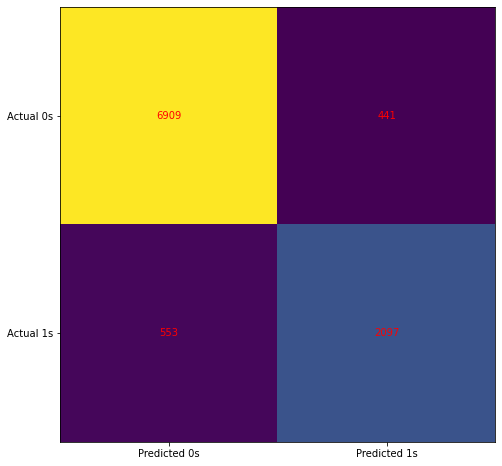

In [424]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [425]:
model.classes_

array([0, 1], dtype=int64)

In [426]:
model.intercept_

array([-0.62564463])

In [427]:
model.coef_

array([[-6.22690624e-01,  5.83358215e-02,  1.02186908e+00,
        -6.88078497e-01,  1.78936707e+00,  9.74046951e-01,
         5.12071117e-01,  3.30073643e-01,  3.25281307e+00,
         3.61332530e+00,  2.10516021e-01, -1.28699712e-03,
         3.83238644e-01, -3.00977052e+00, -3.17909391e+00,
        -1.59608313e+00, -1.79858082e+00,  4.73640701e-01]])

In [428]:
model.predict_proba(X)

array([[0.92589487, 0.07410513],
       [0.00457362, 0.99542638],
       [0.70919732, 0.29080268],
       ...,
       [0.99713765, 0.00286235],
       [0.99108202, 0.00891798],
       [0.95506884, 0.04493116]])

In [429]:
model.predict(X)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [430]:
model.score(X, y)

0.9006

In [431]:
predictions

0       0.058804
1       0.996217
2       0.339991
3       0.053437
4       0.597237
          ...   
9995    0.002434
9996    0.000980
9997    0.002176
9998    0.003892
9999    0.036708
Length: 10000, dtype: float64

(array([5755.,  671.,  395.,  339.,  285.,  276.,  307.,  385.,  446.,
        1141.]),
 array([5.54057437e-07, 9.99928578e-02, 1.99985161e-01, 2.99977465e-01,
        3.99969769e-01, 4.99962073e-01, 5.99954376e-01, 6.99946680e-01,
        7.99938984e-01, 8.99931287e-01, 9.99923591e-01]),
 <BarContainer object of 10 artists>)

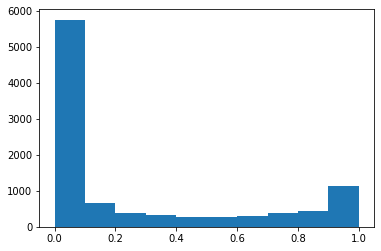

In [432]:
plt.hist(predictions)

In [433]:
plot = pd.DataFrame()
plot['predicted'] = model.predict(X)

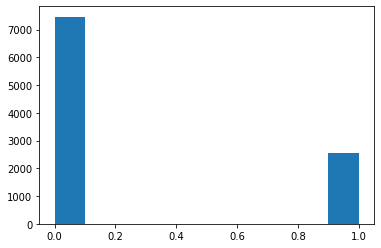

In [434]:
plt.hist(plot['predicted'])
plt.show()

In [435]:
model.predict(X)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

(array([5755.,  671.,  395.,  339.,  285.,  276.,  307.,  385.,  446.,
        1141.]),
 array([5.54057437e-07, 9.99928578e-02, 1.99985161e-01, 2.99977465e-01,
        3.99969769e-01, 4.99962073e-01, 5.99954376e-01, 6.99946680e-01,
        7.99938984e-01, 8.99931287e-01, 9.99923591e-01]),
 <BarContainer object of 10 artists>)

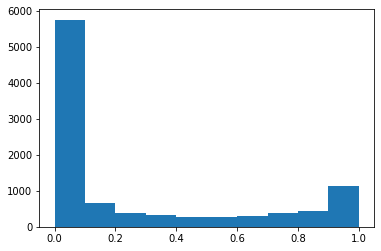

In [436]:
plt.hist(predictions)

In [437]:
# Classification report
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7350
           1       0.83      0.79      0.81      2650

    accuracy                           0.90     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.90      0.90      0.90     10000



In [438]:
# Accuracty = Percentage of corrrect predictions
print(metrics.accuracy_score(y, model.predict(X)))

0.9006


In [439]:
# Precision = Correct positive predictions 
# relative to total positive predictions
print(metrics.precision_score(y, model.predict(X)))

0.8262411347517731


In [440]:
# Recall = Correct positive predictions 
# relative to total actual positives
print(metrics.recall_score(y, model.predict(X)))

0.7913207547169812
